## Specialized Models: Time Series and Survival Analysis

### Introduction to Forecasting and Time Series Analysis

<img src = "Introduction to Forecasting and Time Series Analysis.jpg">
<img src = "Introduction to Forecasting and Time Series Analysis1.jpg">
<img src = "Introduction to Forecasting and Time Series Analysis2.jpg">
<img src = "Introduction to Forecasting and Time Series Analysis3.jpg">
<img src = "Introduction to Forecasting and Time Series Analysis4.jpg">
<img src = "Introduction to Forecasting and Time Series Analysis5.jpg">
<img src = "Introduction to Forecasting and Time Series Analysis6.jpg">
<img src = "Introduction to Forecasting and Time Series Analysis7.jpg">
<img src = "Introduction to Forecasting and Time Series Analysis8.jpg">
<img src = "Introduction to Forecasting and Time Series Analysis9.jpg">
<img src = "Introduction to Forecasting and Time Series Analysis10.jpg">
<img src = "Introduction to Forecasting and Time Series Analysis11.jpg">
<img src = "Introduction to Forecasting and Time Series Analysis12.jpg">
<img src = "Introduction to Forecasting and Time Series Analysis13.jpg">

# Machine Learning Foundation

## Course 6, Part a: Pandas TimeSeries LAB

## Learning Outcomes

* Understand time series applications for NumPy and Pandas
* Summarize a dataframe with a datetime index
* Generate simple time series plots


# Overview: Time Series Data in Python

In this lesson, we will explore some key Time Series-related functionality in the Numpy, Pandas, and Matplotlib packages. We will explore basic data types and summarize a Pandas DataFrame with a DateTime index. We will also explore basic plotting and Time Series visualization. For this lesson, we will use a sample dataset called "Superstore Sales", which includes 4 years of daily Sales data by customer and category. Note: this lesson assumes some basic familiarity with Python and Python data types. References are provided for introductory lessons for each module.

__[Pandas](http://pandas.pydata.org/pandas-docs/stable/index.html):__ has built-in Time Series functionality to work with dates, date ranges, and Time Series data. It is useful for analyzing groups of time series and manipulating data. 

# Key Data Types for Time Series Data

## Key NumPy data types:
> 1. __[`Array`](https://docs.scipy.org/doc/numpy/reference/arrays.ndarray.html)__: Array of similarly-typed values, fundamental building block of further analysis. The NumPy __Array__ object has several useful built-in [methods](https://docs.scipy.org/doc/numpy/reference/arrays.ndarray.html#array-methods), including: `shape`, `max`/`min`, `argmax`/`argmin`, `sum`, `cumsum`, `mean`, `var`, `std`, `prod`, `cumprod`, etc.
> 2. __[`datetime64`](https://docs.scipy.org/doc/numpy/reference/arrays.datetime.html)__: is NumPy's datetime format, where each value is a timestamp. It was created to improve on Python's datetime format, and stores timestamps as 64-bit integers. These timestamps often default to nanosecond precision (`datetime64[ns]`), even when working with daily or hourly data, although this can be adjusted.   
> 3. __[`timedelta64`](https://docs.scipy.org/doc/numpy/reference/arrays.datetime.html)__: is NumPy's time interval format, which can be thought of as a period of time between two *datetime64* values and uses the same units as *datetime64*. The most common unit values are: __Y__: `year`, __M__: `month`, __W__: `week`, __D__: `day`, __h__: `hour`, __m__: `minute`, __s__: `second`, __ns__: `nanosecond` (default). 

## Key Pandas data types:
> 1. __[`Series`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.html#pandas.Series)__: Series is a one-dimensional labeled array that is capable of holding any data type (i.e. `int`, `str`, `float`, etc.), but every element is of this same type. The axis labels of a Series are referred to as the __Index__ of the Series, while the Pandas __Series__ object is similar to the NumPy __Array__, 
> 2. __[`DataFrame`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html)__: Dataframe is a two-dimensional labeled data structure with columns of potentially different types. It largely resembles a spreadsheet or SQL table. The first axis labels of a Dataframe (rows) are referred to as the __Index__ of the Series, whereas the second axis labels labels of a Dataframe (columns) are referred to as the __Columns__ of the Series
> 3. __[`Index`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Index.html)__: Pandas provides much of its functionality through the __Index__ object. Every DataFrame has an attribute: `.index`, which uniquely labels rows and columns and facilitates DataFrame manipulation. The simplest (default) Index type is a RangeIndex, usually a list of integer values. This is often automatically generated when an Index is not set explicitly, or when the Index is reset. Time Series data are usually best represented using the __[DatetimeIndex](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DatetimeIndex.html#pandas.DatetimeIndex)__ Index, which is an index of NumPy datetime64 values. However, it is sometimes convenient to use time intervals for the index using the __[Timedelta](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Timedelta.html#pandas.Timedelta)__ index, or the __[PeriodIndex](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.PeriodIndex.html#pandas.PeriodIndex)__ when intervals are regular. Pandas supports multiple-level indexing (including hierarchical indexing) via the __[MultiIndex](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.MultiIndex.html#pandas.MultiIndex)__, which accommodates indices of different types and can simplify data exploration.

# Dataset Exploration Example
Here we will read in some sample data and explore some key data types and attributes. Our source data is a publicly-available retail sales dataset: __[Superstore Sales]("data/Superstore - Sales.csv")__, available as a spreadsheet. We begin by importing the libraries and reading in data.

## Setup

In [63]:
# imports
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from datetime import datetime
from datetime import timedelta
from dateutil.relativedelta import relativedelta
from IPython.display import display
# ignore warnings
warnings.filterwarnings('ignore')
pd.options.display.float_format = '{:,.1f}'.format
%matplotlib inline
plotsize = (13, 5)

In [64]:
import seaborn as sns
coloribm = {"Magenta 100":"2A0A16", "Magenta 90":"57002B", "Magenta 80":"760A3A", "Magenta 70":"A11950", "Magenta 60":"D12765", "Magenta 50":"EE538B", "Magenta 40":"FA75A6", "Magenta 30":"FFA0C2", "Magenta 20":"FFCFE1", "Magenta 10":"FFF0F6", "Purple 100":"1E1033", "Purple 90":"38146B", "Purple 80":"4F2196", "Purple 70":"6E32C9", "Purple 60":"8A3FFC", "Purple 50":"A66EFA", "Purple 40":"BB8EFF", "Purple 30":"D0B0FF", "Purple 20":"E6D6FF", "Purple 10":"F7F1FF", "Blue 100":"051243", "Blue 90":"061F80", "Blue 80":"0530AD", "Blue 70":"054ADA", "Blue 60":"0062FF", "Blue 50":"408BFC", "Blue 40":"6EA6FF", "Blue 30":"97C1FF", "Blue 20":"C9DEFF", "Blue 10":"EDF4FF", "Teal 100":"081A1C", "Teal 90":"003137", "Teal 80":"004548", "Teal 70":"006161", "Teal 60":"007D79", "Teal 50":"009C98", "Teal 40":"00BAB6", "Teal 30":"20D5D2", "Teal 20":"92EEEE", "Teal 10":"DBFBFB", "Gray 100":"171717", "Gray 90":"282828", "Gray 80":"3D3D3D", "Gray 70":"565656", "Gray 60":"6F6F6F", "Gray 50":"8C8C8C", "Gray 40":"A4A4A4", "Gray 30":"BEBEBE", "Gray 20":"DCDCDC", "Gray 10":"F3F3F3"} 
colors = []
colornum = 60
for i in [f'Blue {colornum}', f'Teal {colornum}', f'Magenta {colornum}', f'Purple {colornum}', f'Gray {colornum}']:
    colors.append(f'#{coloribm[i]}')
palette = sns.color_palette(colors)
sns.set_palette(palette)

### Read in source data:
It is often easiest to read data in as a Pandas DataFrame. Pandas provides a variety of __[Input/Output](https://pandas.pydata.org/pandas-docs/stable/reference/io.html)__ options to read files from common (.csv, .json) or proprietary (.xls, .sas7bdat) formats.

In [65]:
df = pd.read_excel("Sample - Superstore.xls")
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

We can see the data have been input and the columns are referenced by a Pandas Index object. There are two Date variables (Order Date and Ship Date), variables for customer and region, product type variables (Category, Sub-Category, Product Name), etc. 

### Simplify Time Series Data
We will start by simplifying the input data a bit to explore data types. To do so, we will look at Total Sales by Order Date and Category. This allows us to look a Time Series dataset with multiple time series. 

In [66]:
variables = ['Order Date', 'Category', 'Sales']
group_variables = variables[:2]
outcome_variable = variables[2]
base = df.groupby(group_variables)[outcome_variable].sum().reset_index()

Note we reset the index, if we don't, Pandas sets the group variables to the index (more on this later). We can see the result is a Pandas DataFrame with columns for `Order Date`, `Category`, and `Sales`. We can think of this as a `Sales` time series for each `Category`.

In [67]:
print("Columns:", base.columns)
print("Index:", base.index)

Columns: Index(['Order Date', 'Category', 'Sales'], dtype='object')
Index: RangeIndex(start=0, stop=2864, step=1)


In [68]:
base.head()

Order Date         Category   Sales
0 2011-01-04  Office Supplies    16.4
1 2011-01-05  Office Supplies   288.1
2 2011-01-06  Office Supplies    19.5
3 2011-01-07        Furniture 2,573.8
4 2011-01-07  Office Supplies   685.3

Individual DataFrame columns are Pandas `Series`, and we can see the `RangeIndex` on the left. This Pandas `DataFrame` is a combination of the `RangeIndex` and Pandas `Series` objects, where each has an underlying data type:

In [69]:
base.dtypes

Order Date    datetime64[ns]
Category              object
Sales                float64
dtype: object

#### Pandas DataFrame types:

In [70]:
for x in base.columns:
    print(x, type(base[x]), base[x].dtype)

Order Date <class 'pandas.core.series.Series'> datetime64[ns]
Category <class 'pandas.core.series.Series'> object
Sales <class 'pandas.core.series.Series'> float64


### Working with NumPy Arrays
It isn't always necessary to extract NumPy arrays, as the Pandas Series contains NumPy functionality. However, some applications use NumPy arrays as inputs and can bypass Pandas if desired.

In [71]:
order_date = np.array(base['Order Date'])
category = np.array(base['Category'])
sales = np.array (base['Sales'])

In [72]:
print('Order Date', type(order_date), order_date.dtype)
print('Category', type(category), category.dtype)
print('Sales', type(sales), sales.dtype)

Order Date <class 'numpy.ndarray'> datetime64[ns]
Category <class 'numpy.ndarray'> object
Sales <class 'numpy.ndarray'> float64


If starting from the NumPy arrays, we could build the DataFrame (note dictionary input structure):

In [73]:
df_from_numpy = pd.DataFrame({'Order Date':order_date, 'Category':category, 'Sales':sales})

In [74]:
df_from_numpy.dtypes

Order Date    datetime64[ns]
Category              object
Sales                float64
dtype: object

### datetime64 format in Numpy
The NumPy date array is a datetime64 object, with ns (nanosecond) units. We can leave it this way, or specify a unit:

While the Array and Pandas Series are basically the same, we see the Series has an index, and formats the date output somewhat.

In [75]:
order_date

array(['2011-01-04T00:00:00.000000000', '2011-01-05T00:00:00.000000000',
       '2011-01-06T00:00:00.000000000', ...,
       '2014-12-31T00:00:00.000000000', '2014-12-31T00:00:00.000000000',
       '2014-12-31T00:00:00.000000000'], dtype='datetime64[ns]')

In [76]:
order_date_daily = np.array(order_date, dtype='datetime64[D]')

In [77]:
order_date_daily

array(['2011-01-04', '2011-01-05', '2011-01-06', ..., '2014-12-31',
       '2014-12-31', '2014-12-31'], dtype='datetime64[D]')

In [78]:
len(np.unique(order_date_daily))

1238

The order_date variable now has daily format, although this doesn't change much because we already had one observation per day. In practice, leaving nanosecond precision is usually fine. 

However, if we aggregate to monthly:

In [79]:
order_date_monthly = np.array(order_date, dtype='datetime64[M]')

In [80]:
order_date_monthly

array(['2011-01', '2011-01', '2011-01', ..., '2014-12', '2014-12',
       '2014-12'], dtype='datetime64[M]')

In [81]:
np.unique(order_date_monthly)

array(['2011-01', '2011-02', '2011-03', '2011-04', '2011-05', '2011-06',
       '2011-07', '2011-08', '2011-09', '2011-10', '2011-11', '2011-12',
       '2012-01', '2012-02', '2012-03', '2012-04', '2012-05', '2012-06',
       '2012-07', '2012-08', '2012-09', '2012-10', '2012-11', '2012-12',
       '2013-01', '2013-02', '2013-03', '2013-04', '2013-05', '2013-06',
       '2013-07', '2013-08', '2013-09', '2013-10', '2013-11', '2013-12',
       '2014-01', '2014-02', '2014-03', '2014-04', '2014-05', '2014-06',
       '2014-07', '2014-08', '2014-09', '2014-10', '2014-11', '2014-12'],
      dtype='datetime64[M]')

In [82]:
len(np.unique(order_date_monthly))

48

We can see we have 48 unique months of data. 

# Working with the Pandas DatetimeIndex 
Let's return to our Pandas DataFrame object:

In [83]:
print(base.head())
print('\n Unique categories:')
print(base['Category'].unique())

  Order Date         Category   Sales
0 2011-01-04  Office Supplies    16.4
1 2011-01-05  Office Supplies   288.1
2 2011-01-06  Office Supplies    19.5
3 2011-01-07        Furniture 2,573.8
4 2011-01-07  Office Supplies   685.3

 Unique categories:
['Office Supplies' 'Furniture' 'Technology']


## Setting Index Using Existing Variable
We often want to set an Index explicitly, or manipulate an Index, for working with Time Series data. The Pandas DateTime Index is useful here, although it is often useful to standardize the  index by ensuring all relevant time periods are included only once. Our data violate this condition for two reasons: (1) Multiple values for a given period (due to multiple categories) and (2) Missing days (for daily data). We will fix both of these issues below, and explore some useful Datetime functionality.

In [84]:
base.set_index('Order Date', inplace=True)
# Note that without inplace=True, it will output the results without changing the data

In [85]:
base.head()

Category   Sales
Order Date                         
2011-01-04  Office Supplies    16.4
2011-01-05  Office Supplies   288.1
2011-01-06  Office Supplies    19.5
2011-01-07        Furniture 2,573.8
2011-01-07  Office Supplies   685.3

In [86]:
print(base.index)
#print(base.index.unique())

DatetimeIndex(['2011-01-04', '2011-01-05', '2011-01-06', '2011-01-07',
               '2011-01-07', '2011-01-07', '2011-01-08', '2011-01-08',
               '2011-01-10', '2011-01-10',
               ...
               '2014-12-28', '2014-12-29', '2014-12-29', '2014-12-29',
               '2014-12-30', '2014-12-30', '2014-12-30', '2014-12-31',
               '2014-12-31', '2014-12-31'],
              dtype='datetime64[ns]', name='Order Date', length=2864, freq=None)


## Subsetting data
We now have a __DatetimeIndex__ and we can use it to select data subsets:

In [87]:
# Observations in 2014
display(base['2011'].head())
print('\n')
# Observations in a range of dates, subset of columns:
display(base[base['Category'] == 'Office Supplies']['2011':'2012-02'].tail())

Category   Sales
Order Date                         
2011-01-04  Office Supplies    16.4
2011-01-05  Office Supplies   288.1
2011-01-06  Office Supplies    19.5
2011-01-07        Furniture 2,573.8
2011-01-07  Office Supplies   685.3

Category  Sales
Order Date                        
2012-02-22  Office Supplies   79.4
2012-02-23  Office Supplies   37.8
2012-02-25  Office Supplies   25.9
2012-02-27  Office Supplies   20.5
2012-02-29  Office Supplies   58.7

## Datetime Components 
Pandas Datetime variables have a number of useful __[components](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#time-date-components)__.  Using the DatetimeIndex, we can extract items like month, year, day of week, quarter, etc.:

In [88]:
#base.set_index('Order Date', inplace=True)
print('Day:', base.index.day, '\n')
print('Week:', base.index.week, '\n')
base['DayofWeek'] = base.index.dayofweek # Day of Week: Monday=0, Sunday=6
print(base.head())
# Note: use dt method when the date variable is not part of the index: 
# df['Order Date'].dt.dayofweek.head()
del(base['DayofWeek'])

Day: Int64Index([ 4,  5,  6,  7,  7,  7,  8,  8, 10, 10,
            ...
            28, 29, 29, 29, 30, 30, 30, 31, 31, 31],
           dtype='int64', name='Order Date', length=2864) 

Week: Int64Index([ 1,  1,  1,  1,  1,  1,  1,  1,  2,  2,
            ...
            52,  1,  1,  1,  1,  1,  1,  1,  1,  1],
           dtype='int64', name='Order Date', length=2864) 

                   Category   Sales  DayofWeek
Order Date                                    
2011-01-04  Office Supplies    16.4          1
2011-01-05  Office Supplies   288.1          2
2011-01-06  Office Supplies    19.5          3
2011-01-07        Furniture 2,573.8          4
2011-01-07  Office Supplies   685.3          4


# Standardizing the DatetimeIndex 
While data from existing variables may be sufficient, some Time Series applications require that data contain all periods and have a Frequency assigned. We can see above that our data do not have a frequency (freq=None). While the data seem daily, there are many types of possible [frequencies](http://pandas.pydata.org/pandas-docs/stable/timeseries.html#offset-aliases) (business days, weekdays, etc.). If the input data are already standardized, Pandas will infer a Frequency and assign it. Otherwise, we need to ensure there are:
- No duplicate index values 
- No missing index values 

Setting a Frequency helps ensure the data are standardized and will work in applications, and is also required for functionality like resampling. 



## Pivoting Data:

Because there are multiple categories, we have multiple Time Series to analyze. As a result, our __DatetimeIndex__ does not uniquely identify an observation. To uniquely identify observations, we can either add categorical variables to the Index, or set a Pandas DateTimeIndex with separate columns for each series. There are several ways to accomplish this. The first appraoch uses Pandas' built-in __[pivot](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.pivot.html)__ method:

### Pandas pivot method


In [89]:
base.reset_index(inplace=True)
# Note if we didn't reset the index, we could use index=None below
sales_pivot = base.pivot(index='Order Date', columns='Category', values='Sales')
sales_pivot.head()

Category    Furniture  Office Supplies  Technology
Order Date                                        
2011-01-04        NaN             16.4         NaN
2011-01-05        NaN            288.1         NaN
2011-01-06        NaN             19.5         NaN
2011-01-07    2,573.8            685.3     1,147.9
2011-01-08       76.7             10.4         NaN

Note that missing values (`NaN`) are often introduced here, and can be set to 0 easily using the `fillna(0)` method. 

### Unstacking:
To achieve the same result in Pandas, it is often easier to use the __Index__ and __[unstack](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.unstack.html)__ / __[(stack)](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.stack.html)__ methods. The __unstack__ method transforms long data into wide data by creating columns by category for levels of the index, while __stack__ does the reverse.

Here, we can tell Pandas that the `Date` and `Category` values are part of the __Index__ and use the `unstack` function to generate separate columns (this also removes the `Category` column from the Index):

In [90]:
sales = base.set_index(['Order Date', 'Category']).unstack('Category').fillna(0)

# Note -- 2 levels of column names, the original variables are in columns.levels[0], 
# newly-created category variable names are in columns.levels[1]. This can be reset completely:
# sales.columns = sales.columns.levels[1].rename(None)
# Alternatively, keeping 'Sales' as a level 0 name allows us to refer to the variables jointly (sales['Sales'])
sales.columns = sales.columns.levels[1].rename(None)
sales.head()

Furniture  Office Supplies  Technology
Order Date                                        
2011-01-04        0.0             16.4         0.0
2011-01-05        0.0            288.1         0.0
2011-01-06        0.0             19.5         0.0
2011-01-07    2,573.8            685.3     1,147.9
2011-01-08       76.7             10.4         0.0

In [91]:
print(sales.index)
print('\nUnique dates in our data: ', len(sales.index.unique()), 'Days')

DatetimeIndex(['2011-01-04', '2011-01-05', '2011-01-06', '2011-01-07',
               '2011-01-08', '2011-01-10', '2011-01-11', '2011-01-12',
               '2011-01-14', '2011-01-15',
               ...
               '2014-12-22', '2014-12-23', '2014-12-24', '2014-12-25',
               '2014-12-26', '2014-12-27', '2014-12-28', '2014-12-29',
               '2014-12-30', '2014-12-31'],
              dtype='datetime64[ns]', name='Order Date', length=1238, freq=None)

Unique dates in our data:  1238 Days


Since we have now created a column for each category, we can see there no longer repeated values in the Datetime Index. 

## Generating a complete Index and Setting Frequency
Since we are using daily data, we would like to set a daily frequency. We see our data has a length of 1238 days. By subtracting the smallest date from the largest date, we can tell there are some days missing:

In [92]:
print('\nUnique dates in our data: ', len(sales.index.unique()), 'Days')
our_date_range = sales.index.max() - sales.index.min()

# Calculate number of days in date range
print('Total days in our date range:', our_date_range.days, 'Days')
#date_range = pd.date_range(min(sales.index), max(sales.index))


Unique dates in our data:  1238 Days
Total days in our date range: 1457 Days


We can generate a complete index using Pandas' __[date_range](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.date_range.html)__ function:

In [93]:
new_index = pd.date_range(sales.index.min(), sales.index.max())
print(new_index)

DatetimeIndex(['2011-01-04', '2011-01-05', '2011-01-06', '2011-01-07',
               '2011-01-08', '2011-01-09', '2011-01-10', '2011-01-11',
               '2011-01-12', '2011-01-13',
               ...
               '2014-12-22', '2014-12-23', '2014-12-24', '2014-12-25',
               '2014-12-26', '2014-12-27', '2014-12-28', '2014-12-29',
               '2014-12-30', '2014-12-31'],
              dtype='datetime64[ns]', length=1458, freq='D')


To use this index, we need to tell Pandas how to treat missing values. In this case, we want to use zero for days without sales data. 

In [94]:
sales_new = sales.reindex(new_index, fill_value=0)

In [95]:
sales_new.index

DatetimeIndex(['2011-01-04', '2011-01-05', '2011-01-06', '2011-01-07',
               '2011-01-08', '2011-01-09', '2011-01-10', '2011-01-11',
               '2011-01-12', '2011-01-13',
               ...
               '2014-12-22', '2014-12-23', '2014-12-24', '2014-12-25',
               '2014-12-26', '2014-12-27', '2014-12-28', '2014-12-29',
               '2014-12-30', '2014-12-31'],
              dtype='datetime64[ns]', length=1458, freq='D')

We can see the result now has a daily frequency. While some Time Seriods models will work without an explicit frequency, many will not. It is also helps to ensure we aren't missing important dates when summarizing and plotting the data. 


## Resampling 
We can now easily Resample our data at any desired frequency, using either the `asfreq` method or the `resample` method. The `asfreq` method assumes a default fill approach (which can be dangerous). The `resample` method allows this to be specified directly. which generates a __[resampler](https://pandas.pydata.org/pandas-docs/stable/reference/resampling.html)__ object. To get to values, we need to specify an aggregation function if upsampling (moving to a lower frequency), or fill function if downsampling (moving to a higher frequency). This typically the sum or mean for upsampling, or interpolate for downsampling. We generate results for some common frequencies below:
### Upsampling (Moving to a longer period)

In [96]:
sales_weekly = sales_new.resample('W').sum()
print('Weekly Sales')
print(sales_weekly.head(), '\n')

sales_monthly = sales_new.resample('M').sum()
print('Monthly Sales')
print(sales_monthly.head(), '\n')

sales_quarterly = sales_new.resample('Q').sum()
print('Quarterly Sales')
print(sales_quarterly.head(), '\n')

sales_annual = sales_new.resample('Y').sum()
print('Annual Sales')
print(sales_annual.head())

Weekly Sales
            Furniture  Office Supplies  Technology
2011-01-09    2,650.5          1,019.8     1,147.9
2011-01-16    1,003.8          2,039.4       827.9
2011-01-23    1,747.3            871.1       824.1
2011-01-30      550.2            680.3       343.3
2011-02-06      290.7            502.7       649.9 

Monthly Sales
            Furniture  Office Supplies  Technology
2011-01-31    5,951.9          4,851.1     3,143.3
2011-02-28    2,130.3          1,071.7     1,608.5
2011-03-31   14,574.0          8,605.9    32,511.2
2011-04-30    7,944.8         11,155.1     9,195.4
2011-05-31    6,912.8          7,135.6     9,599.9 

Quarterly Sales
            Furniture  Office Supplies  Technology
2011-03-31   22,656.1         14,528.7    37,263.0
2011-06-30   28,063.7         31,243.7    27,231.3
2011-09-30   41,957.9         53,924.0    47,751.4
2011-12-31   64,515.1         52,080.0    63,032.6
2012-03-31   27,374.1         23,059.4    18,418.2 

Annual Sales
            Furnitur

### Downsampling (moving to a shorter period)
Just as upsampling (moving to a larger period) requires an aggregation function, downsampling (moving from Annual to Monthly, for example) requires an option to fill in missing values. A common approach is the __[interpolate](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.resample.Resampler.interpolate.html)__ method, which allows various types of interpolation (linear, spline, etc.). Other options (ffill forward fill, bfill backward fill) are also supported.

In [97]:
sales_annual.resample('M').sum()

Furniture  Office Supplies  Technology
2011-12-31  157,192.9        151,776.4   175,278.2
2012-01-31        0.0              0.0         0.0
2012-02-29        0.0              0.0         0.0
2012-03-31        0.0              0.0         0.0
2012-04-30        0.0              0.0         0.0
2012-05-31        0.0              0.0         0.0
2012-06-30        0.0              0.0         0.0
2012-07-31        0.0              0.0         0.0
2012-08-31        0.0              0.0         0.0
2012-09-30        0.0              0.0         0.0
2012-10-31        0.0              0.0         0.0
2012-11-30        0.0              0.0         0.0
2012-12-31  170,518.2        137,233.5   162,780.8
2013-01-31        0.0              0.0         0.0
2013-02-28        0.0              0.0         0.0
2013-03-31        0.0              0.0         0.0
2013-04-30        0.0              0.0         0.0
2013-05-31        0.0              0.0         0.0
2013-06-30        0.0              0.0         0.0
2013-07-31        0.0              0.0         0.0
2013-08-31        0.0              0.0         0.0
2013-09-30        0.0              0.0         0.0
2013-10-31        0.0              0.0         0.0
2013-11-30        0.0              0.0         0.0
2013-12-31  198,901.4        183,510.6   226,061.8
2014-01-31        0.0              0.0         0.0
2014-02-28        0.0              0.0         0.0
2014-03-31        0.0              0.0         0.0
2014-04-30        0.0              0.0         0.0
2014-05-31        0.0              0.0         0.0
2014-06-30        0.0              0.0         0.0
2014-07-31        0.0              0.0         0.0
2014-08-31        0.0              0.0         0.0
2014-09-30        0.0              0.0         0.0
2014-10-31        0.0              0.0         0.0
2014-11-30        0.0              0.0         0.0
2014-12-31  215,387.3        246,526.6   272,033.2

In [98]:
# Note that downsampling (from Annual to Monthly for example) produces missing values:
sales_monthly_from_annual = sales_annual.resample('M')
#print('Monthly from Annual Sales')
#sales_monthly_from_annual.interpolate(method='linear').head()
print(sales_monthly_from_annual.interpolate(method='spline', order=3))

            Furniture  Office Supplies  Technology
2011-12-31  157,192.9        151,776.4   175,278.2
2012-01-31  157,062.6        147,084.7   168,957.8
2012-02-29  157,200.9        143,355.5   164,096.2
2012-03-31  157,611.1        140,049.0   159,969.0
2012-04-30  158,251.0        137,493.3   156,975.1
2012-05-31  159,147.3        135,491.9   154,859.3
2012-06-30  160,226.7        134,148.7   153,705.2
2012-07-31  161,545.1        133,348.1   153,380.6
2012-08-31  163,053.5        133,117.8   153,881.7
2012-09-30  164,678.7        133,412.6   155,099.4
2012-10-31  166,512.8        134,226.0   157,059.4
2012-11-30  168,422.3        135,480.5   159,582.2
2012-12-31  170,518.2        137,233.5   162,780.8
2013-01-31  172,722.8        139,424.0   166,524.4
2013-02-28  174,793.5        141,756.2   170,326.8
2013-03-31  177,159.0        144,705.1   174,950.5
2013-04-30  179,506.1        147,901.3   179,787.2
2013-05-31  181,975.2        151,531.9   185,104.1
2013-06-30  184,391.6        15

#### Resampling by changing frequency directly
Another way to achieve this is to use the `asfreq` method:

In [99]:
sales_daily = sales.asfreq('D')
sales_businessday = sales.asfreq('B')
sales_hourly = sales.asfreq('h')
# This will generate missing values:
sales_hourly

Furniture  Office Supplies  Technology
Order Date                                                 
2011-01-04 00:00:00        0.0             16.4         0.0
2011-01-04 01:00:00        NaN              NaN         NaN
2011-01-04 02:00:00        NaN              NaN         NaN
2011-01-04 03:00:00        NaN              NaN         NaN
2011-01-04 04:00:00        NaN              NaN         NaN
...                        ...              ...         ...
2014-12-30 20:00:00        NaN              NaN         NaN
2014-12-30 21:00:00        NaN              NaN         NaN
2014-12-30 22:00:00        NaN              NaN         NaN
2014-12-30 23:00:00        NaN              NaN         NaN
2014-12-31 00:00:00      323.1            299.7        90.9

[34969 rows x 3 columns]

## Variable Transformations
For Time Series models, we may want to use transformed variables (log, difference, growth rate, etc). The example below illustrates how we might generate these variables in Pandas, using the Monthly Sales dataset. 

### Stationarity Transformations
Concerns about Stationarity often lead to considering variable transformations. Some commonly-used transformation methods (Variable Differencing, Percentage Change, and Log) are implemented below. Because of Index has several levels here, these transformations can be done for each outcome variable with one line (the results could be joined together using the Pandas __[concat](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.concat.html)__ method). 

In [100]:
# Variable First Difference
print('Monthly Sales, First Difference \n', sales_monthly.diff().head())

# Variable Percent Change
print('\nMonthly Sales % Change \n', sales_monthly.pct_change().head())

# Log Sales
print('\nlog(1+Monthly Sales) \n', np.log(1 +  sales_monthly).head())

# Add % change to original data:
sales_monthly.join(sales_monthly.pct_change().add_suffix('_%_Change')).head()

Monthly Sales, First Difference 
             Furniture  Office Supplies  Technology
2011-01-31        NaN              NaN         NaN
2011-02-28   -3,821.5         -3,779.4    -1,534.8
2011-03-31   12,443.6          7,534.2    30,902.7
2011-04-30   -6,629.1          2,549.2   -23,315.7
2011-05-31   -1,032.0         -4,019.5       404.4

Monthly Sales % Change 
             Furniture  Office Supplies  Technology
2011-01-31        NaN              NaN         NaN
2011-02-28       -0.6             -0.8        -0.5
2011-03-31        5.8              7.0        19.2
2011-04-30       -0.5              0.3        -0.7
2011-05-31       -0.1             -0.4         0.0

log(1+Monthly Sales) 
             Furniture  Office Supplies  Technology
2011-01-31        8.7              8.5         8.1
2011-02-28        7.7              7.0         7.4
2011-03-31        9.6              9.1        10.4
2011-04-30        9.0              9.3         9.1
2011-05-31        8.8              8.9         9.

Furniture  Office Supplies  Technology  Furniture_%_Change  \
2011-01-31    5,951.9          4,851.1     3,143.3                 NaN   
2011-02-28    2,130.3          1,071.7     1,608.5                -0.6   
2011-03-31   14,574.0          8,605.9    32,511.2                 5.8   
2011-04-30    7,944.8         11,155.1     9,195.4                -0.5   
2011-05-31    6,912.8          7,135.6     9,599.9                -0.1   

            Office Supplies_%_Change  Technology_%_Change  
2011-01-31                       NaN                  NaN  
2011-02-28                      -0.8                 -0.5  
2011-03-31                       7.0                 19.2  
2011-04-30                       0.3                 -0.7  
2011-05-31                      -0.4                  0.0

### Rolling Averages and Windows
Another approach to transforming data involves looking at rolling averages. We will discuss this further in the Smoothing lessons. Here we set up rolling calculations for Mean and Standard Deviation, with variable window size. We will plot these a bit later.

In [101]:
window_size = 7
rolling_window = sales_new.rolling(window_size)
print('Rolling Mean')
print(rolling_window.mean().dropna().head())
print('\nRolling St. Dev')
print(rolling_window.std().dropna().head())
print('\nCumulative Sales')
print(sales_new.cumsum().dropna().head())


Rolling Mean
            Furniture  Office Supplies  Technology
2011-01-10      378.6            147.0       168.4
2011-01-11      386.1            145.1       168.4
2011-01-12      387.5            103.9       168.4
2011-01-13      387.5            101.1       168.4
2011-01-14      145.5            292.8        96.8

Rolling St. Dev
            Furniture  Office Supplies  Technology
2011-01-10      968.4            258.9       432.1
2011-01-11      965.2            260.1       432.1
2011-01-12      964.6            256.5       432.1
2011-01-13      964.6            257.6       432.1
2011-01-14      325.3            764.8       242.8

Cumulative Sales
            Furniture  Office Supplies  Technology
2011-01-04        0.0             16.4         0.0
2011-01-05        0.0            304.5         0.0
2011-01-06        0.0            324.0         0.0
2011-01-07    2,573.8          1,009.4     1,147.9
2011-01-08    2,650.5          1,019.8     1,147.9


# Visualization
Here we explore methods for plotting Time Series Data. Most of these packages use __Matplotlib's [pyplot](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.html)__ library, although it may not be called directly. This means it is possible to adjust plot features, like the title, using __pyplot__ commands.

## Pandas Built-in Plotting
Pandas DataFrames have a built-in __[plot](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html)__ method which, by default, plots columns against the index:

<AxesSubplot:title={'center':'Weekly Sales'}>

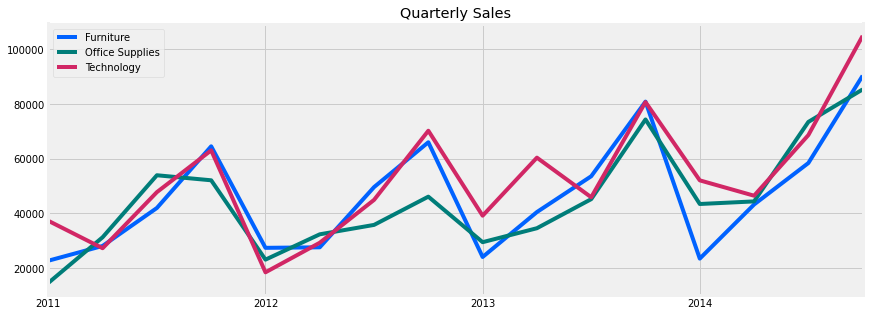

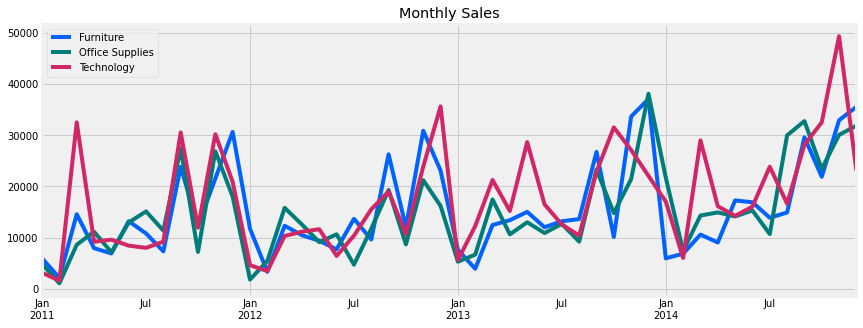

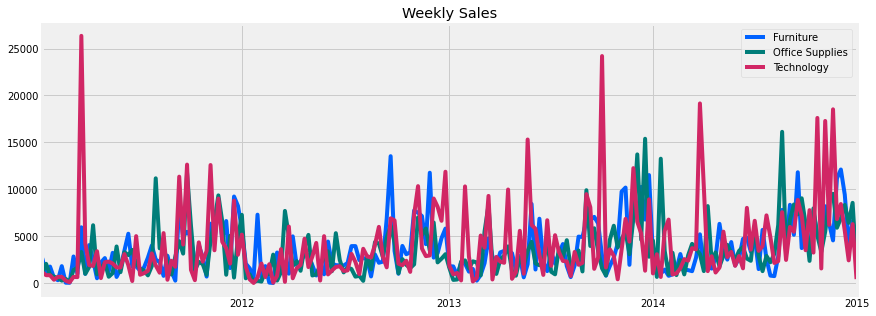

In [102]:
sales_quarterly.plot(figsize=plotsize, title='Quarterly Sales')
#plt.title('Monthly Sales')
sales_monthly.plot(figsize=plotsize, title='Monthly Sales')
#plt.title('Monthly Sales')
sales_weekly.plot(figsize=plotsize, title='Weekly Sales')
#plt.title('Monthly Sales')

Here, we plot functions like rolling averages and cumulative Sales calculated above:

<AxesSubplot:title={'center':'Quarterly Sales % Change'}>

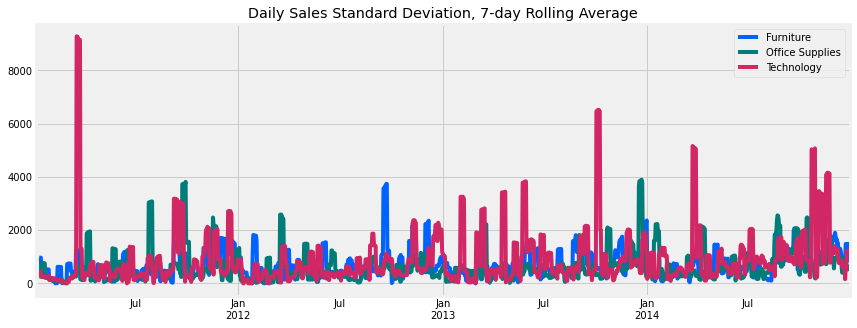

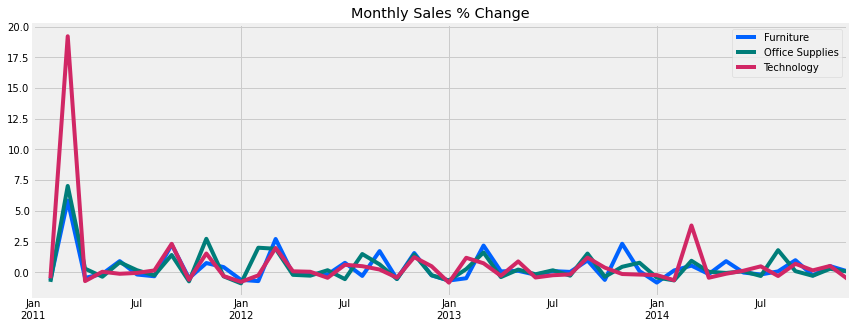

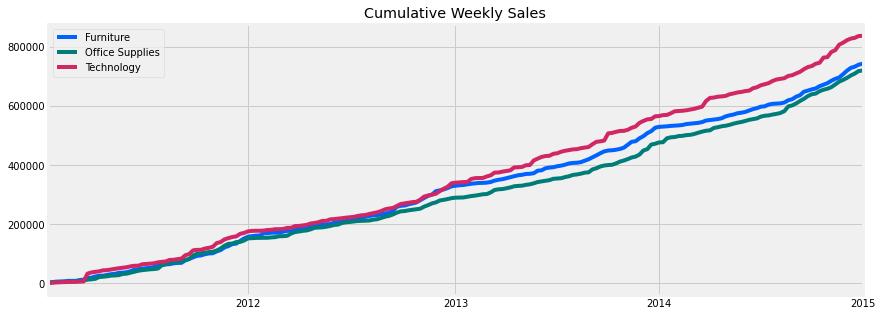

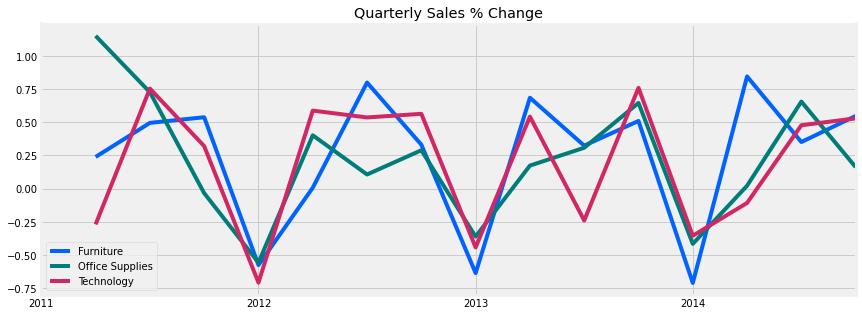

In [103]:
#rolling_window.mean().plot(figsize=plotsize, title='Daily Sales, 7-day Rolling Average')
rolling_window.std().plot(figsize=plotsize, title='Daily Sales Standard Deviation, 7-day Rolling Average')

# Monthly Sales Percent Change
sales_monthly.pct_change().plot(figsize=plotsize, title='Monthly Sales % Change')

# Cumulative Weekly Sales
sales_weekly.cumsum().plot(figsize=plotsize, title='Cumulative Weekly Sales')

# Quarterly Sales Growth
sales_quarterly.pct_change().plot(figsize=plotsize, title='Quarterly Sales % Change')


## Time Series Visualizations
There are a number of packages to help analyze Time Series data and create relevant plots. One example is __[statsmodels](https://www.statsmodels.org/stable/graphics.html#time-series-plots)__, which includes a number of methods for plotting Time Series-specific visualizations:
- __[plot_acf](https://www.statsmodels.org/stable/generated/statsmodels.graphics.tsaplots.plot_acf.html#statsmodels.graphics.tsaplots.plot_acf)__: Plot of the Autocorrelation Function
- __[plot_pacf](https://www.statsmodels.org/stable/generated/statsmodels.graphics.tsaplots.plot_pacf.html#statsmodels.graphics.tsaplots.plot_pacf)__: Plot of the Partial Autocorrelation Function
- __[month_plot](https://www.statsmodels.org/stable/generated/statsmodels.graphics.tsaplots.month_plot.html#statsmodels.graphics.tsaplots.month_plot)__: Seasonal Plot for Monthly Data
- __[quarter_plot](https://www.statsmodels.org/stable/generated/statsmodels.graphics.tsaplots.quarter_plot.html#statsmodels.graphics.tsaplots.quarter_plot)__: Seasonal Plot for Quarterly Data

Some examples are illustrated below:


Daily data Autocorrelation Plots


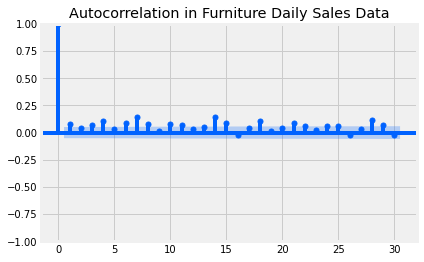

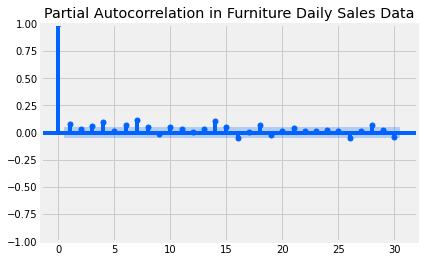

In [104]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf, month_plot, quarter_plot

print('Daily data Autocorrelation Plots')
# Autocorrelation and Partial Autocorrelation Functions for Daily Data
#plot_acf(sales_new['Sales']['Furniture'])
acf_plot = plot_acf(sales_new['Furniture'], lags=30, title='Autocorrelation in Furniture Daily Sales Data')
#plot_acf(sales_new['Sales']['Furniture'])
pacf_plot = plot_pacf(sales_new['Furniture'], lags=30, title='Partial Autocorrelation in Furniture Daily Sales Data')
#plot_acf(sales_new['Sales']['Furniture'])


Weekly data Autocorrelation Plots


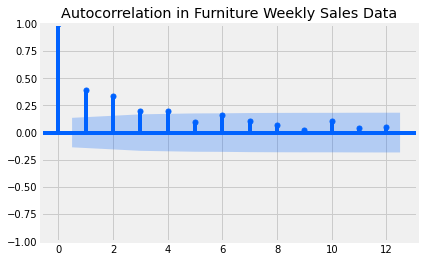

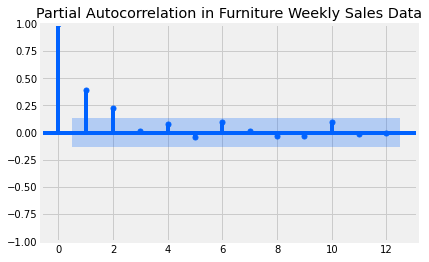

In [105]:
print('\nWeekly data Autocorrelation Plots')
# Autocorrelation and Partial Autocorrelation Functions for Daily Data
#plot_acf(sales_new['Sales']['Furniture'])
acf_plot = plot_acf(sales_weekly['Furniture'], lags=12, title='Autocorrelation in Furniture Weekly Sales Data')
#plot_acf(sales_new['Sales']['Furniture'])
pacf_plot = plot_pacf(sales_weekly['Furniture'], lags=12, title='Partial Autocorrelation in Furniture Weekly Sales Data')
#plot_acf(sales_new['Sales']['Furniture'])


Monthly Data Seasonal Plot


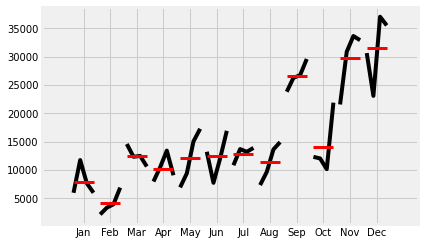

In [106]:
print('\nMonthly Data Seasonal Plot')
m_plot = month_plot(sales_monthly['Furniture'])


Quarterly Data Seasonal Plot


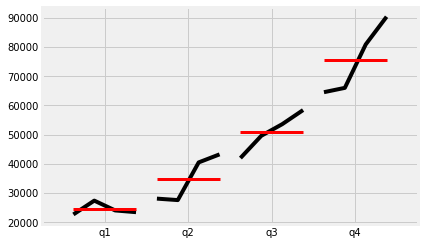

In [107]:
print('\nQuarterly Data Seasonal Plot')
q_plot = quarter_plot(sales_quarterly['Furniture'])

# Exercises
## Exercise 1:
Using the source data, set up Monthly data for Sales and Profit by Segment by either (1) Resampling or (2) Grouping data by Year and Month.

In [108]:
new_vars = ['Segment','Profit','Order Date','Sales']
new_base = df[new_vars].set_index('Order Date')
prof_pivot = new_base.pivot_table(columns='Segment',index = 'Order Date')
prof_month = prof_pivot.resample('M').sum()
prof_month.head()

Profit                          Sales                      
Segment    Consumer Corporate Home Office Consumer Corporate Home Office
Order Date                                                              
2011-01-31    106.5       5.9       185.0  1,304.1     568.0       855.9
2011-02-28    228.3     126.0        37.9  1,442.7     464.1       104.1
2011-03-31    -26.5     131.3        73.7  3,777.8   1,988.4     4,439.9
2011-04-30    336.9     435.6       527.9  3,752.8   3,951.2     2,031.6
2011-05-31    484.0     873.0       -63.3  5,373.2   4,077.7       696.1

## Exercise 2:
Analyze the results from the first exercise to determine whether Autocorrelation or Seasonal patterns differ by Segment or whether we are looking at Sales or Profits.

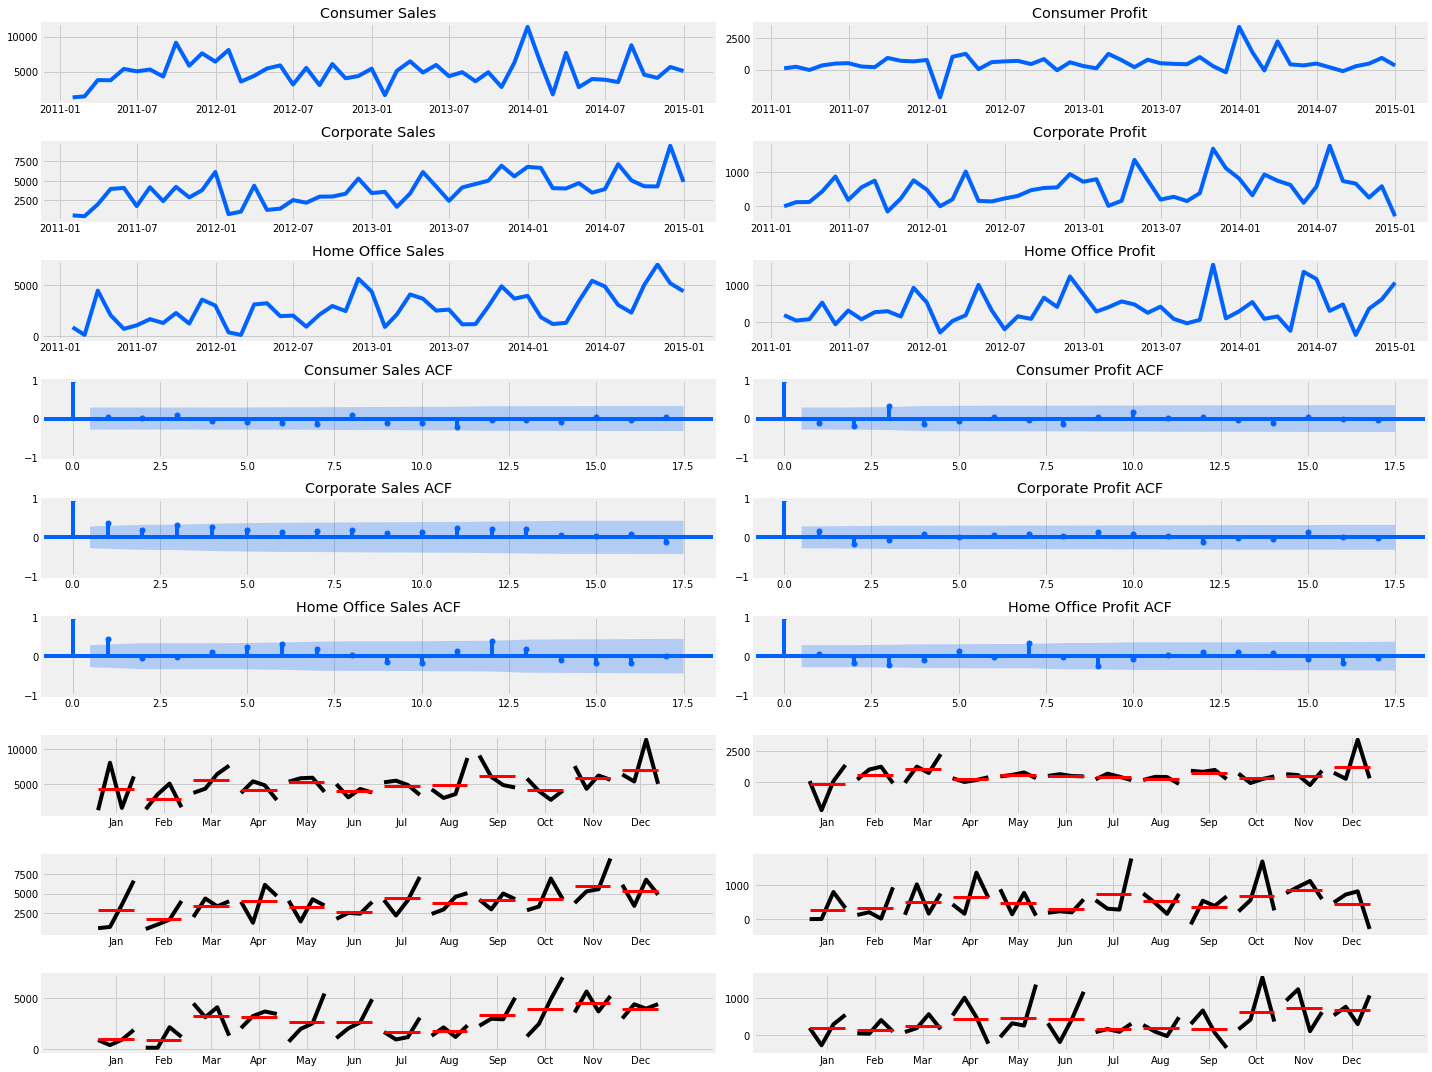

In [109]:
fig,axes = plt.subplots(9,2,figsize=(20,15),)
for i,cat in enumerate(['Consumer','Corporate','Home Office']):
    for j,money in enumerate(['Sales','Profit']):
        axes[i,j].plot(prof_month[money,cat])
        axes[i,j].title.set_text(cat+" "+money)
        plot_acf(prof_month[money,cat],ax=axes[i+3,j],title = cat+" "+money+" ACF")
        month_plot(prof_month[money,cat],ax=axes[i+6,j])

fig.tight_layout()
plt.show()

Seasonal patterns across groups are pretty similar and there is very little autocorrelation.

## Exercise 3:
Use the result from Exercise 2 to develop an EDA function to explore other variables (like Region or Sub-Category) that may be of interest.

In [110]:
cat_var = 'Region'
date_var = 'Order Date'
money_vars = ['Profit', 'Sales']

def monthly_eda(cat_var=cat_var,
                date_var=date_var, 
                money_vars=money_vars):
    new_vars = [cat_var, date_var] + money_vars
    cats = list(df[cat_var].unique())
    num_cats = len(cats)
    new_base = df[new_vars].set_index(date_var)
    prof_pivot = new_base.pivot_table(columns=cat_var,index = date_var)
    prof_month = prof_pivot.resample('M').sum()
    prof_month.head()

    fig,axes = plt.subplots(num_cats*3, 2, figsize=(20, 5*num_cats),)
    for i,cat in enumerate(cats):
        for j,money in enumerate(money_vars):
            axes[i,j].plot(prof_month[money,cat])
            axes[i,j].title.set_text(cat+" "+money)
            fig = plot_acf(prof_month[money,cat],ax=axes[i+num_cats,j],title = cat+" "+money+" ACF")
            fig = month_plot(prof_month[money,cat],ax=axes[i+num_cats*2,j])
            axes[i+num_cats*2,j].title.set_text(cat+" Seasonality")

    fig.tight_layout()
    plt.show()

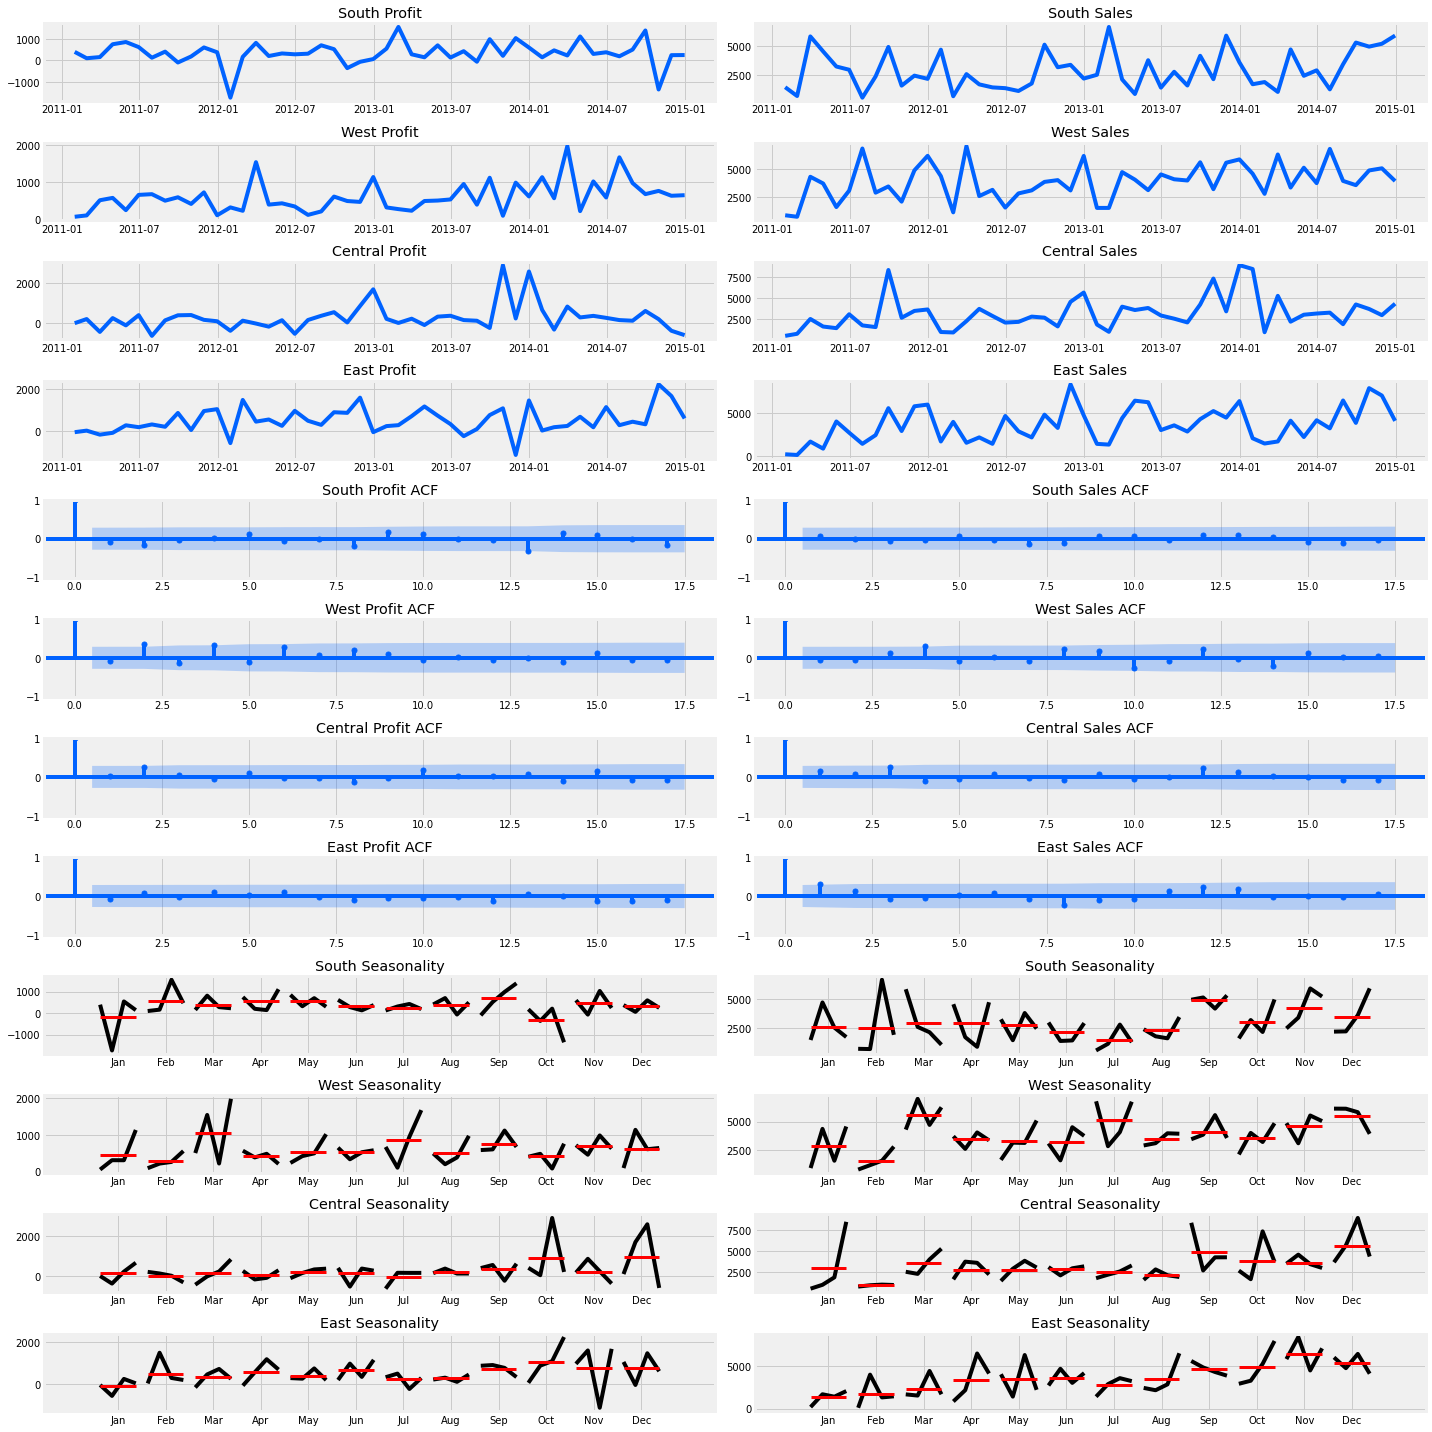

In [111]:
monthly_eda()

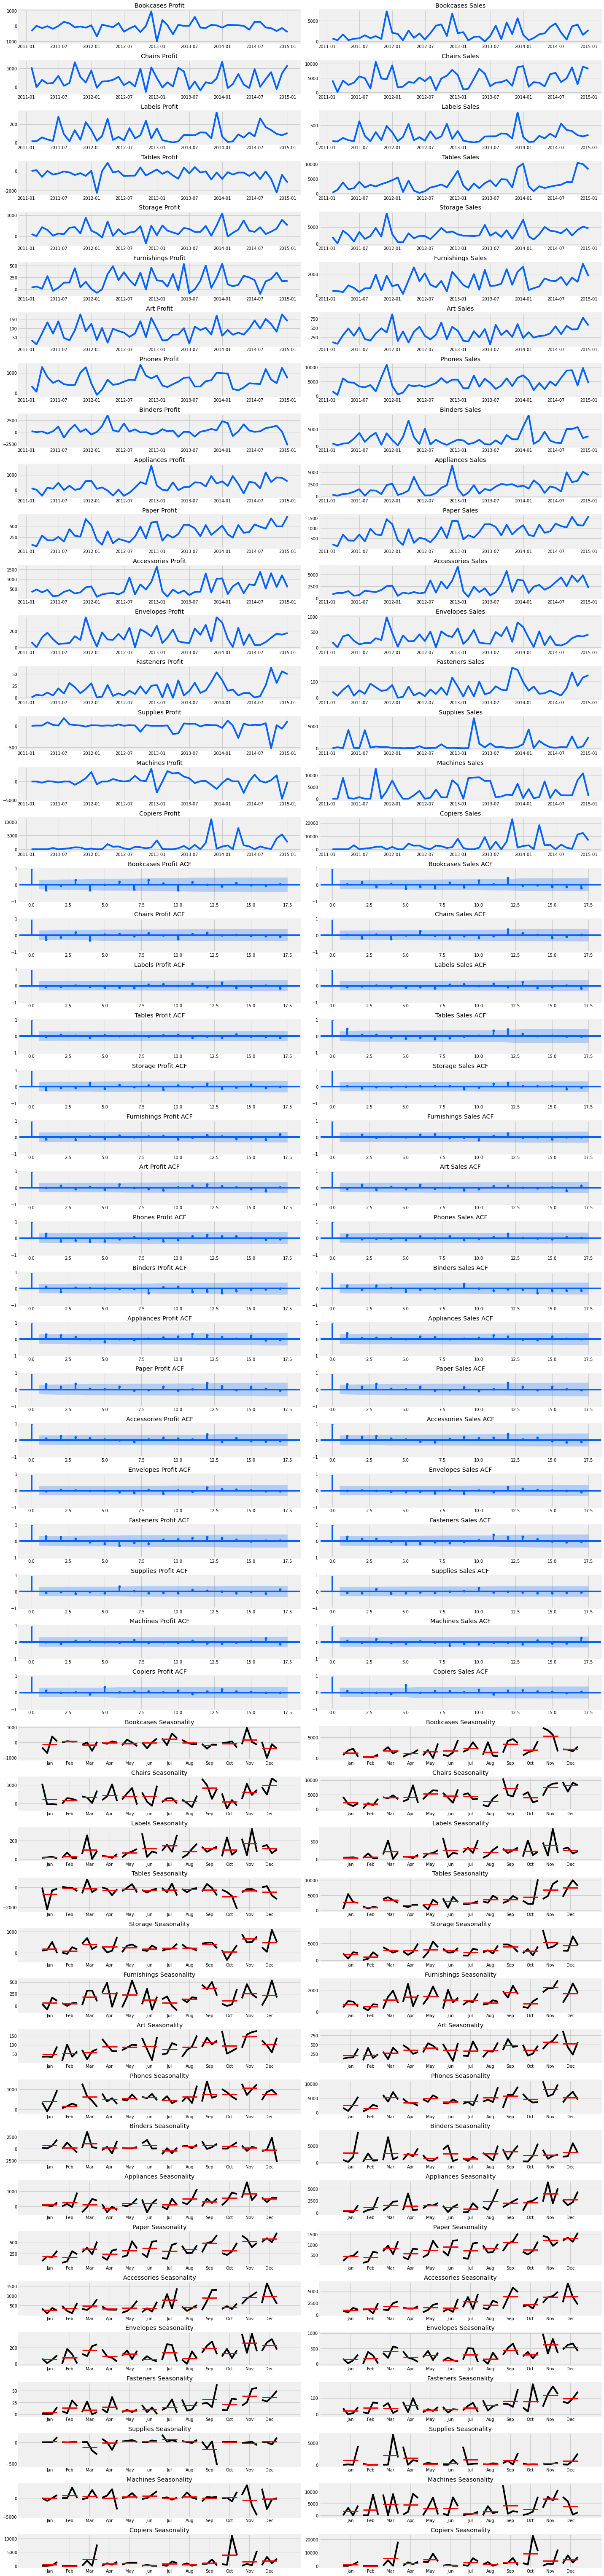

In [112]:
monthly_eda(cat_var='Sub-Category')

---

### Time Series Decomposition

<img src = "Time Series Decomposition.jpg">
<img src = "Time Series Decomposition1.jpg">
<img src = "Time Series Decomposition2.jpg">
<img src = "Time Series Decomposition3.jpg">
<img src = "Time Series Decomposition4.jpg">
<img src = "Time Series Decomposition5.jpg">
<img src = "Time Series Decomposition6.jpg">
<img src = "Time Series Decomposition7.jpg">

<img src = "Decomposition Models.jpg">
<img src = "Decomposition Models1.jpg">
<img src = "Decomposition Models2.jpg">
<img src = "Decomposition Models3.jpg">
<img src = "Decomposition Models4.jpg">
<img src = "Decomposition Models5.jpg">
<img src = "Decomposition Models6.jpg">
<img src = "Decomposition Models7.jpg">
<img src = "Decomposition Models8.jpg">

# Machine Learning Foundation

## Course 6, Part b: Decomposition LAB

# Introduction

Here we will discuss decomposition of your time series data into three components: 
1. Trend
2. Seasonality
3. Residual 


# Learning Outcomes

What will we accomplish?
1. First, we'll separately construct each time series component. 
2. Then we'll bring the three components together to create a simulated time series dataset. 
3. Finally, we'll leverage time series model decomposition in Python to deconstruct the series. 

We'll complete this process for the two most common processes: additive and multiplicative.

The whole point of this exercise is to get you familiar with time series data and simple modeling approaches. 

You should walk away from this tutorial with:
1. A practical understanding of the three components of time series data 
2. A better understanding of additive and multiplicative models
3. A simple way to decompose time series data in Python

# Imports

In [113]:
import sys
import statsmodels as ss
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_palette(palette)

---
# Section 1: Construct Trend, Seasonality, and Residual Components

In this lesson, we will individually construct fictional trend, seasonality, and residual components. This is merely an example to show you how a simple time series dataset is constructed. This will aid your understanding later on. In the meantime, let's create a time interval of minutes. 

In [114]:
time = np.arange(1, 51)

Now we need to create a trend. Let's pretend we have a sensor measuring demand for electricity. We'll ignore units to keep things simple.

In [115]:
trend = time * 2.75

What folllows is a plot showing trend as a function of time.

Text(0, 0.5, 'electricity demand')

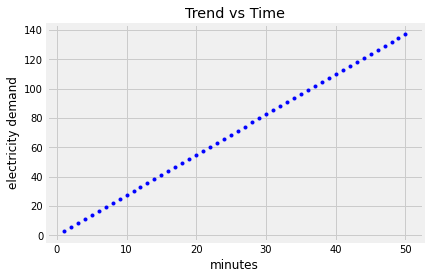

In [116]:
plt.plot(time, trend, 'b.')
plt.title("Trend vs Time")
plt.xlabel("minutes")
plt.ylabel("electricity demand")

Great! Now let's generate a seasonal component.

In [117]:
seasonal = 10 + np.sin(time) * 10

Naturally, we'll want to plot our seasonality.

Text(0, 0.5, 'electricity demand')

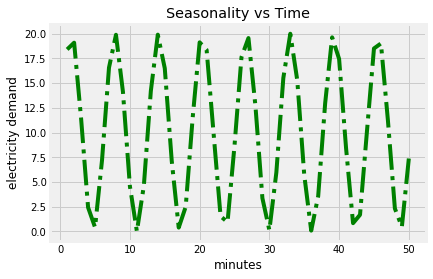

In [118]:
plt.plot(time, seasonal, 'g-.')
plt.title("Seasonality vs Time")
plt.xlabel("minutes")
plt.ylabel("electricity demand")

And now to construct the residual component.

In [119]:
np.random.seed(10)  # reproducible results
residual = np.random.normal(loc=0.0, scale=1, size=len(time))

A quick plot of residuals...

Text(0, 0.5, 'electricity demand')

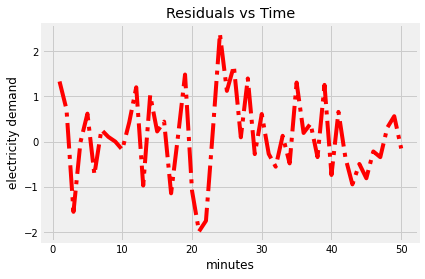

In [120]:
plt.plot(time, residual, 'r-.')
plt.title("Residuals vs Time")
plt.xlabel("minutes")
plt.ylabel("electricity demand")

Quick recap: We created data for the fictional demand of electricity as measured by a fictional sensor. We did this by creating the three necessary components of time series data, which include trend, seasonality, and residuals. 

Next step: Aggregate the three components to create time series data. We'll do this for two different types of models: additive and multiplicative.

---
# Section 2: Aggregate Trend, Seasonality, and Residual Components

### Additive Time Series
Remember the equation for additive time series is simply: $O_{t} = T_{t} + S_{t} + R_{t}$ 

$O_{t}$ is the output   
$T_{t}$ is the trend  
$S_{t}$ is the seasonality  
$R_{t}$ is the residual  
$_t$ is a variable representing a particular point in time 

In [121]:
additive = trend + seasonal + residual

Text(0, 0.5, 'electricity demand')

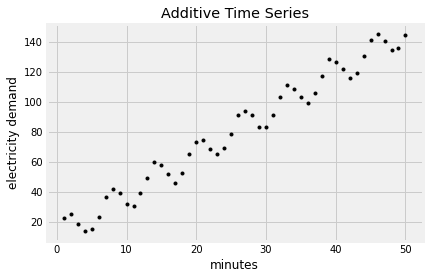

In [122]:
plt.plot(time, additive, 'k.')
plt.title("Additive Time Series")
plt.xlabel("minutes")
plt.ylabel("electricity demand")

We clearly see trend and seasonality in the plot above, as expected.

Now let's build a multiplicative time series dataset. 

### Multiplicative Time Series

Remember the equation for multiplicative time series is simply: $O_{t} = T_{t} * S_{t} * R_{t}$ 

In [123]:
# ignoring residual to make pattern more apparent
ignored_residual = np.ones_like(residual)
multiplicative = trend * seasonal * ignored_residual

Text(0, 0.5, 'electricity demand')

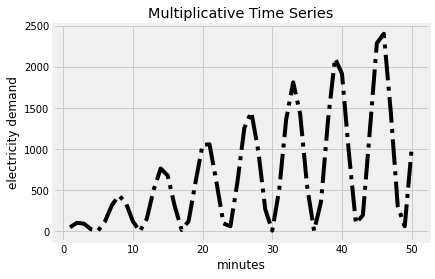

In [124]:
plt.plot(time, multiplicative, 'k-.')
plt.title("Multiplicative Time Series")
plt.xlabel("minutes")
plt.ylabel("electricity demand")

### Exercise #1
In this exercise, your task is two-fold:
1. Determine if **Dataset_A** and **Dataset_B** are additive or multiplicative time series.
2. Determine the frequency of the seasonal component.

#### Set Path / Load Datasets

In [125]:
# get data

time = np.arange(0, 50)
dataset_A = np.load("dataset_A.npy")
dataset_B = np.load("dataset_B.npy")

#### Plot Dataset_A

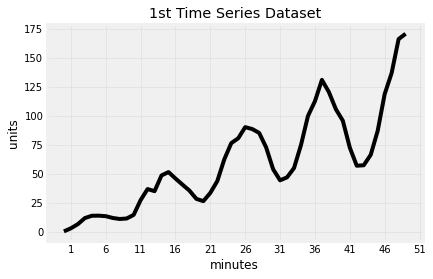

In [126]:
plt.plot(time, dataset_A, 'k-')
plt.title("1st Time Series Dataset")
plt.xlabel("minutes")
plt.xticks(np.linspace(1,51,11, dtype='int'))
plt.ylabel("units")
plt.grid(alpha=0.3);

#### Additive or Multiplicative?

*Dataset A is multiplicative. We know this because magnitude of the seasonality component in the 1st plot above is dependent on the trend.*

#### Frequency of Seasonal Component?

*The frequency appears to be ~6 for Dataset_A.*

#### Plot Dataset_B

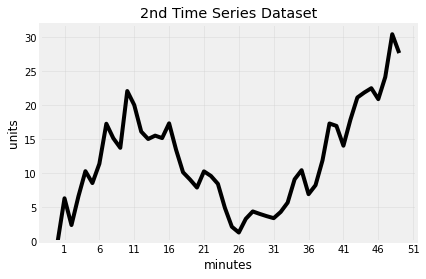

In [127]:
plt.plot(time, dataset_B, 'k-')
plt.title("2nd Time Series Dataset")
plt.xlabel("minutes")
plt.xticks(np.linspace(1,51,11, dtype='int'))
plt.ylabel("units")
plt.ylim(0, 32)
plt.grid(alpha=0.3);

#### Additive or Multiplicative?

*Dataset B is additive. We know this because the magnitude of the seasonality component in the 2nd plot above is independent of the trend.*

#### Frequency of Seasonal Component?

*The frequency appears to be ~3 for Dataset_B*.
### END SOLUTION

---
# Section 3: Time Series Decomposition

Now let's reverse directions. We have additive and multiplicative data. Let's decompose them into their three components. 

Please note that the goal here is NOT to understand HOW the decomposition works. Rather, the goal is simply to see that the time series data that we previously constructed can be decomposed into its three constituent parts: trend, seasonality, and residual.
> *Optional: look [here](http://www.statsmodels.org/dev/generated/statsmodels.tsa.seasonal.seasonal_decompose.html) for details on how the following method works.*

Let's take a look.

### Additive Decomposition

In [128]:
from statsmodels.tsa.seasonal import seasonal_decompose

ss_decomposition = seasonal_decompose(x=additive, model='additive', period=6)
estimated_trend = ss_decomposition.trend
estimated_seasonal = ss_decomposition.seasonal
estimated_residual = ss_decomposition.resid

### Additive Plots

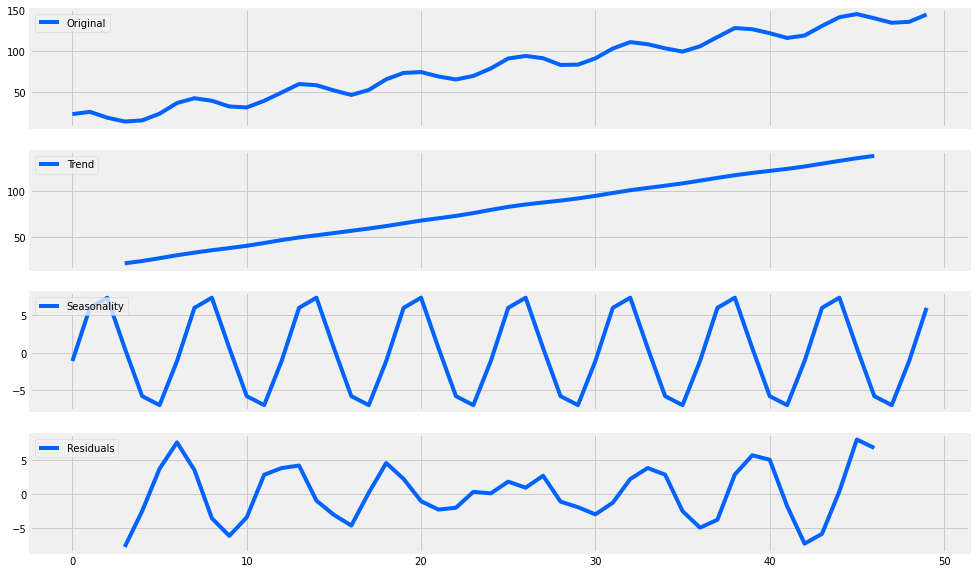

In [129]:
fig, axes = plt.subplots(4, 1, sharex=True, sharey=False)
fig.set_figheight(10)
fig.set_figwidth(15)

axes[0].plot(additive, label='Original')
axes[0].legend(loc='upper left')

axes[1].plot(estimated_trend, label='Trend')
axes[1].legend(loc='upper left')

axes[2].plot(estimated_seasonal, label='Seasonality')
axes[2].legend(loc='upper left')

axes[3].plot(estimated_residual, label='Residuals')
axes[3].legend(loc='upper left')

The blue line in each plot representes the decomposition. There is a legend in the upper left corner of each plot to let you know what each plot represents. 

You can see the decomposition is not perfect with regards to seasonality and residuals, but it's pretty close! 

**NOTE:** You may notice both *trend* and *residuals* are missing data towards the beginning and end. This has to do with how trend is calculated (beyond the scope of this lesson). The residuals are missing simply because $R_{t} = O_{t} - T_{t} - S_{t}$, so missing trend values mean missing residual values as well. In other words, there is nothing wrong with these graphs. 

### Multiplicative Decomposition

In [130]:
ss_decomposition = seasonal_decompose(x=multiplicative, model='multiplicative', period=6)
estimated_trend = ss_decomposition.trend
estimated_seasonal = ss_decomposition.seasonal
estimated_residual = ss_decomposition.resid

### Multiplicative Plots

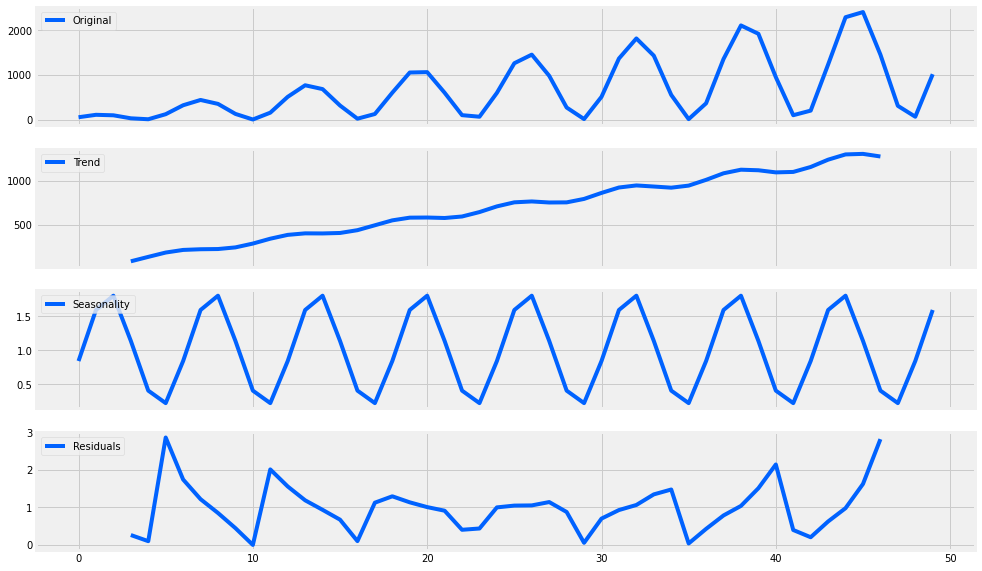

In [131]:
fig, axes = plt.subplots(4, 1, sharex=True, sharey=False)
fig.set_figheight(10)
fig.set_figwidth(15)

axes[0].plot(multiplicative, label='Original')
axes[0].legend(loc='upper left')

axes[1].plot(estimated_trend, label='Trend')
axes[1].legend(loc='upper left')

axes[2].plot(estimated_seasonal, label='Seasonality')
axes[2].legend(loc='upper left')

axes[3].plot(estimated_residual, label='Residuals')
axes[3].legend(loc='upper left')

Again, the decomposition does a relatively good job picking up the overall trend and seasonality. We can see the shapes follow the patterns we expect. 

### Exercise #2
In this exercise, your task is decompose **Dataset_A** and **Dataset_B**. You should first create a decomposition model in Python. Then you should plot the original series, the trend, seasonality, and residuals, in that order. 

#### Decomposition Models

In [132]:
from statsmodels.tsa.seasonal import seasonal_decompose


ss_decomposition_multi = seasonal_decompose(x=dataset_A, 
                                            model='multiplicative', 
                                            period=11)

estimated_trend_multi = ss_decomposition_multi.trend
estimated_seasonal_multi = ss_decomposition_multi.seasonal
estimated_residual_multi = ss_decomposition_multi.resid


ss_decomposition_add = seasonal_decompose(x=dataset_B, 
                                          model='additive', 
                                          period=3)

estimated_trend_add = ss_decomposition_add.trend
estimated_seasonal_add = ss_decomposition_add.seasonal
estimated_residual_add = ss_decomposition_add.resid

#### Dataset_A Plot

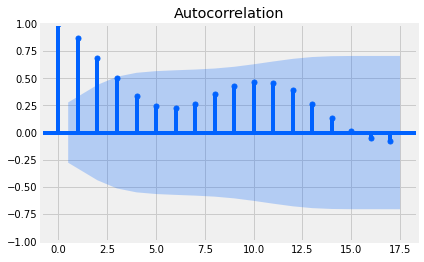

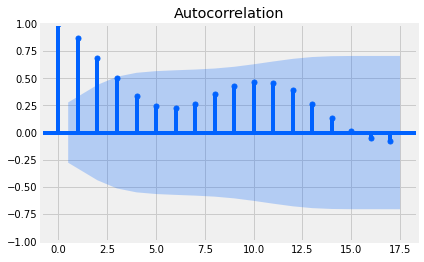

In [133]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(dataset_A)

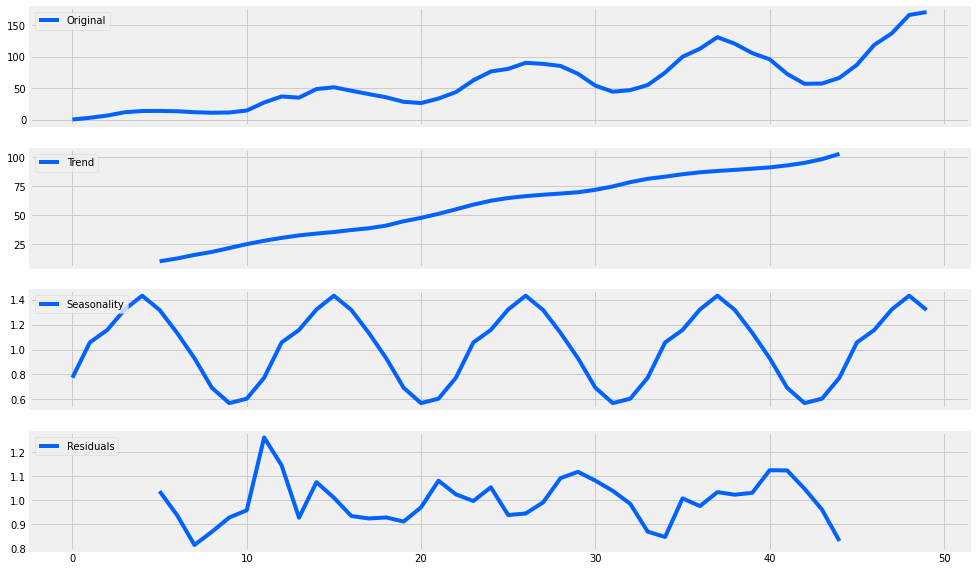

In [134]:
fig, axes = plt.subplots(4, 1, sharex=True, sharey=False)
fig.set_figheight(10)
fig.set_figwidth(15)

axes[0].plot(dataset_A, label='Original')
axes[0].legend(loc='upper left')

axes[1].plot(estimated_trend_multi, label='Trend')
axes[1].legend(loc='upper left')

axes[2].plot(estimated_seasonal_multi, label='Seasonality')
axes[2].legend(loc='upper left')

axes[3].plot(estimated_residual_multi, label='Residuals')
axes[3].legend(loc='upper left')

#### Dataset_B Plot

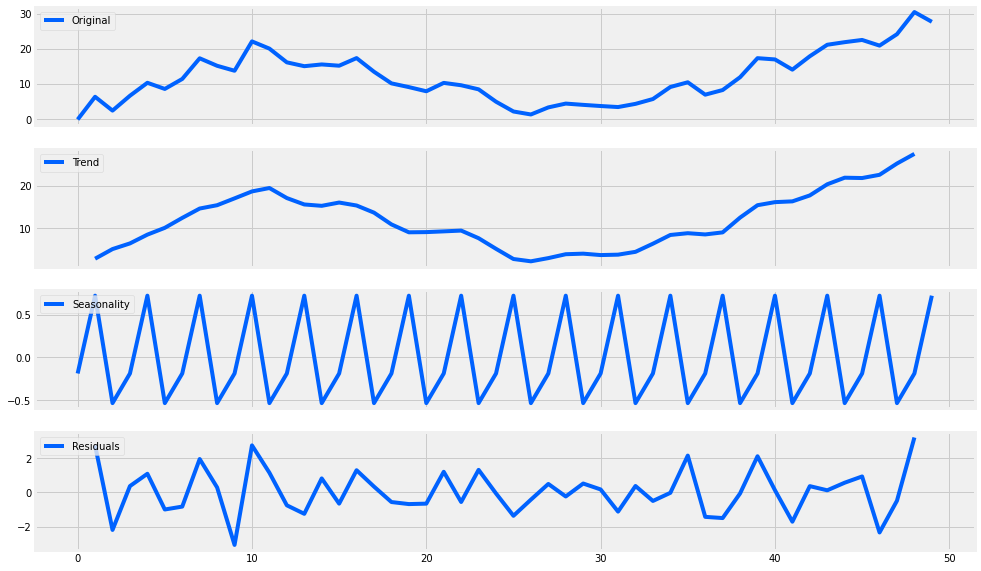

In [135]:
fig, axes = plt.subplots(4, 1, sharex=True, sharey=False)
fig.set_figheight(10)
fig.set_figwidth(15)

axes[0].plot(dataset_B, label='Original')
axes[0].legend(loc='upper left')

axes[1].plot(estimated_trend_add, label='Trend')
axes[1].legend(loc='upper left')

axes[2].plot(estimated_seasonal_add, label='Seasonality')
axes[2].legend(loc='upper left')

axes[3].plot(estimated_residual_add, label='Residuals')
axes[3].legend(loc='upper left')

---
# Summary

In this lesson you should have gained: 
1. A practical understanding of the three components of time series data 
2. A better understanding of additive and multiplicative models
3. A simple way to decompose time series data 


---

### Stationarity and Autocorrelation

<img src = "Stationarity and Autocorrelation.jpg">
<img src = "Stationarity and Autocorrelation1.jpg">
<img src = "Stationarity and Autocorrelation2.jpg">
<img src = "Stationarity and Autocorrelation3.jpg">
<img src = "Stationarity and Autocorrelation4.jpg">
<img src = "Stationarity and Autocorrelation5.jpg">
<img src = "Stationarity and Autocorrelation6.jpg">
<img src = "Stationarity and Autocorrelation7.jpg">

# Machine Learning Foundation

## Course 6, Part c: Stationarity DEMO

# Introduction

In Lesson 1, *An Introduction to Time Series*, we learned that time series data is data that is measured at equally-spaced intervals. We also learned that time series data can be decomposed into three parts: trend, seasonality, and residuals. 

Now we'll dig deeper by discussing an important concept called **stationarity**. Having a firm grasp of this concept will lay the foundation necessary to understand more advanced modeling strategies that we'll introduce in subsequent lessons. Spend the time to really understand this material.

# Learning Outcomes
You should walk away from this demonstration with:
1. A practical understanding of what it means for time series to be stationary.
2. A better understanding of ways to identify stationarity.
3. Several common ways to transform nonstationary time series data.

# Imports

In [5]:
import seaborn as sns
coloribm = {"Magenta 100":"2A0A16", "Magenta 90":"57002B", "Magenta 80":"760A3A", "Magenta 70":"A11950", "Magenta 60":"D12765", "Magenta 50":"EE538B", "Magenta 40":"FA75A6", "Magenta 30":"FFA0C2", "Magenta 20":"FFCFE1", "Magenta 10":"FFF0F6", "Purple 100":"1E1033", "Purple 90":"38146B", "Purple 80":"4F2196", "Purple 70":"6E32C9", "Purple 60":"8A3FFC", "Purple 50":"A66EFA", "Purple 40":"BB8EFF", "Purple 30":"D0B0FF", "Purple 20":"E6D6FF", "Purple 10":"F7F1FF", "Blue 100":"051243", "Blue 90":"061F80", "Blue 80":"0530AD", "Blue 70":"054ADA", "Blue 60":"0062FF", "Blue 50":"408BFC", "Blue 40":"6EA6FF", "Blue 30":"97C1FF", "Blue 20":"C9DEFF", "Blue 10":"EDF4FF", "Teal 100":"081A1C", "Teal 90":"003137", "Teal 80":"004548", "Teal 70":"006161", "Teal 60":"007D79", "Teal 50":"009C98", "Teal 40":"00BAB6", "Teal 30":"20D5D2", "Teal 20":"92EEEE", "Teal 10":"DBFBFB", "Gray 100":"171717", "Gray 90":"282828", "Gray 80":"3D3D3D", "Gray 70":"565656", "Gray 60":"6F6F6F", "Gray 50":"8C8C8C", "Gray 40":"A4A4A4", "Gray 30":"BEBEBE", "Gray 20":"DCDCDC", "Gray 10":"F3F3F3"} 
colors = []
colornum = 60
for i in [f'Blue {colornum}', f'Teal {colornum}', f'Magenta {colornum}', f'Purple {colornum}', f'Gray {colornum}']:
    colors.append(f'#{coloribm[i]}')
palette = sns.color_palette(colors)

In [7]:
import statsmodels as ss
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
sns.set_palette(palette)

---

# Section 1: Stationary Time Series

In this lesson, we will explore stationary time series. Specifically, we'll discuss what it means for time series to be stationary and show examples of a few time series that are not stationary.

As before, we'll generate datasets from scratch to help you establish a deeper understanding of what it means for time series data to be stationary or nonstationary. 

### What is Stationarity?
In order for time series data to be stationary, the data must exhibit four properties over time:
1. constant mean
2. constant variance
3. constant autocorrelation structure
4. no periodic component

Mean, variance, and periodic component (aka seasonality) should be familiar to you. Autocorrelation may not be. Autocorrelation simply means that the current time series measurement is correlated with a past measurement. For example, today's stock price is often highly correlated with yesterday's price. 

To discuss these things simply we must introduce the idea of a **lag**. Suppose you wanted to know if today's stock price correlated better with yesterday's price or the price from two days ago. You could test this by computing the correlation between the original time series and the same series delayed one time interval. Therefore, the second value of the original time series would be compared with the first of the delayed. The third original value would be compared with the second of the delayed. And so on. Performing this process for a lag of 1 and a lag of 2, respectively, would yield two correlation outputs. This output would tell you which lag is more correlated. That is **autocorrelation** in a nutshell. 

Let's apply what we've learned now that we nailed down terminology.

We'll begin by creating a variable called **time** that will define equally-spaced time intervals. Then we'll sample values from a Normal distribution with mean 0 and a standard deviation of 1. Essentially we're creating noise, which is a stationary time series. In other words, the series of data exhibits all four proporties required of a stationary time series.

In [ ]:
# reproducibility
np.random.seed(42)

# data
time = np.arange(100)
stationary = np.random.normal(loc=0, scale=1.0, size=len(time))

In [ ]:
stationary

array([ 0.49671415, -0.1382643 ,  0.64768854,  1.52302986, -0.23415337,
       -0.23413696,  1.57921282,  0.76743473, -0.46947439,  0.54256004,
       -0.46341769, -0.46572975,  0.24196227, -1.91328024, -1.72491783,
       -0.56228753, -1.01283112,  0.31424733, -0.90802408, -1.4123037 ,
        1.46564877, -0.2257763 ,  0.0675282 , -1.42474819, -0.54438272,
        0.11092259, -1.15099358,  0.37569802, -0.60063869, -0.29169375,
       -0.60170661,  1.85227818, -0.01349722, -1.05771093,  0.82254491,
       -1.22084365,  0.2088636 , -1.95967012, -1.32818605,  0.19686124,
        0.73846658,  0.17136828, -0.11564828, -0.3011037 , -1.47852199,
       -0.71984421, -0.46063877,  1.05712223,  0.34361829, -1.76304016,
        0.32408397, -0.38508228, -0.676922  ,  0.61167629,  1.03099952,
        0.93128012, -0.83921752, -0.30921238,  0.33126343,  0.97554513,
       -0.47917424, -0.18565898, -1.10633497, -1.19620662,  0.81252582,
        1.35624003, -0.07201012,  1.0035329 ,  0.36163603, -0.64

It makes sense to generate a run-sequence plot to visually confirm stationarity. 
> We'll create a *run_sequence_plot* function to make plotting throughout this tutorial less cumbersome.

In [ ]:
def run_sequence_plot(x, y, title, xlabel="time", ylabel="series"):
    plt.plot(x, y, 'k-')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(alpha=0.3)

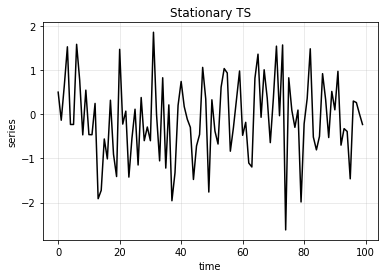

In [ ]:
run_sequence_plot(time, stationary, 
                  title="Stationary TS")

Notice in the plot above how there's no clear trend or seasonality. This time series data appears to be meet the four conditions of stationarity: constant mean, constant variance, constant autocorrelation, and no periodic component. 

Let's look at one more example, a concrete example of data with a lag of one that has constant autocorrelation.

### Autocorrelation Structure

In [ ]:
# seed to start series
seed = 3.14

# create autocorrelated data
lagged = np.empty_like(time, dtype='float')
for t in time:
    lagged[t] = seed + np.random.normal(loc=0, scale=2.5, size=1)
    seed = lagged[t]

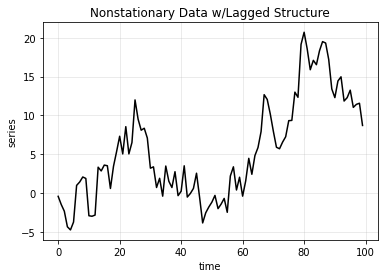

In [ ]:
run_sequence_plot(time, lagged,
                  title="Nonstationary Data w/Lagged Structure")

Notice how the current value is highly correlated with the past value?

At this point you're probably wondering how to check if a time series in fact meets the four conditions of stationarity. We'll learn in Section #2 how to check that. However, starting your analysis with a run-sequence plot is an effective way to get a handle on whether your data has the appearance of being stationary. 

To drive that point home, let's discuss some ways to generate nonstationary time series:
1. **Trend** (changing mean)
2. **Heteroscedasticity** (changing variance)
3. **Seasonality** (periodic component)
4. **Trend + Seasonality**

Naturally, we'll plot the results of each so we can compare nonstationary to stationary data. 

---

#### Trend

In [ ]:
trend = (time * 2.75) + stationary

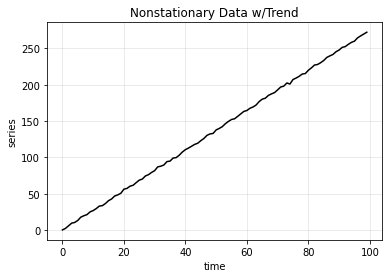

In [ ]:
run_sequence_plot(time, trend,
                  title="Nonstationary Data w/Trend")

**Question:** Why is this data not stationary?

**Answer:** The mean changes over time.

---

#### Heteroscedasticity

In [ ]:
# reproducibility
np.random.seed(1234)

# data
level_1 = np.random.normal(loc=0, scale=1.0, size = 50)
level_2 = np.random.normal(loc=0, scale=10.0, size = 50)
heteroscedasticity = np.append(level_1, level_2)

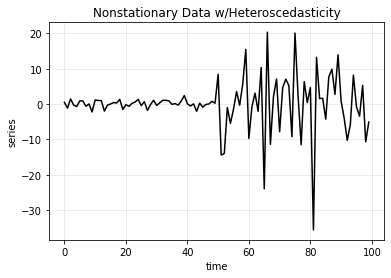

In [ ]:
run_sequence_plot(time, heteroscedasticity,
                  title="Nonstationary Data w/Heteroscedasticity")

**Question:** Why is this data not stationary?

**Answer:** The variance changes over time.

---

#### Seasonality

In [ ]:
seasonality = 10 + np.sin(time) * 10

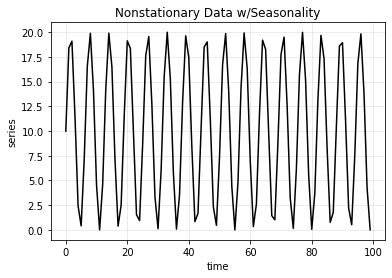

In [ ]:
run_sequence_plot(time, seasonality,
                  title="Nonstationary Data w/Seasonality")

**Question:** Why is this data not stationary?

**Answer:** There is a periodic component.

---

#### Trend + Seasonality

In [ ]:
trend_seasonality = trend + seasonality + stationary

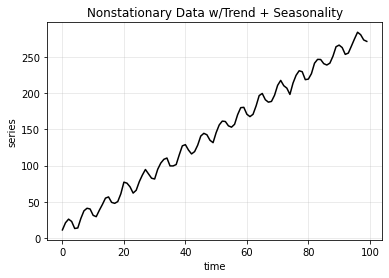

In [ ]:
run_sequence_plot(time, trend_seasonality,
                  title="Nonstationary Data w/Trend + Seasonality")

**Question:** Why is this data not stationary?

**Answer:** The mean changes over time AND there is a periodic component.

---

### Exercise #1
In this exercise, your task is to:
1. Create a time variable called **mytime** that is componed of the integers from 0 to 99 inclusive.  
2. Read in **dataset_SNS_1.npy** and **dataset_SNS_2.npy** as **dataset_SNS_1** and **dataset_SNS_2**, respectively. 
3. Plot each time series dataset.
4. Start thinking about whether each is stationary or nonstationary. 

In [ ]:
# create time variable
mytime = np.arange(100)

In [ ]:
# get data
dataset_SNS_1 = np.load("dataset_SNS_1.npy")
dataset_SNS_2 = np.load( "dataset_SNS_2.npy")

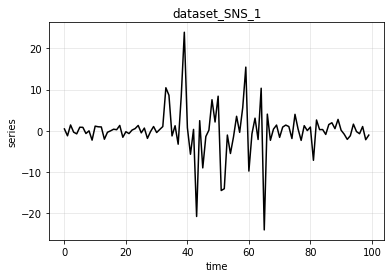

In [ ]:
# plot dataset_SNS_1
run_sequence_plot(mytime, dataset_SNS_1, title="dataset_SNS_1")

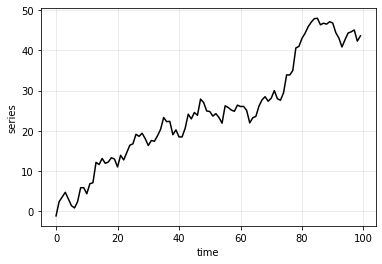

In [ ]:
# plot dataset_SNS_2
run_sequence_plot(mytime, dataset_SNS_2, title="")

#### Your Preliminary Thoughts
Are both datasets stationary or is one stationary and one nonstationary or are both nonstationary? 

**dataset_SNS_1** has heteroscedasticity (non-constant variance). We can see three distinct regions of variance - a small one for the first 33 values, a large one for the next 33, and a medium variance for the remaining 34.

**dataset_SNS_2** has a changing mean (trend/autocorrelation) which is clearly not stationary.

---

# Section 2: Identifying Stationarity

In this lesson, we will identify common techniques used to identify if a time series is stationary or not. 

Specifically, we will cover:
1. Run-sequence plots
2. Summary statistics & histogram plots
3. Augmented Dickey-Fuller test

### Run-Sequence Plots
Run-sequence plots should be old hat by now. They are the go-to technique to visualize what's happening with your data. You should always start here. Don't bother building a model until you've done this.

In order to be thorough, let's plot the nonstationary data from above that has trend and seasonality components.

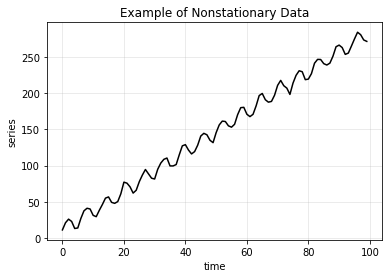

In [ ]:
run_sequence_plot(time, trend_seasonality,
                  title="Example of Nonstationary Data")

### Summary Statistics & Plots

Perhaps the easiest way to check for constant mean and variance is to chop up the data into separate chunks, calculate statistics for each chunk, and compare. It's not the most rigorous method but it gives you a good sense of whether your data is approximately stationary.

Let's look at an example using the *trend* data we created in the last section.

In [ ]:
# split data into 10 chunks
chunks = np.split(trend, indices_or_sections=10)

In [ ]:
chunks[0]

array([ 0.49671415,  2.6117357 ,  6.14768854,  9.77302986, 10.76584663,
       13.51586304, 18.07921282, 20.01743473, 21.53052561, 25.29256004])

#### Summary Stats

In [ ]:
# compare means and variances
print("{} | {:7} | {}".format("Chunk", "Mean", "Variance"))
print("-" * 26)
for i, chunk in enumerate(chunks, 1):
    print("{:5} | {:.6} | {:.6}".format(i, np.mean(chunk), np.var(chunk)))

Chunk | Mean    | Variance
--------------------------
    1 | 12.8231 | 62.548
    2 | 39.0843 | 60.8662
    3 | 67.1532 | 58.7456
    4 | 94.5649 | 57.2321
    5 | 122.122 | 58.9505
    6 | 150.074 | 65.1111
    7 | 177.36 | 67.7091
    8 | 204.827 | 54.8101
    9 | 232.476 | 62.6766
   10 | 259.726 | 61.6424


#### Tangent
There's a nice shortcut method in NumPy to get the same results without having to run through a for loop. 

In [ ]:
np.mean(chunks, axis=1)

array([ 12.82306111,  39.08434177,  67.15315644,  94.56489333,
       122.12217783, 150.07444143, 177.35994301, 204.82726388,
       232.47644743, 259.72580861])

In [ ]:
np.var(chunks, axis=1)

array([62.54798758, 60.86616531, 58.74556884, 57.2320973 , 58.9505395 ,
       65.11109596, 67.70905522, 54.81013753, 62.67659981, 61.642402  ])

Notice how the values in each array perfectly matches the values in the for loop above? 

#### Explanation

While the variance is relatively constant over time, the mean is clearly changing which means this data is not stationary. 

> Note: We do expect some fluctuation in values. It's highly unlikely that the either the mean or variace will be exactly the same from chunk to chunk, but it should be close. 

If you wanted to get even more sophisticated, you could run a statistical test to determine if the difference in means or the difference in variances is statistically significant. That is beyond the scope of this tutorial, however.

Another useful tool is to plot the means and variances.

#### Histogram Plot

<AxesSubplot:>

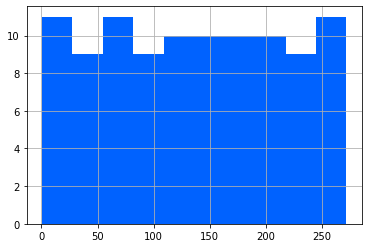

In [ ]:
pd.Series(trend).hist()

Plotting a histogram of the time series gives important clues into its underlying structure. A Normal distribution gives confidence that mean and variance are constant. It's certainly not definitive but gives you a good indication. 

Here we see what appears to be a uniform distribution. As we would expect for time series with trend, this data is not stationary and the histogram plot provides insight into that fact.

Let's try the same thing on the *stationary* data we created way back at the beginning. 

<AxesSubplot:>

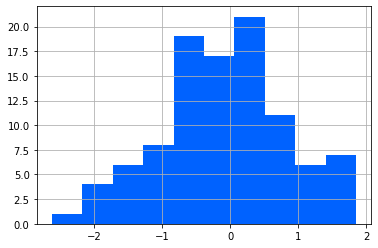

In [ ]:
pd.Series(stationary).hist()

That definitely looks more approximately Normal. 

While again out of scope, we could use SciPy's [normaltest](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.mstats.normaltest.html) to check whether this sample differs from a Normal distribution.

### Augmented Dickey-Fuller Test
This is a statistical procedure to suss out whether a time series is stationary or not. We won't go into all the nitty gritty details but here's what you need to know:
1. **Null hypothesis:** the series is nonstationary.
2. **Alternative hypothesis:** the series is stationary.

Like any statistical test you should set a significance level or threshold that determines whether you should accept or reject the null. 
> The value 0.05 is common but depends upons numerous factors.

Let's see how to run this test in Python.

#### Stationary Data & ADF

In [ ]:
from statsmodels.tsa.stattools import adfuller

adf, pvalue, usedlag, nobs, critical_values, icbest = adfuller(stationary)

A brief discussion about the important outputs from the ADF test is in order. 

In [ ]:
print(adf)

-10.08442591366971


First, **adf** is the value of the test statistic. The more negative the value, the more confident we can be that the series is stationary. Here we see a value of -10. That may not mean anything to you just yet but the **pvalue** should.

In [ ]:
print(pvalue)

1.1655044784188918e-17


Next, **pvalue** is interpreted like any p-value. Once we set a threshold, we can compare this p-value to that threshold. Either we reject or fail to reject the null. Here **pvalue** is very close to zero (~$10^{-17}$) so we reject the null that this data is nonstationary.

In [ ]:
print(nobs)

99


The variable **nobs** is simply the number of observations in the time series, in this case 99.

In [ ]:
print(critical_values)

{'1%': -3.498198082189098, '5%': -2.891208211860468, '10%': -2.5825959973472097}


Finally, the **critical_values** variable provides test statistic threholds for common significant levels. Here we see a test statistic of roughly -2.89 and lower is sufficient to reject the null using a significance level of 5%.

> You may have noticed two outputs we didn't discuss. See [statsmodels docs](http://www.statsmodels.org/stable/generated/statsmodels.tsa.stattools.adfuller.html) for a description of **usedlag** and **icbest**.

#### Trend Data & ADF
Now to run the ADF test on the *trend* data. 

In [ ]:
adf, pvalue, usedlag, nobs, critical_values, icbest = adfuller(trend, regression='c')
print("ADF: ", adf)
print("p-value:", pvalue)

ADF:  0.33188731231642393
p-value: 0.9787610787258308


#### Lagged Data & ADF
As expected, we fail to reject the null that the trend data is in fact nonstationary. Success!

Let's run the same test on the *lagged* data.

In [ ]:
adf, pvalue, usedlag, nobs, critical_values, icbest = adfuller(lagged, regression='c')
print("ADF: ", adf)
print("p-value:", pvalue)

ADF:  -1.8975904890519297
p-value: 0.33319546838684744


You may find this a surprising result as ADF says the series is nonstationary. Even though the series does have constant autocorrelation, it is not yet in a form that is techincally statinoary. Therefore, we'll learn in the next section how to apply said transformation to accomplish just that.

#### The Good News 
You now have several tools in your toolkit to help you figure out if a given time series is stationary or not.

---

### Exercise #2
Think back to the two datasets from Exercise #1. You should have the tools to answer whether each is stationary or not. Provide your answers and explanations below.

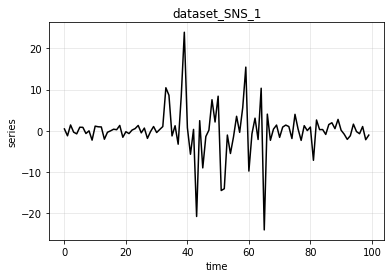

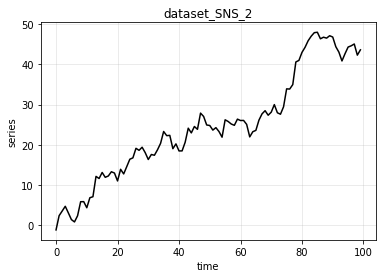

In [ ]:
# run-sequence plots
run_sequence_plot(time, dataset_SNS_1,
                  title="dataset_SNS_1")
plt.show()
run_sequence_plot(time, dataset_SNS_2,
                  title="dataset_SNS_2")

**Explanation:** Both appear nonstationary (heteroscedasticity and trend/autocorrelation, respectively).

In [ ]:
# chunked stats

# split data into 10 chunks
chunks1 = np.split(dataset_SNS_1, indices_or_sections=10)
chunks2 = np.split(dataset_SNS_2, indices_or_sections=10)

print("[chunk1]")
print("Mean: \n", np.mean(chunks1, axis=1))
print("Var: \n", np.var(chunks1, axis=1))
print()
print("[chunk2]")
print("Mean: \n", np.mean(chunks2, axis=1))
print("Var: \n", np.var(chunks2, axis=1))

[chunk1]
Mean: 
 [-0.14368349  0.121089    0.04714784  4.92083495 -2.32626967 -0.3706503
 -1.95084875  0.34634898  0.30483126 -0.51907842]
Var: 
 [ 1.1064868   1.16521661  0.76635153 59.91993023 55.94682032 79.168351
 77.81561226  3.18839451  7.29302955  1.34694601]

[chunk2]
Mean: 
 [ 2.8186155  10.51083038 16.02252814 19.73251898 23.26775272 24.60790371
 25.54323527 32.73577811 46.28942898 43.77348672]
Var: 
 [ 4.50258195  9.30343813  7.51911006  4.97894604  9.42707844  1.77171835
  3.96080036 22.71299455  2.22467478  2.47819651]


**Explanation:** dataset_SNS_1 clearly has three regions of differing variance while dataset_SNS_2 clearly has changing mean.

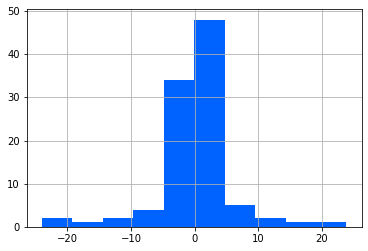

<AxesSubplot:>

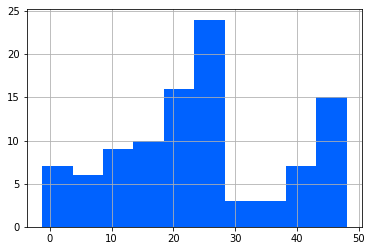

In [ ]:
# histograms
pd.Series(dataset_SNS_1).hist()
plt.show()
pd.Series(dataset_SNS_2).hist()

**Explanation:** dataset_SNS_1 is somewhat Normal but spikey with long tails on both sides while dataset_SNS_2 is far from Normal.

In [ ]:
# ADF tests
adf_1, pvalue_1, usedlag_, nobs_, critical_values_1, icbest_ = adfuller(dataset_SNS_1)
print("dataset_SNS_1")
print("ADF: ", adf_1)
print("p-value:", pvalue_1)
print("crit values: ", critical_values_1)

print()

adf_2, pvalue_2, usedlag_, nobs_, critical_values_2, icbest_ = adfuller(dataset_SNS_2)
print("dataset_SNS_1")
print("ADF: ", adf_2)
print("p-value:", pvalue_2)
print("crit values: ", critical_values_2)

dataset_SNS_1
ADF:  -3.032415903501601
p-value: 0.031976064558616055
crit values:  {'1%': -3.50434289821397, '5%': -2.8938659630479413, '10%': -2.5840147047458037}

dataset_SNS_1
ADF:  -1.3222642986946491
p-value: 0.6189258221979337
crit values:  {'1%': -3.498198082189098, '5%': -2.891208211860468, '10%': -2.5825959973472097}


**Explanation:** We've seen before how ADF has trouble identifying heteroscedastic data so we have to consider all tools when it comes to dataset_SNS_1. Here, ADF is telling us the series is stationary, but that's clearly not the case. On the flip side, ADF says dataset_SNS_2 is nonstationary, as we can tell from the run-sequence plot. 

Therefore, both datasets are nonstationary and require transformation.

---

---

# Section 3: Common Nonstationary-to-Stationary Transformations

In this lesson, we will showcase several common ways to transform nonstationary time series data to stationary time series data. 
>Please note that this is but a small subset of the total possible ways to transform nonstationary time series. However, these methods will provide a strong foundation upon which to build in the future.

### Example #1: Remove Trend & Seasonality with Statsmodels

Let's run the ADF test before transforming.

In [ ]:
adf_b4, pvalue_b4, usedlag_, nobs_, critical_values_, icbest_ = adfuller(trend_seasonality)
print("ADF: ", adf_b4)
print("p-value: ", pvalue_b4)

ADF:  0.29403605928892956
p-value:  0.977069203786864


Nonstationary as we expect. Time for a transformation.

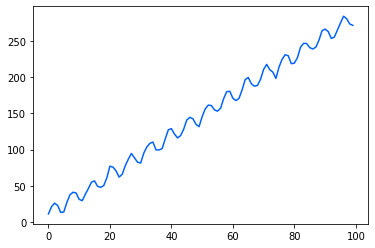

In [ ]:
plt.plot(trend_seasonality)

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

ss_decomposition = seasonal_decompose(x=trend_seasonality, model='additive', period=6)
est_trend = ss_decomposition.trend
est_seasonal = ss_decomposition.seasonal
est_residual = ss_decomposition.resid

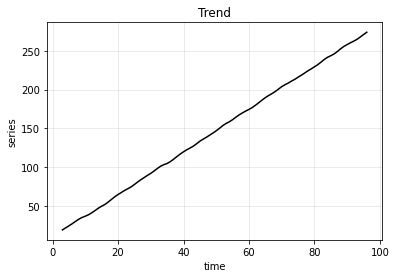

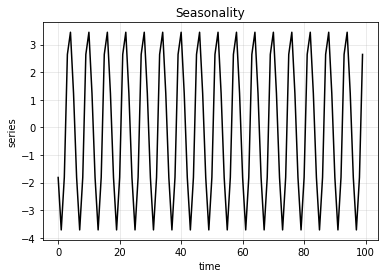

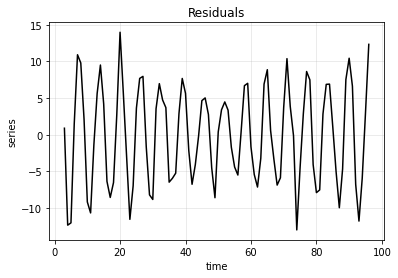

In [ ]:
run_sequence_plot(time, est_trend, title="Trend", ylabel="series")
plt.show()
run_sequence_plot(time, est_seasonal, title="Seasonality", ylabel="series")
plt.show()
run_sequence_plot(time, est_residual, title="Residuals", ylabel="series")

Let's take a quick peek at the residual values.

In [ ]:
print(est_residual)

[         nan          nan          nan   0.8840983  -12.35758556
 -12.04433461   1.48296718  10.92168902   9.79838903   2.1098592
  -9.18549316 -10.68530084  -1.39341901   5.62708429   9.51728139
   4.19733863  -6.37688101  -8.57079082  -6.54120712   2.73466783
  13.99559009   5.66172011  -2.96051089 -11.56383319  -6.98680664
   3.63407228   7.6896628    7.96829354  -1.62794659  -8.22074175
  -8.84730447   3.55066635   6.97315154   4.74605812   3.69790485
  -6.48278186  -5.95820585  -5.25809215   2.87435058   7.68322103
   5.64810713  -2.17356117  -6.77398565  -4.08149483  -0.16197687
   4.65431128   5.02346523   2.76727458  -4.5018214   -8.61021749
   0.383526     3.39920212   4.47636135   3.35785156  -1.70991311
  -4.41005501  -5.51047744   0.45522075   6.69811425   7.02150652
  -1.65724247  -5.43116384  -7.15141958  -3.23759496   6.91315694
   8.8780479    0.56710431  -3.33147621  -6.88311175  -5.88888625
   3.72543884  10.38963663   3.8706296   -0.1327287  -13.00749744
  -4.573024

We'll have to remove the first and last three values to run an ADF test since those values are all **nan**. Here's how to do that and run the test all in one call.

In [ ]:
adf_after, pvalue_after, usedlag_, nobs_, critical_values_, icbest_ = adfuller(est_residual[3:-3])
print("ADF: ", adf_after)
print("p-value: ", pvalue_after)

ADF:  -5.672045394689448
p-value:  8.876265981114968e-07


Now it's stationary!

### Example 2: Remove Changing Variance w/Log Transformation
This trick works well when you're dealing with heteroscedastic data. Let's plot that again to remind you what that looks like.

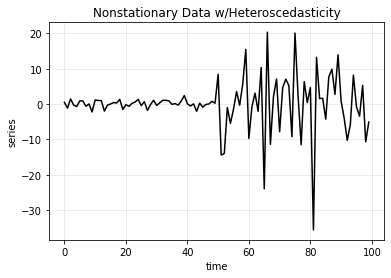

In [ ]:
run_sequence_plot(time, heteroscedasticity,
                  title="Nonstationary Data w/Heteroscedasticity")

Notice how the plot shows two clearly different variance levels, one with small variance at the left and another with larger variance to the right?

Let's run the ADF test.

In [ ]:
adf_b4, pvalue_b4, usedlag_, nobs_, critical_values_, icbest_ = adfuller(heteroscedasticity)
print("ADF: ", adf_b4)
print("p-value: ", pvalue_b4)
print("Critical Values: ", critical_values_)

ADF:  -5.462617806964478
p-value:  2.4990147402545345e-06
Critical Values:  {'1%': -3.5019123847798657, '5%': -2.892815255482889, '10%': -2.583453861475781}


Hmm, ADF is saying we reject the null that this series is nonstationary. However, the plot clearly shows that the variance is not constant with time. 

This is an important lesson: Plotting is a useful tool because some statistical tests like ADF have low power, meaning they either need lots and lots of data or they may incorrecly reject the null hypothesis when in fact the null is true. 

#### Log Transformation

We can apply a log transformation. However, we cannot take the log of nonpositive values. The way we can get around this is by adding a constant to all values to make them positive. 

Let's take a look. 

In [ ]:
new_hetero = heteroscedasticity + 38

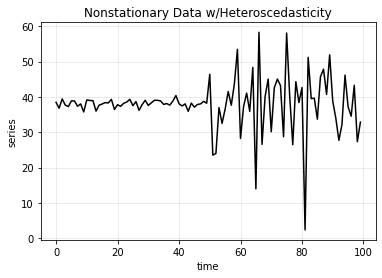

In [ ]:
run_sequence_plot(time, new_hetero,
                  title="Nonstationary Data w/Heteroscedasticity")

Now every value is positive and we can apply the log transformation.

In [ ]:
log_new_hetero = np.log(new_hetero)

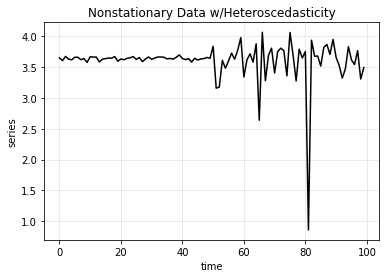

In [ ]:
run_sequence_plot(time, log_new_hetero,
                  title="Nonstationary Data w/Heteroscedasticity")

Notice how the variance has collapsed to a large extent. 

Let's view the ADF test statistics again.

In [ ]:
adf_after, pvalue_after, usedlag_, nobs_, critical_values_, icbest_ = adfuller(log_new_hetero)
print("ADF: ", adf_after)
print("p-value: ", pvalue_after)

ADF:  -11.988221715202043
p-value:  3.5714555887959506e-22


The big takeaway here is that the test confirms a greater confidence in the log transformed time series being stationary.

### Example 3: Removing Autocorrelation with Differencing
Remember the *lagged* data? Turns out we can transform this series into stationary by applying what's called a differece. It's a fancy term that simply means you're going to subtract a past value from a current value. An example will make this clear.

We know *lagged* was created with a lag of one. So let's subtract $O_{t-1}$ from $O_{t}$ where $O_{t}$ is the observed data at time *t* and $O_{t-1}$ is the observed data at *t-1*.

In [ ]:
difference = lagged[:-1] - lagged[1:]

In [ ]:
pd.DataFrame({'roiginal':lagged[:-1],'shift':lagged[1:]})

roiginal  shift
0       -0.4   -1.5
1       -1.5   -2.3
2       -2.3   -4.3
3       -4.3   -4.7
4       -4.7   -3.7
..       ...    ...
94      12.3   13.3
95      13.3   11.0
96      11.0   11.4
97      11.4   11.6
98      11.6    8.7

[99 rows x 2 columns]

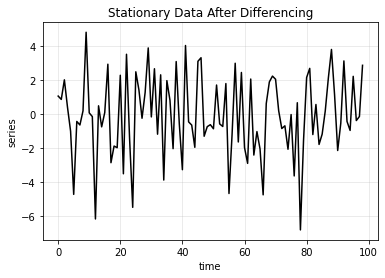

In [ ]:
run_sequence_plot(time[:-1], difference,
                  title="Stationary Data After Differencing")

Let's run ADF one more time, this time on the differenced data.

In [ ]:
adf_after, pvalue_after, usedlag_, nobs_, critical_values_, icbest_ = adfuller(difference)
print("ADF: ", adf_after)
print("p-value: ", pvalue_after)

ADF:  -10.809982939729167
p-value:  1.9196947925176694e-19


It's stationary!

A key question that should be on the tip of your mind right now is how do you know if your data has autocorrelation and how do you decide what lag to use when differencing? Have no fear. We will discuss all the gory details in the the next lesson.

---

### Exercise #3
If either or both datasets from exercises one and two are nonstationary, apply the transformations you learned in this section to make them so. Then apply the methods you learned in Section 2 to ensure stationarity.

In [ ]:
dataset_SNS_1_log = np.log( dataset_SNS_1 + 25 )

In [ ]:
dataset_SNS_2_diff = dataset_SNS_2[:-1] - dataset_SNS_2[1:]

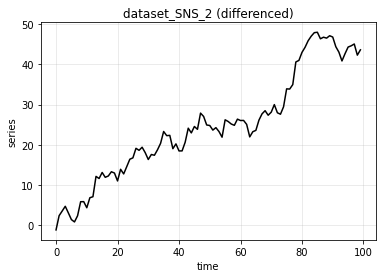

In [ ]:
run_sequence_plot(time, dataset_SNS_2,
                  title="dataset_SNS_2 (differenced)")

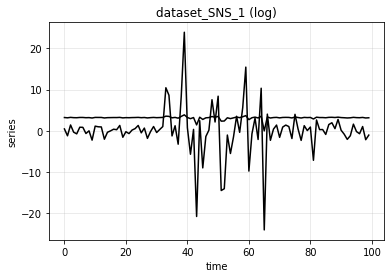

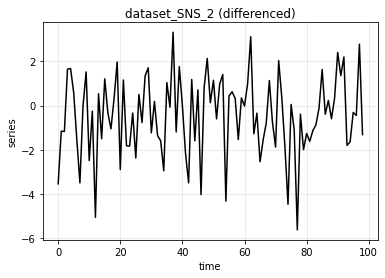

In [ ]:
# run-sequence plots
run_sequence_plot(time, dataset_SNS_1,
                  title="orignal")
run_sequence_plot(time, dataset_SNS_1_log,
                  title="dataset_SNS_1 (log)")
plt.show()
run_sequence_plot(time[:-1], dataset_SNS_2_diff,
                  title="dataset_SNS_2 (differenced)")

In [ ]:
# chunked stats

# split data into 10 chunks
chunks1_log = np.split(dataset_SNS_1_log, indices_or_sections=10)
chunks2_diff = np.split(dataset_SNS_2_diff, indices_or_sections=9)

print("[chunk1]")
print("Mean: \n", np.mean(chunks1_log, axis=1))
print("Var: \n", np.var(chunks1_log, axis=1))
print()
print("[chunk2]")
print("Mean: \n", np.mean(chunks2_diff, axis=1))
print("Var: \n", np.var(chunks2_diff, axis=1))

[chunk1]
Mean: 
 [3.2122048  3.22276024 3.22014064 3.36950829 3.01519423 3.12475748
 2.89444899 3.23016944 3.22427585 3.1967811 ]
Var: 
 [0.00182641 0.00191978 0.00124754 0.05440107 0.30781792 0.17757266
 0.97585652 0.00491835 0.01462046 0.00221582]

[chunk2]
Mean: 
 [-0.72869606 -0.53901512 -0.54678965 -0.38227396 -0.29692422  0.00731073
 -0.80460227 -1.052042    0.2654023 ]
Var: 
 [3.49814788 3.77394136 1.65346545 4.05400889 4.27486911 2.01011003
 2.74965891 2.99322188 2.53347512]


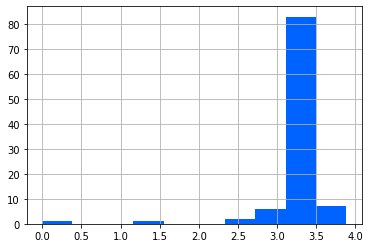

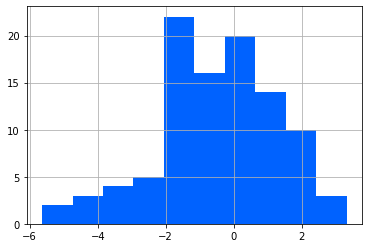

In [ ]:
# histograms
pd.Series(dataset_SNS_1_log).hist()
plt.show()
pd.Series(dataset_SNS_2_diff).hist();

In [ ]:
# ADF tests
adf_1, pvalue_1, usedlag_, nobs_, critical_values_1, icbest_ = adfuller(dataset_SNS_1_log)
print("dataset_SNS_1")
print("ADF: ", adf_1)
print("p-value:", pvalue_1)
print("crit values: ", critical_values_1)

print()

adf_2, pvalue_2, usedlag_, nobs_, critical_values_2, icbest_ = adfuller(dataset_SNS_2_diff)
print("dataset_SNS_1")
print("ADF: ", adf_2)
print("p-value:", pvalue_2)
print("crit values: ", critical_values_2)

dataset_SNS_1
ADF:  -10.750411172845048
p-value: 2.6742889893621408e-19
crit values:  {'1%': -3.498198082189098, '5%': -2.891208211860468, '10%': -2.5825959973472097}

dataset_SNS_1
ADF:  -10.280042396185912
p-value: 3.800662842966856e-18
crit values:  {'1%': -3.4989097606014496, '5%': -2.891516256916761, '10%': -2.5827604414827157}


Both are now stationary!

---

# Summary

In this exercise, we have covered: 
1. What it means for time series to be stationary.
2. Common ways to identify stationarity.
3. Useful nonstationary-to-stationary transformations.

---

### Nonstationarity Examples

<img src = "Nonstationarity Examples.jpg">
<img src = "Nonstationarity Examples1.jpg">
<img src = "Nonstationarity Examples2.jpg">
<img src = "Nonstationarity Examples3.jpg">
<img src = "Nonstationarity Examples4.jpg">
<img src = "Nonstationarity Examples5.jpg">
<img src = "Nonstationarity Examples6.jpg">

### Identifying Nonstationarity

<img src = "Identifying Nonstationarity.jpg">
<img src = "Identifying Nonstationarity1.jpg">
<img src = "Identifying Nonstationarity2.jpg">
<img src = "Identifying Nonstationarity3.jpg">
<img src = "Identifying Nonstationarity4.jpg">
<img src = "Identifying Nonstationarity5.jpg">
<img src = "Identifying Nonstationarity6.jpg">
<img src = "Identifying Nonstationarity7.jpg">
<img src = "Identifying Nonstationarity8.jpg">
<img src = "Identifying Nonstationarity9.jpg">

### Common Transformations

<img src = "Common Transformations.jpg">
<img src = "Common Transformations1.jpg">
<img src = "Common Transformations2.jpg">
<img src = "Common Transformations3.jpg">
<img src = "Common Transformations4.jpg">
<img src = "Common Transformations5.jpg">
<img src = "Common Transformations6.jpg">
<img src = "Common Transformations7.jpg">
<img src = "Common Transformations8.jpg">
<img src = "Common Transformations9.jpg">
<img src = "Common Transformations10.jpg">
<img src = "Common Transformations11.jpg">
<img src = "Common Transformations12.jpg">

### Time Series Smoothing

<img src = "Time Series Smoothing.jpg">
<img src = "Time Series Smoothing1.jpg">
<img src = "Time Series Smoothing2.jpg">
<img src = "Time Series Smoothing3.jpg">
<img src = "Time Series Smoothing4.jpg">
<img src = "Time Series Smoothing5.jpg">
<img src = "Time Series Smoothing6.jpg">
<img src = "Time Series Smoothing7.jpg">

### Smoothing Moving Averages

<img src = "Smoothing Moving Averages.jpg">
<img src = "Smoothing Moving Averages1.jpg">
<img src = "Smoothing Moving Averages2.jpg">
<img src = "Smoothing Moving Averages3.jpg">
<img src = "Smoothing Moving Averages4.jpg">
<img src = "Smoothing Moving Averages5.jpg">
<img src = "Smoothing Moving Averages6.jpg">
<img src = "Smoothing Moving Averages7.jpg">
<img src = "Smoothing Moving Averages8.jpg">
<img src = "Smoothing Moving Averages9.jpg">
<img src = "Smoothing Moving Averages10.jpg">
<img src = "Smoothing Moving Averages11.jpg">
<img src = "Smoothing Moving Averages12.jpg">
<img src = "Smoothing Moving Averages13.jpg">
<img src = "Smoothing Moving Averages14.jpg">

### Smoothing Exponential

<img src = "Smoothing Exponential.jpg">
<img src = "Smoothing Exponential1.jpg">
<img src = "Smoothing Exponential2.jpg">
<img src = "Smoothing Exponential3.jpg">
<img src = "Smoothing Exponential4.jpg">
<img src = "Smoothing Exponential5.jpg">
<img src = "Smoothing Exponential6.jpg">
<img src = "Smoothing Exponential7.jpg">
<img src = "Smoothing Exponential8.jpg">
<img src = "Smoothing Exponential9.jpg">

### Advanced Smoothing

<img src = "Advanced Smoothing.jpg">
<img src = "Advanced Smoothing1.jpg">
<img src = "Advanced Smoothing2.jpg">
<img src = "Advanced Smoothing3.jpg">
<img src = "Advanced Smoothing4.jpg">
<img src = "Advanced Smoothing5.jpg">
<img src = "Advanced Smoothing6.jpg">
<img src = "Advanced Smoothing7.jpg">
<img src = "Advanced Smoothing8.jpg">
<img src = "Advanced Smoothing9.jpg">
<img src = "Advanced Smoothing10.jpg">
<img src = "Advanced Smoothing11.jpg">
<img src = "Advanced Smoothing12.jpg">

# Machine Learning Foundation

## Course 6, Part d: Smoothing DEMO

# Introduction

Time series data is data that is measured at equally-spaced intervals, and can be decomposed into trend, seasonality, and residuals. Many time series models require the data to be stationary in order to make forecasts.  In this notebook, we'll build upon these concepts by exploring another important concept called **smoothing**.

# Learning Outcomes
You should walk away from this demonstration with:
1. A practical understanding of smoothing and why it is necessary.
2. Several common smoothing techniques.
3. A basic understanding of how to smooth time series data with Python and generate forecasts.

# Imports

In [ ]:
import statsmodels as ss
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import warnings
sns.set_palette(palette)

warnings.filterwarnings("ignore")

---

# Section 1: Smoothing 

In this lesson, we will explore the idea of smoothing a time series. Specifically, we'll discuss what smoothing is and why it is necessary.

As before, we'll generate datasets from scratch to help you grasp the advantages of smoothing. 

### What is Smooothing?
Any data collection process is subject to noise. Oftentimes this noise can obscure useful patterns. Smoothing is a well-known and oft used technique to extract those patterns. 

Smoothing comes in two flavors:
1. Simple 
2. Exponential 

We'll explore these concepts more deeply in a moment. However, before we do, let's kick things off with the stationary data we discussed in the last lesson on stationary time series.

In [ ]:
# reproducibility
np.random.seed(42)

# data
time = np.arange(100)
stationary = np.random.normal(loc=0, scale=1.0, size=len(time))

By now you should know that you should always visually inspect your time series with a run-sequence plot. 
> Again, we'll create a *run_sequence_plot* function to make plotting throughout this tutorial less cumbersome.

In [ ]:
def run_sequence_plot(x, y, title, xlabel="time", ylabel="series"):
    plt.plot(x, y, 'k-')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(alpha=0.3);

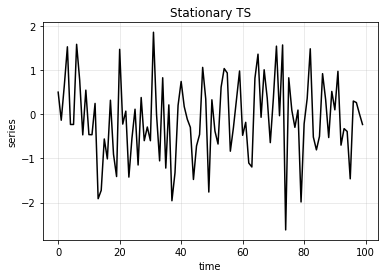

In [ ]:
run_sequence_plot(time, stationary, 
                  title="Stationary TS")

Great, now we can discuss the two types of smoothing. 

---

# Section 2: Common Smoothing Techniques
This may surprise you but there are many techniques for smoothing data. 

The ones we'll discuss in this tutorial are:
1. Simple Smoothing
2. Moving Average Smoothing
3. Exponential Smoothing

### 1. Simple Smoothing
Simple smoothing is the most obvious place to start. 

Consider the stationary data above. How would you go about extracting information from this series? 

Naturally, your inclination may be to calculate the mean and use that as an estimate to represent the series. 

Let's try that.

In [ ]:
# find mean of series
stationary_time_series_avg = np.mean(stationary)

# create array composed of mean value and equal to length of time array
sts_avg = np.full(shape=len(time), fill_value=stationary_time_series_avg, dtype='float')

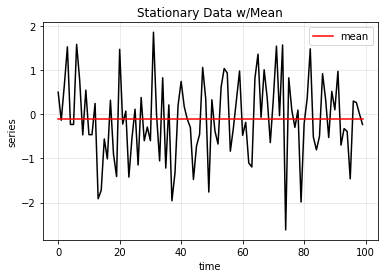

In [ ]:
run_sequence_plot(time, stationary,
                  title="Stationary Data w/Mean")
plt.plot(time, sts_avg, 'r', label="mean")
plt.legend()

We need a way to measure how far off our estimate is from reality. A common way to do this with continuous data is by calculating Mean Squared Error (MSE). 

The formula for MSE is:  $MSE = \frac{1}{n}\sum_{i=0}^{n} (observed_{i} - estimate_{i})^2$

Let's walk through a quick example to make sure you understand what's happening.

Say we an array of observed values [0, 1, 2, 3] and our estimate is the array [1, 1, 1, 1]. 

We calculate MSE like this: $(0-1)^{2} + (1-1)^{2} + (2-1)^{2} + (3-1)^{2}$ which is 6. 

Say we had another estimate [0, 0, 0, 0]. Let's calculate MSE once again.

The MSE is simply $0^{2} + 1^{2} + 2^{2} + 3^{2}$ which is 14. 

Having MSE gives us a way to compare different estimates to see which is best. In this case, the array of 1's is a far more accurate representation of the data than the array of 0's. We know this because the MSE is lower for the array of 1's. 

This idea of measuring how a model is performing crops up throughout machine learning and we will see its power later in this tutorial.

Now let's create a function to calculate MSE and discuss smoothing when a trend is present.

#### MSE Function
Let's create a Mean Squared Error function that we can use going forward.

In [ ]:
def mse(observations, estimates):
    '''
    INPUT:
        observations - numpy array of values indicating observed values
        estimates - numpy array of values indicating an estimate of values
    OUTPUT:
        Mean Square Error value
    '''
    # check arg types
    assert type(observations) == type(np.array([])), "'observations' must be a numpy array"
    assert type(estimates) == type(np.array([])), "'estimates' must be a numpy array"
    # check length of arrays equal
    assert len(observations) == len(estimates), "Arrays must be of equal length"
    
    # calculations
    difference = observations - estimates
    sq_diff = difference ** 2
    mse = sum(sq_diff)
    
    return mse

Let's test the **mse** function.

In [ ]:
zeros = mse(np.array([0, 1, 2, 3]), np.array([0, 0, 0, 0]))
print(zeros)

14


In [ ]:
ones = mse(np.array([0, 1, 2, 3]), np.array([1, 1, 1, 1]))
print(ones)

6


#### Trend

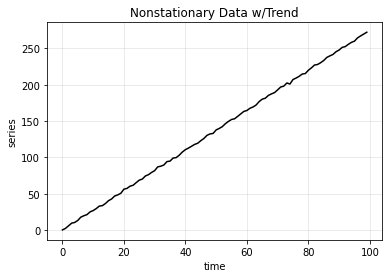

In [ ]:
trend = (time * 2.75) + stationary
run_sequence_plot(time, trend,
                  title="Nonstationary Data w/Trend")

It's clear in the plot above that there is an upward trend. Suppose we take the mean of the series again. 

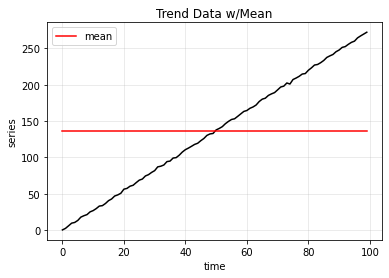

In [ ]:
# find mean of series
trend_time_series_avg = np.mean(trend)

# create array of mean value equal to length of time array
trend_avg = np.full(shape=len(time), fill_value=trend_time_series_avg, dtype='float')

run_sequence_plot(time, trend,
                  title="Trend Data w/Mean")
plt.plot(time, trend_avg, 'r', label="mean")
plt.legend()

**Question:** Do you think this would be a good way to extract information if a trend is present?

**Answer:** No, the plot clearly shows this is problematic.

Therefore, we must find another way to approximate the underlying pattern inherent in the data. There are many ways to capture that trend but let's keep things simple and build up. Let's start with something called a moving average.

### 2. Moving Average Smoothing

The easiest way to understand moving average is by example. 

Say we have the values [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]. 

The first step is to select a window size. We'll choose a size of three arbitrarily. So what happens is we compute the average for the first three values and store the result. We then slide the window over one spot and calculate the average of the next three values. We continue this process until we reach the final observed value. 

Therefore, the window begins with the values [0, 1, 2]. The mean of that sequence is 1 so we store that value [1]. We slide the window over one place to [1, 2, 3] and compute the mean which is 2. We add that value to storage so we have [1, 2]. We continue this process until we reach the last window of size three [7, 8, 9]. We conclude by calculating the mean and storing the result. The result is an array of smoothed values: [1, 2, 3, 4, 5, 6, 7, 8]. 

Here's the cool part. Let's compare MSE for the two possibilities we've discussed thus far. 

In [ ]:
# generate data for arrays discussed above
dummy_data = np.arange(10)
dummy_avg = np.mean(dummy_data)
dummy_avg_array = np.full(shape=len(dummy_data), fill_value=dummy_avg, dtype='float')

# calc MSE's
dummy_simple_average_mse = mse(dummy_data, dummy_avg_array)
dummy_smoothed_average_mse = mse(dummy_data[1:-1], np.arange(1, 9))

# print results
print("MSE")
print("-" * 12)
print("Simple: ", dummy_simple_average_mse)
print("Smoothed: ", dummy_smoothed_average_mse)

MSE
------------
Simple:  82.5
Smoothed:  0


Here we start to see the power of smoothing. A simple average of the trend data resulted in an abysmal MSE of 82.5 whereas a smoothed version of this contrived example produced a perfect estimation (MSE of 0). 
> An MSE of 0 is nearly always impossible unless you have toy data like this.

Let's create a moving average function to make this process easier moving forward.
> The guts of this function were taken from [this](https://stackoverflow.com/questions/14313510/how-to-calculate-moving-average-using-numpy#14314054) stackoverflow.

In [ ]:
def moving_average(observations, window=3, forecast=False):
    '''returns the smoothed version of an array of observations.'''
    cumulative_sum = np.cumsum(observations, dtype=float)
    cumulative_sum[window:] = cumulative_sum[window:] - cumulative_sum[:-window]
    if forecast:
        return np.insert(cumulative_sum[window - 1:] / window, 0, np.zeros(3))
    else:
        return cumulative_sum[window - 1:] / window

Great, now let's calculate the moving average of the trend data.

In [ ]:
smoothed_trend = moving_average(trend, window=3, forecast=False)

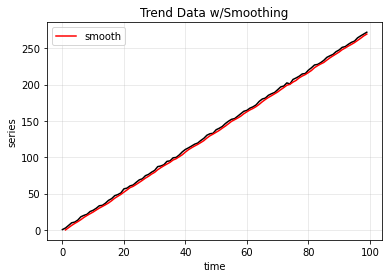

In [ ]:
run_sequence_plot(time, trend,
                  title="Trend Data w/Smoothing")
plt.plot(time[1:], np.insert(smoothed_trend,0,0), 'r', label="smooth")
plt.legend();

Not bad at all! You can see the smoothed version picks up the trend rather nicely, far better than the simple average. Now we're getting somewhere.

Let's try the same thing with seasonality.

In [ ]:
seasonality = 10 + np.sin(time) * 10
smoothed_seasonality = moving_average(seasonality, window=3, forecast=False)

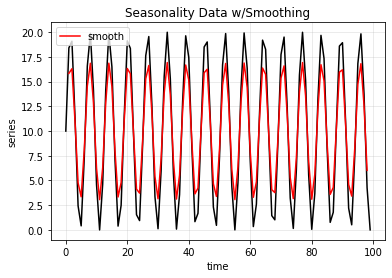

In [ ]:
run_sequence_plot(time, seasonality,
                  title="Seasonality Data w/Smoothing")
plt.plot(time[1:-1], smoothed_seasonality, 'r', label="smooth")
plt.legend(loc='upper left');

It's far from perfect but clearly picks up the inherent pattern contained within this seasonal pattern.

Lastly, let's see how moving average handles trend, seasonality, and a bit of noise.

In [ ]:
trend_seasonality = trend + seasonality + stationary
smoothed_trend_seasonality = moving_average(trend_seasonality, window=3, forecast=False)

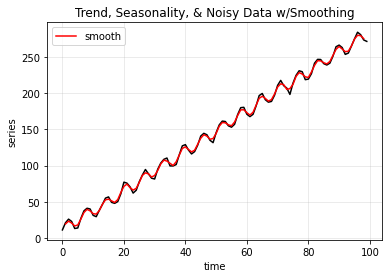

In [ ]:
run_sequence_plot(time, trend_seasonality,
                  title="Trend, Seasonality, & Noisy Data w/Smoothing")
plt.plot(time[1:-1], smoothed_trend_seasonality, 'r', label="smooth")
plt.legend(loc='upper left');

Overall this method is doing a decent job on these toy datasets. You can see it's picking up key patterns in the data. However, we've been weighting all observations equally. If you think about time series data, though, you may quickly realize that the most recent observations tend to impact the current to a larger degree than older ones. 

This leads us to another averaging strategy: exponential smoothing.

### 3. Exponential Smoothing
Exponential smoothing is a way to weight observations differently. Specifically, recent observations are weighted moreso than more distant ones. This makes intuitive sense. Think back to the stock market example that we discussed in past lessons. In general, it has been observed that today's price is a good predictor for tomorrow's price. Using an equally weighted smoothing process like the one introduced earlier would dilute that. However, by applying unequal weights to past observations, we can control how much each affects the future forecast. 

Let's make this concrete with an example. 

Say we have the values [1, 2, 4, 16, 256]. 

Instead of pulling out the inherent pattern within a series, let's use these smoothing functions to create forecasts. In other words, we'll apply the smoothing process and use the resulting value as the next data point.

With an equally weighted moving average discussed earlier we'd get a smoothed result that looks like this:

In [ ]:
values = np.array([1, 2, 4, 8, 16, 32, 64])
ma_smoothed_vals = moving_average(values, window=3, forecast=True)

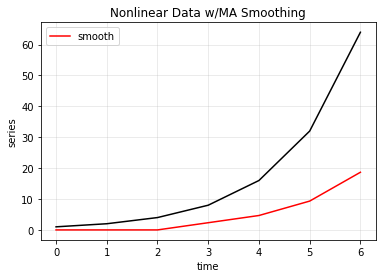

In [ ]:
t = np.arange(len(values))
run_sequence_plot(t, values,
                  title="Nonlinear Data w/MA Smoothing")
plt.plot(t, ma_smoothed_vals[:-1], 'r', label="smooth")
plt.legend(loc='upper left');

Now let's weight recent values more aggressively than older values. 

We'll use a simple exponential weighting whereby $w_{1} + w_{2}^2 + w_{3}^3 = 1$. 

This means $w_{1}$ is ~0.543, $w_{2}$ is ~0.294, and $w_{3}$ is ~0.160.

In [ ]:
def ewma(observations, forecast=True):
    '''returns the exponentially weighted smoothed version of an array of observations.'''
    weights = np.array([0.160, 0.294, 0.543])
    output = np.zeros_like(observations, dtype='float')
    for i, _ in enumerate(observations):
        if (i == 0) or (i == 1) or (i == len(observations) - 1):
            pass
        else:
            output[i] = np.dot(observations[i-2:i+1], weights)
    if forecast:
        return np.insert(output, 0, 0)
    else:
        return output

In [ ]:
ewma_smoothed_vals = ewma(values, forecast=True)

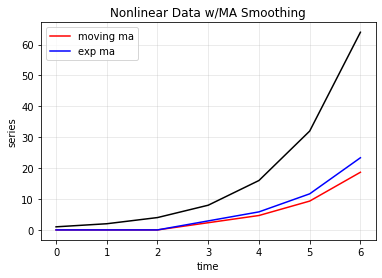

In [ ]:
run_sequence_plot(t, values,
                  title="Nonlinear Data w/MA Smoothing")
plt.plot(t, ma_smoothed_vals[:-1], 'r', label="moving ma")
plt.plot(t, ewma_smoothed_vals[:-1], 'b', label="exp ma")
plt.legend(loc='upper left');

You can see both moving average techniques have trouble keeping pace with such an aggressive trend. There's significant lag. This gives us a glimpse into why using moving average techniques alone to detect and forecast trend can be problematic. One thing that is clear, however, is that the exponential weighting does a better job following the trend. 

#### Setting Weights
I chose the weights above for explanatory purposes but there are numerous methods to find the optimal weighting scheme. A full discussion is far beyond the scope of this tutorial. Nonetheless, it is helpful that you be acclimated to the formulation and possible initialization strategies.

The formulation is this: $S_{t} = \alpha*y_{t-1} + \alpha(1-\alpha)S_{t-1} + \alpha(1-\alpha)^2S_{t-1} +$ ...

$S_{t}$ is the smoothed value at time *t*  
$\alpha$ is a smoothing constant  
$y_{t-1}$ is the value of the series at time *t-1*

#### Initialization
There are many initialization strategies. A simple one is to set $S_2$ equal to $y_1$. Another strategy is to find the mean of the first couple of observations. Once you've initialized, you simply use the update rule above to calculate all values. 

Thankfully, you'll never have to actually go through this arduous process. There are great methods in **statsmodels** that will do all this heavy lifting for you. 

#### Setting Alpha
One last comment: choosing the optimal value for $\alpha$ is also taken care of for you by **statsmodels**. A solver uses a metric like MSE to find an $\alpha$ that minimizes that metric. Therefore, you rarely have to choose this value yourself, but at least you have a basic idea as to what's happening under the hood.

#### Three Types of Exponential Smoothing

There are three key exponential smoothing techniques you need to be aware of:
1. Single Exponential Smoothing - no trend or seasonality
2. Double Exponential Smoothing - captures trend
3. Triple Exponential Smoothing - captures trend & seasonality

#### Single Exponential
This method is useful if your data lacks trend and seasonality and you want to approximately track patterns in your data. Furthermore, this method removes the lag associated with the moving average techniques discussed above. 

#### Double Exponential 
Should your data exhibit a trend, you'll want to use this smoothing method. It has all the benefits of Single Exponential with the ability to pickup on trend. 

#### Triple Exponential
Should your data exhibit trend and seasonality, you'll want to use this smoothing method. It has all the benefits of Double Exponential with the ability to pickup on seasonality. 

---

# Section 3: Smoothed Time Series in Python
We now have the foundation behind us to tackle smoothing in Python. As we've done in the past, we'll leverage statsmodels to do the heavy lifting for us behind the scenes. Therefore, this section is primarily application based. 

We'll use the same trend and seasonality dataset throughout to compare simple average, single, double, and triple exponential smoothing. 

We'll holdout the last 5 samples from the dataset so we can see how each model makes predictions. We'll then compare those to actuals.

#### Train/Test Split

In [ ]:
train = trend_seasonality[:-5]
test = trend_seasonality[-5:]

#### Simple Average

In [ ]:
# find mean of series
trend_seasonal_avg = np.mean(trend_seasonality)

# create array of mean value equal to length of time array
simple_avg_preds = np.full(shape=len(test), fill_value=trend_seasonal_avg, dtype='float')

# mse
simple_mse = mse(test, simple_avg_preds)

# results
print("Predictions: ", simple_avg_preds)
print("MSE: ", simple_mse)

Predictions:  [145.95522643 145.95522643 145.95522643 145.95522643 145.95522643]
MSE:  86295.31932923789


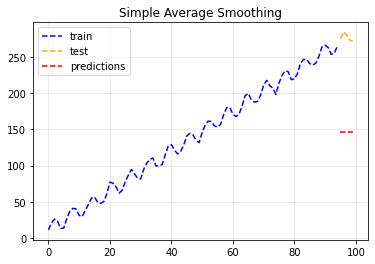

In [ ]:
plt.plot(time[:-5], train, 'b--', label="train")
plt.plot(time[-5:], test, color='orange', linestyle="--", label="test")
plt.plot(time[-5:], simple_avg_preds, 'r--', label="predictions")
plt.legend(loc='upper left')
plt.title("Simple Average Smoothing")
plt.grid(alpha=0.3);

**Details:** This is a crude model to say the least, but it's a great model to use as a baseline. In other words, any model you produce moving forward should do much better than this one. 

#### Single Exponential

In [ ]:
from statsmodels.tsa.api import SimpleExpSmoothing

single = SimpleExpSmoothing(train).fit(optimized=True)
single_preds = single.forecast(len(test))
single_mse = mse(test, single_preds)
print("Predictions: ", single_preds)
print("MSE: ", single_mse)

Predictions:  [265.2632637 265.2632637 265.2632637 265.2632637 265.2632637]
MSE:  830.001033618639


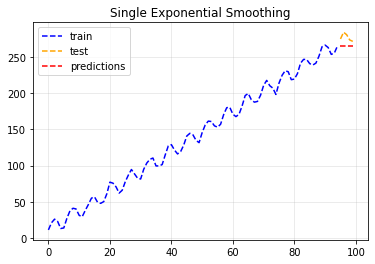

In [ ]:
plt.plot(time[:-5], train, 'b--', label="train")
plt.plot(time[-5:], test, color='orange', linestyle="--", label="test")
plt.plot(time[-5:], single_preds, 'r--', label="predictions")
plt.legend(loc='upper left')
plt.title("Single Exponential Smoothing")
plt.grid(alpha=0.3);

**Details:** This is certainly better than the simple average method but it's still pretty crude. Notice how the forecast is a horizontal line. Single Exponential Smoothing cannot pickup on trend or seasonality, which harkens back to mean we calculated for the stationary data way back at the beginning.

#### Double Exponential

In [ ]:
from statsmodels.tsa.api import Holt

double = Holt(train).fit(optimized=True)
double_preds = double.forecast(len(test))
double_mse = mse(test, double_preds)
print("Predictions: ", double_preds)
print("MSE: ", double_mse)

Predictions:  [267.96956226 270.67586099 273.38215972 276.08845846 278.79475719]
MSE:  354.26816763487784


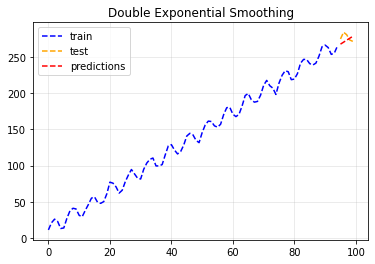

In [ ]:
plt.plot(time[:-5], train, 'b--', label="train")
plt.plot(time[-5:], test, color='orange', linestyle="--", label="test")
plt.plot(time[-5:], double_preds, 'r--', label="predictions")
plt.legend(loc='upper left')
plt.title("Double Exponential Smoothing")
plt.grid(alpha=0.3);

**Details:** Double Exponential Smoothing can pickup on trend, which is exactly what we see here. This is a significant leap but no quite where we need to be.

#### Triple Exponential

In [ ]:
from statsmodels.tsa.api import ExponentialSmoothing

triple = ExponentialSmoothing(train,
                              trend="additive",
                              seasonal="additive",
                              seasonal_periods=13).fit(optimized=True)
triple_preds = triple.forecast(len(test))
triple_mse = mse(test, triple_preds)
print("Predictions: ", triple_preds)
print("MSE: ", triple_mse)

Predictions:  [277.27547282 282.58450108 282.402313   276.6731268  274.78361691]
MSE:  27.03289010770614


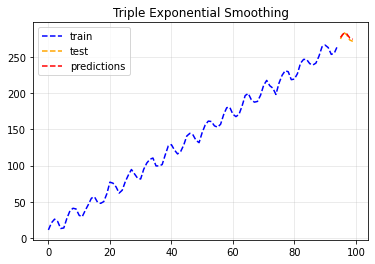

In [ ]:
plt.plot(time[:-5], train, 'b--', label="train")
plt.plot(time[-5:], test, color='orange', linestyle="--", label="test")
plt.plot(time[-5:], triple_preds, 'r--', label="predictions")
plt.legend(loc='upper left')
plt.title("Triple Exponential Smoothing")
plt.grid(alpha=0.3);

**Details:** Triple Exponential Smoothing pickups trend and seasonality. This is clear in the plot above. This approach makes the most sense for this data.

#### Comparison

In [ ]:
data_dict = {'MSE':[simple_mse, single_mse, double_mse, triple_mse]}
df = pd.DataFrame(data_dict, index=['simple', 'single', 'double', 'triple'])
print(df)

            MSE
simple 86,295.3
single    830.0
double    354.3
triple     27.0


---

### Exercise #3
You have been provided two datasets: 
1. **smooth_1.npy**
2. **smooth_2.npy**

Your task is to leverage what you've learned in this and previous courses. 

More specifically, you will do the following:
1. Read in **smooth_1.npy** and **smooth_2.npy**.
2. Create a time variable called **mytime** that starts at 0 and is as long as each dataset.
3. Split each dataset into train and test sets (test set is last 5 observations).
4. Identify trend and seasonality, if present.
5. Identify if trend and/or seasonality are additive or multiplicative, if present.
6. Create smoothed model on the train set and use to forecast on the test set.
7. Calculate MSE on test data.
8. Plot training data, test data, and your model's forecast for each dataset.

#### 1. Get Data

In [ ]:
# get data
smooth_1 = np.load("smooth_1.npy")
smooth_2 = np.load("smooth_2.npy")

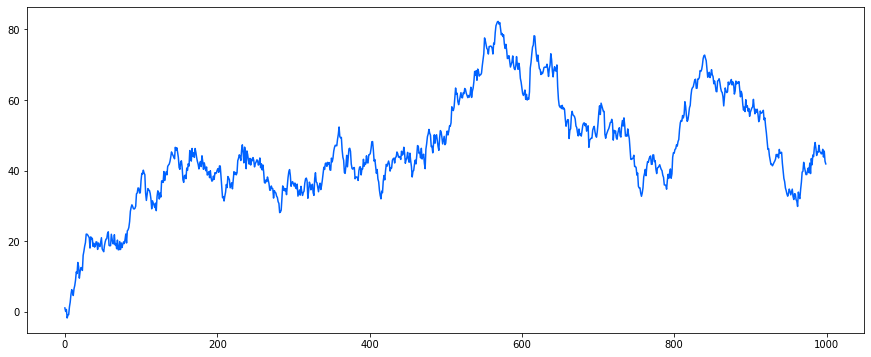

In [ ]:
plt.figure(figsize=(15,6))
plt.plot(smooth_2)

#### 2. Create mytime 

In [ ]:
# time component
mytime = np.arange(len(smooth_1))

#### 3. Train/Test Split

In [ ]:
test_size = 100
# train sets
train_1 = smooth_1[:-test_size]
train_2 = smooth_2[:-test_size]

# test sets
test_1 = smooth_1[-test_size:]
test_2 = smooth_2[-test_size:]

#### 4. ID Trend / Seasonality

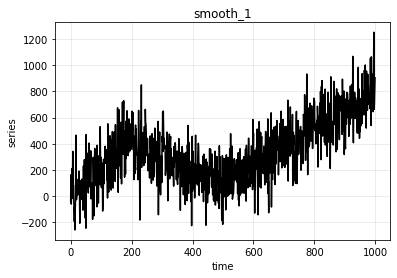

In [ ]:
run_sequence_plot(mytime, smooth_1, title="smooth_1")

**smooth_1** has three trend components as seen above. There is no seasonality present.

Text(0.5, 1.0, 'smooth_2')

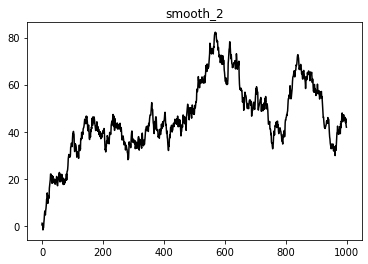

In [ ]:
plt.plot(smooth_2,'k')
plt.title("smooth_2")

**smooth_2** is indicative of autocorrelation. There is no clear seasonality.

#### 5. ID Additive vs Multicplicative

We can tell from the run-sequence plots above that **smooth_1** and **smooth_2** are both additive time series. If you're not sure why, please review the lesson on additive vs multiplicative time series.

#### 6. Create Smoothed Models

In [ ]:
from statsmodels.tsa.api import ExponentialSmoothing

model_1 = ExponentialSmoothing(train_1,damped=True,
                              trend="additive",
                              seasonal=None,
                              seasonal_periods=None).fit(optimized=True)

model_2 = ExponentialSmoothing(train_2,
                              trend=None,
                              seasonal=None,
                              seasonal_periods=None).fit(optimized=True)

preds_1 = model_1.forecast(len(test_2))
preds_2 = model_2.forecast(len(test_2))

#### 7. Calculate MSE

In [ ]:
((test_1-preds_1)**2).sum()/len(test_1)

29606.42608880499

In [ ]:
mse_1 = mse(test_1, preds_1)
mse_2 = mse(test_2, preds_2)
print("MSE for smooth_1: {:.7}".format(mse_1))
print("MSE for smooth_2: {:.7}".format(mse_2))

MSE for smooth_1: 2.960643e+06
MSE for smooth_2: 19678.39


In [ ]:
mse_1 = mse(test_1, preds_1)
mse_2 = mse(test_2, preds_2)
print("MSE for smooth_1: {:.7}".format(mse_1))
print("MSE for smooth_2: {:.7}".format(mse_2))

MSE for smooth_1: 2.960643e+06
MSE for smooth_2: 19678.39


#### 8. Plot Train, Test, Forecast

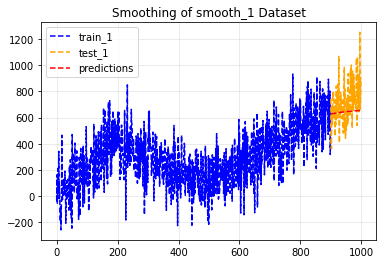

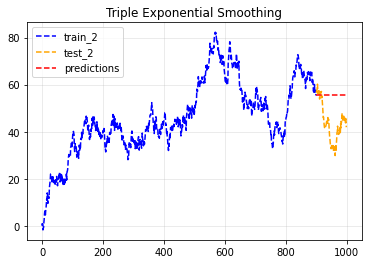

In [ ]:
plt.plot(mytime[:-test_size], train_1, 'b--', label="train_1")
plt.plot(mytime[-test_size:], test_1, color='orange', linestyle="--", label="test_1")
plt.plot(mytime[-test_size:], preds_1, 'r--', label="predictions")
plt.legend(loc='upper left')
plt.title("Smoothing of smooth_1 Dataset")
plt.grid(alpha=0.3);

plt.show()

plt.plot(mytime[:-test_size], train_2, 'b--', label="train_2")
plt.plot(mytime[-test_size:], test_2, color='orange', linestyle="--", label="test_2")
plt.plot(mytime[-test_size:], preds_2, 'r--', label="predictions")
plt.legend(loc='upper left')
plt.title("Triple Exponential Smoothing")
plt.grid(alpha=0.3);

---

# Summary

In this assignment you should have learned: 
1. What smoothing is and why it is necessary.
2. Several common smoothing techniques.
3. A basic understanding of how to smooth time series data with Python and generate forecasts.

---

### ARMA Models (Autoregressive Models and Moving Average Models)

<img src = "Autoregressive Models and Moving Average Models.jpg">
<img src = "Autoregressive Models and Moving Average Models1.jpg">
<img src = "Autoregressive Models and Moving Average Models2.jpg">
<img src = "Autoregressive Models and Moving Average Models3.jpg">
<img src = "Autoregressive Models and Moving Average Models4.jpg">
<img src = "Autoregressive Models and Moving Average Models5.jpg">
<img src = "Autoregressive Models and Moving Average Models6.jpg">
<img src = "Autoregressive Models and Moving Average Models7.jpg">
<img src = "Autoregressive Models and Moving Average Models8.jpg">
<img src = "Autoregressive Models and Moving Average Models9.jpg">
<img src = "Autoregressive Models and Moving Average Models10.jpg">
<img src = "Autoregressive Models and Moving Average Models11.jpg">
<img src = "Autoregressive Models and Moving Average Models12.jpg">
<img src = "Autoregressive Models and Moving Average Models13.jpg">
<img src = "Autoregressive Models and Moving Average Models14.jpg">
<img src = "Autoregressive Models and Moving Average Models15.jpg">
<img src = "Autoregressive Models and Moving Average Models16.jpg">

# Machine Learning Foundation

## Course 6, Part e: ARMA DEMO

# Introduction

In the previous three lessons, you learned several fundamental time series concepts like stationarity and smoothing. Now we'll build upon that knowledge by digging into yet another important concept called **autocorrelation**.

# Learning Outcomes
You should walk away from this tutorial with:
1. A practical understanding of Autoregressive (AR) models.
1. A practical understanding of Moving Average (MA) models.
1. A basic understanding of the Autocorrelation Function (ACF).
1. A basic understanding of the Partial Autocorrelation Function (PACF).
1. Insight into choosing the order *q* of MA models.
1. Insight into choosing the order *p* of AR models.

# Imports

In [ ]:
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

One of the key concepts in the quantitative toolbox is that of mean reversion. This process refers to a time series that displays a tendency to revert to its historical mean value. Mathematically, such a (continuous) time series is referred to as an Ornstein-Uhlenbeck process. 

This is in contrast to a random walk (aka Brownian motion), which has no "memory" of where it has been at each particular instance of time. 

The mean-reverting property of a time series can be exploited in order to produce better predictions.

A continuous mean-reverting time series can be represented by an Ornstein-Uhlenbeck stochastic differential equation:

$dx_{t} = θ(μ−x_{t})dt + σdW_{t}$
 
Where: 
- θ is the rate of reversion to the mean, 
- μ is the mean value of the process, 
- σ is the variance of the process and 
- $W_{t}$ is a Wiener Process or Brownian Motion.

In a discrete setting the equation states that the change of the price series in the next time period is proportional to the difference between the mean price and the current price, with the addition of Gaussian noise.

https://www.quantstart.com/articles/Basics-of-Statistical-Mean-Reversion-Testing

## Section 2: ARMA

Enter [Autoregressive Integrated Moving Average (ARIMA)](https://en.wikipedia.org/wiki/Autoregressive_integrated_moving_average) modeling. When we have autocorrelation between outcomes and their ancestors, we will see a theme, or relationship in the outcome plot. This relationship can be modeled in its own way, allowing us to predict the future with a confidence level commensurate to the strength of the relationship and the proximity to known values (prediction weakens the further out we go).

- [ARIMA in R](https://www.otexts.org/fpp/8/5)
- [Duke ARIMA Guide](https://people.duke.edu/~rnau/411arim2.htm)
- [Great explanation on MA in practice](http://stats.stackexchange.com/questions/164824/moving-average-ma-process-numerical-intuition)


For second-order stationary (both mean and variance: $\mu_t = \mu$ and $\sigma_t^2 = \sigma^2$ for all $t$) data, autocovariance is expressed as a function only of the time lag $k$:

$$ \gamma_k = E[(x_t-\mu)(x_{t+k} - \mu)] $$
  
Therefore, the autocorrelation function is defined as:

$$ \rho_k = \frac{\gamma_k}{\sigma^2} $$
  
We use the plot of these values at different lags to determine optimal ARIMA parameters. Notice how `phi` changes the process.

![](https://upload.wikimedia.org/wikipedia/commons/thumb/c/ce/ArTimeSeries.svg/685px-ArTimeSeries.svg.png)
By Tomaschwutz - Own work, CC BY 3.0, https://commons.wikimedia.org/w/index.php?curid=14740378



## Section 3: Autoregressive (AR) Models

**Autocorrelation:** a variable's correlation with itself at different lags.

AR models regress on actual past values 

This is the first order or **AR(1)** formula you should know: $y_t = \beta_0 + \beta_1y_{t-1}+\epsilon_t$

The $\beta$'s are just like those in linear regression and $\epsilon$ is irreducible error.

A second order or **AR(2)** would look like this: $y_t = \beta_0 + \beta_1y_{t-1}+\beta_2y_{t-2}+\epsilon_t$

The pattern of adding another coefficient and another past term continues to whichever order you choose. Choosing that order called *p* is something we will discuss shortly.

In the meantime, let's walk through a basic autocorrelation example. We'll generate our own data to gain insight into how ar models work

In [ ]:
# reproducibility
np.random.seed(123)

# create autocorrelated data
time = np.arange(100)
#Assuming 0 mean
ar1_sample = np.zeros(100)

# Set our first number to a random value with expected mean of 0 and standard deviation of 2.5
ar1_sample[0] += np.random.normal(loc=0, scale=2.5, size=1)

# Set every value thereafter as 0.7 * the last term plus a random error
for t in time[1:]:
    ar1_sample[t] = (0.7 * ar1_sample[t-1]) + np.random.normal(loc=0, scale=2.5, size=1)

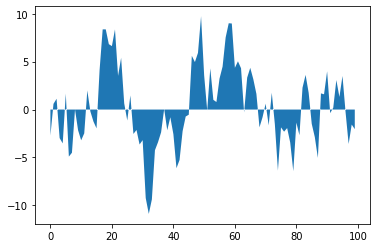

In [ ]:
plt.fill_between(time,ar1_sample)

Here we create prediction for generated data to show we came up with a model that is approximately ar(1) with phi $\approx$ 0.7

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
# using ARMA model from statsmodel package
model = ARIMA(endog=ar1_sample, order=(1, 0, 0), trend='n').fit()
model.arparams

array([0.73389689])

In [ ]:
# create autocorrelated data
np.random.seed(112)
# Mean is again 0
ar2_sample = np.zeros(100)
# Set first two values to random values with expected mean of 0 and standard deviation of 2.5
ar2_sample[0:2] += np.random.normal(loc=0, scale=2.5, size=2)
# Set future values as 0.3 times the prior value and 0.3 times value two prior
for t in time[2:]:
    ar2_sample[t] = (0.3 * ar2_sample[t-1]) + (0.3 * ar2_sample[t-2]) + np.random.normal(loc=0, scale=2.5, size=1)

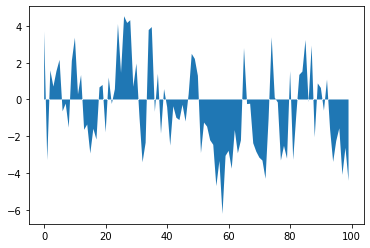

In [ ]:
plt.fill_between(time,ar2_sample)

In [ ]:
# Again running statsmodel ARMA to predict parameters for generated data
model = ARIMA(endog=ar2_sample, order=(2, 0, 0), trend = "n").fit()
model.arparams

array([0.36737636, 0.24454356])

In [ ]:
# Below is function to help in generating different series
from statsmodels.tsa.arima_process import arma_generate_sample

arparams = np.array([0.3,0.3])
maparams = np.array([0])
ar = np.r_[1, -arparams] # add zero-lag and negate, np.r_ is simply making it one array
ma = np.r_[1, maparams] # add zero-lag
y = arma_generate_sample(ar, ma, 100)

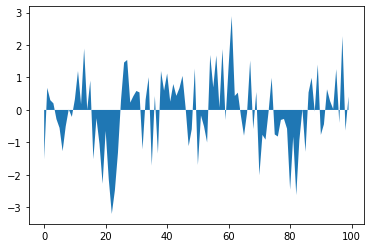

In [ ]:
plt.fill_between(time,y)

In [ ]:
# Again running statsmodel ARMA to predict parameters for generated data
model = ARIMA(endog=y, order=(2, 0, 0), trend='n').fit()
model.arparams

array([0.17220191, 0.31820834])

Notice that outcomes of same model can be very different given random nature of model and fact that this is emant to predict mean reversion

## Section 4: Moving Average(MA) models


### MA Model Specifics
A MA model is defined by this equation: $y_t=c+e_t+θ_1e_{t−1}+θ_2e_{t−2}+⋯+θ_qe_{t−q}$ where $e_t$ is white noise. The value $c$ is a constant value and the $\theta$'s are coefficients, not unlike those found in linear regression.

### MA Models != Moving Average Smoothing
An important distinction is that a moving average model is not the same thing as moving average smoothing. What we did in previous lessons was smoothing. It has important properties already discussed. However, we turn our attention to moving average models, which are a completely different beast.

Moving average smoothing is useful for estimating trend and seasonality of past data. MA models, on the other hand, are a useful forecasting model that regresses on past forecast errors in order to forecast future values. It is easy to lump the two techniques together, but they serve very different functions. 
Thus, a moving-average model is conceptually a linear regression of the current value of the series against current and previous (unobserved) white noise error terms or random shocks. The random shocks at each point are assumed to be mutually independent and to come from the same distribution, typically a normal distribution, with location at zero and constant scale.

### Interpretation
The moving-average model is essentially a finite impulse response filter applied to white noise, with some additional interpretation placed on it. 

The role of the random shocks in the MA model differs from their role in the autoregressive (AR) model in two ways.
- First, they are propagated to future values of the time series directly: for example, 
$\varepsilon _{t-1}$ appears directly on the right side of the equation for $X_{t}$. In contrast, in an AR model $\varepsilon _{t-1}$ does not appear on the right side of the $X_{t}$ equation, but it does appear on the right side of the $X_{t-1}$ equation, and $X_{t-1}$ appears on the right side of the $X_{t}$ equation, giving only an indirect effect of $\varepsilon _{t-1}$ on $X_{t}$. 
- Second, in the MA model a shock affects X values only for the current period and q periods into the future; in contrast, in the AR model a shock affects X values infinitely far into the future, because $\varepsilon _{t}$ affects $X_{t}$, which affects $X_{t+1}$, etc.

https://en.wikipedia.org/wiki/Moving-average_model

We'll generate our own data so we know the generative process for an MA series. 

In [ ]:
# reproducibility
np.random.seed(12)

# create autocorrelated data
time = np.arange(100)
#mean 0
ma1_sample = np.zeros(100)
#create vector of random normally distributed errors
error = np.random.normal(loc=0, scale=2.5, size=100)
# set first value to one of the random errors
ma1_sample[0] += error[0]

#set future values to 0.4 times error of prior value plus the current error term
for t in time[1:]:
    ma1_sample[t] = (0.4 * error[t-1]) + error[t]

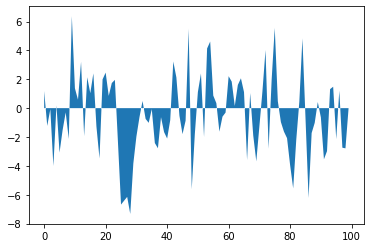

In [ ]:
plt.fill_between(time,ma1_sample)

In [ ]:
# find model params for generated sample 
model = ARIMA(endog=ma1_sample, order=(0, 1, 0), trend='n').fit()
model.arparams

array([], dtype=float64)

In [ ]:
# reproducibility
np.random.seed(123)

# create autocorrelated data
time = np.arange(100)
ma2_sample = np.zeros(100)
error = np.random.normal(loc=0, scale=2.5, size=100)
ma2_sample[0:2] = error[0:2]
#regress future values on linear functino of prior two errors plus current error
for t in time[2:]:
    ma2_sample[t] = (0.4 * error[t-1]) + (-0.4 * error[t-2]) + error[t]

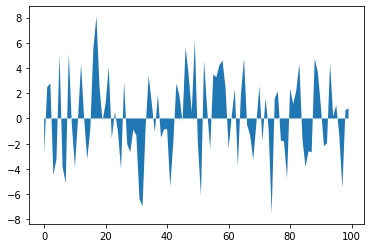

In [ ]:
plt.fill_between(time,ma2_sample)

In [ ]:
# find model params for generated sample 
model = ARIMA(endog=ma2_sample, order=(0, 2, 0), trend='n').fit()
model.arparams

array([], dtype=float64)

In [ ]:
# Below is function to help in generating different series
np.random.seed(123)
arparams = np.array([0])
maparams = np.array([0.4,-0.4])
ar = np.r_[1, -arparams] # add zero-lag and negate, np.r_ is simply making it one array
ma = np.r_[1, maparams] # add zero-lag
y = arma_generate_sample(ar, ma, 100)

In [ ]:
# Just to show we came up with a model that is approximately ar(1) with phi = 0.7
# We will get back to modeling

model = ARIMA(endog=y, order=(0, 2, 0), trend='n').fit()
model.arparams

array([], dtype=float64)

Some things to note:
1. AR models propagate shocks infinitely
1. If a process depends on previous values of itself then it is an AR process. If it depends on previous errors than it is an MA process.
1. AR processes will exhibit exponential decay in ACF and a cut-off in PACF

### Moving Average Models (This is NOT a Simple/Weighted/Exponential Moving Average)

Some things to note:
1. MA models do not propagate shocks infinitely; they die after `q` lags
1. If a process depends on previous values of itself, then it is an AR process. If it depends on previous errors, then it is an MA process.
1. MA processes will exhibit exponential decay in PACF and a cut-off in ACF

## Section 5: The Autocorrelation Function (ACF)
There's a crucial question we need to answer: How do you choose the orders (p and q) for a time series

In order to answer that question, we need to understand the Autocorrelation Function (ACF). 

Let's start by showing an example ACF plot for our different simulated series.

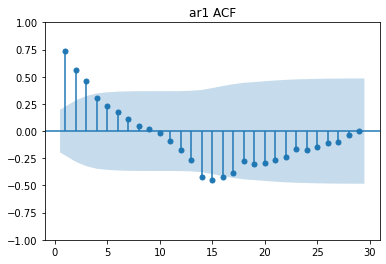

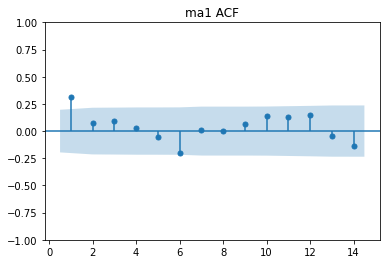

In [ ]:
fig = sm.tsa.graphics.plot_acf(ar1_sample, lags=range(1,30), alpha=0.05,title = 'ar1 ACF')
fig = sm.tsa.graphics.plot_acf(ma1_sample, lags=range(1,15), alpha=0.05,title = 'ma1 ACF')

An explanation is in order. First, the blue region represents a confidence interval. Alpha in this case was set to 0.05 (95% confidence interval). This can be set to whatever float value you require. See the **plot_acf** function for details. 

The stems represent lagged correlation values. In other words, a lag of 1 will show correlation with the prior endogenous value. A lag of 2 shows correlation to the value 2 prior and so on. Remember that we're regressing on past forecast values; that's the correlation we're inspecting here. 

Correlations outside of the confidence interval are statistically significant whereas the others are not. 

Note that if lag 1 shows strong autocorrelation, lag 2 will show strong autocorrelation as well since lag 1 is correlated with lag 2 and lag 2 with lag 3. That is why you see the ar1 model having the slowly decaying correlation.

If we think about the functions, we note that the autocorrelation will propogate for AR(1) models:

- $y_t = \beta_0 + \beta_1y_{t-1}+\epsilon_t$
- $y_{t-1} = \beta_0 + \beta_1y_{t-2}+\epsilon_{t-1}$
- $y_{t} = \beta_0 + \beta_0 + \beta_1y_{t-2}+\epsilon_{t-1} +\epsilon_{t}$

The past errors will propogate into the future leading to the slowly decaying plot we just mentioned

For MA(1) models: 

- $y_t = y_t=\beta_0+θ_1e_{t-1}+\epsilon_t$

Only the prior error has an effect on future errors.

So an easy way to identify an ar(1) models or ma(1) model is to look to see if the correlation from one effects the next.

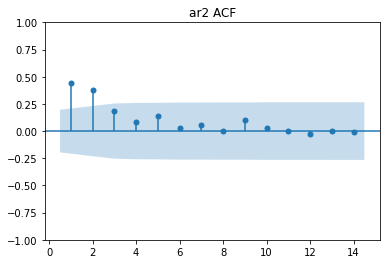

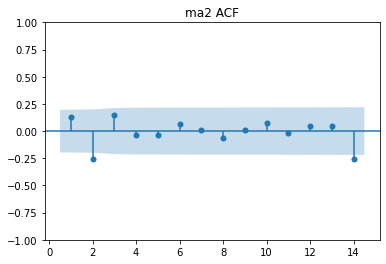

In [ ]:
fig = sm.tsa.graphics.plot_acf(ar2_sample, lags=range(1,15), alpha=0.05,title = 'ar2 ACF')
fig = sm.tsa.graphics.plot_acf(ma2_sample, lags=range(1,15), alpha=0.05,title = 'ma2 ACF')

Similar story should hold up for ACF for AR(2) and MA(2). Ideally, the ma(1) would be significant, but with simulated data it will not always be perfect


## Section 6: The Partial Autocorrelation Function (PACF)

Choosing the order *p* of the AR model is important. Thankfully, there's a useful plot called the Partial Autocorrelation Function plot that can help us with that task. 

Let's look at an example.

c:\Users\vijay\anaconda3\envs\data_science\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


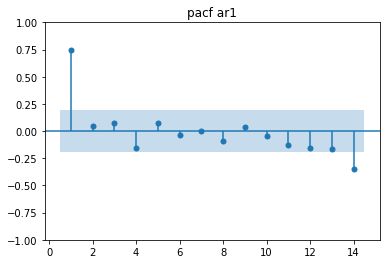

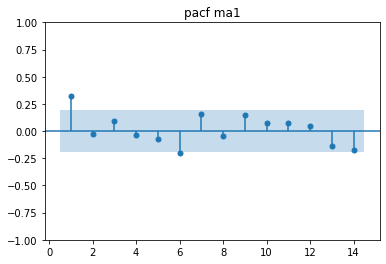

In [ ]:
from statsmodels.graphics.tsaplots import plot_pacf

fig = sm.tsa.graphics.plot_pacf(ar1_sample, lags=range(1,15), alpha=0.05, title = 'pacf ar1')
fig = sm.tsa.graphics.plot_pacf(ma1_sample, lags=range(1,15), alpha=0.05, title = 'pacf ma1')

The *partial autocorrelation* at lag k is the correlation that results after removing the effect of any correlations due to the terms at shorter lags. 

This makes choosing AR(1) models much easier.

First off, the blue region once again is the 95% confidence interval. 

The ACF is a way to measure the linear relationship between a current observation and observations at previous time periods. It turns out that often we are really only interested in the relationship between the current observation and a past value determined by a lag value. We often don't care about the relationship of values between the two, so we transform them to obtain the PACF. 

The PACF is a useful tool for identifying the order of the AR model.

For MA(1) model we should see that it slowly decays towards 0.

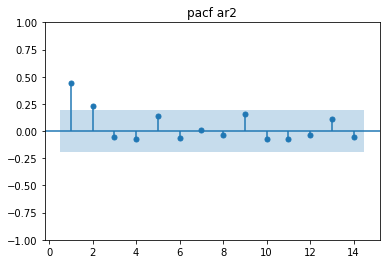

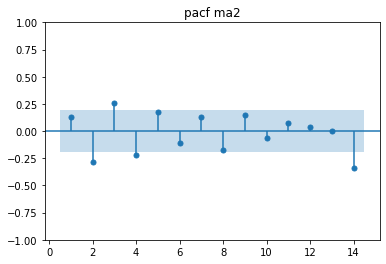

In [ ]:
fig = sm.tsa.graphics.plot_pacf(ar2_sample, lags=range(1,15), alpha=0.05, title = 'pacf ar2')
fig = sm.tsa.graphics.plot_pacf(ma2_sample, lags=range(1,15), alpha=0.05, title = 'pacf ma2')

Similar story should hold up for PACF for AR(2).


## Exercise
You have been provided two datasets: 
1. **auto_1.csv**
2. **auto_2.csv**

Your task is to leverage what you've learned in this and previous courses. 

More specifically, you will do the following:
1. Read in **auto_1.csv** and **auto_2.csv**.
2. Create a time variable called **mytime** that starts at 0 and is as long as both datasets.
3. Generate fill between plots of auto_1 and auto_2.
4. Determine the order of p and q.
5. Fit model given chosen p and q. Feel free to play with fit of other models

#### 1. Get Data

In [ ]:
# get data
auto_1 = pd.read_csv("auto_1.csv")
auto_2 = pd.read_csv("auto_2.csv")

#### 2. Create mytime 

In [ ]:
# time component
mytime = np.arange(len(auto_1))

In [ ]:
auto_1.values.shape

(100, 1)

In [ ]:
auto_1 = auto_1.values.reshape(-1)
auto_2 = auto_2.values.reshape(-1)

#### 3. Fill between plots

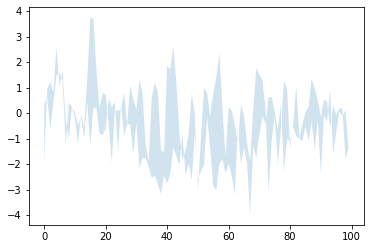

In [ ]:
plt.fill_between(mytime,auto_1,auto_2,alpha = 0.2)

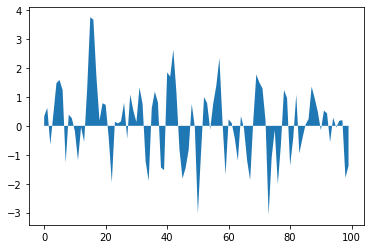

In [ ]:
plt.fill_between(mytime,auto_2)

#### 4. Determine Order (p & q) 

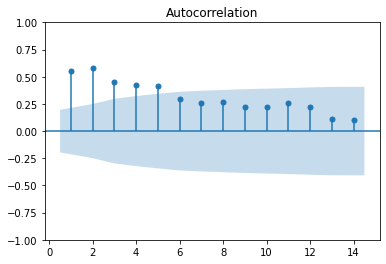

In [ ]:
fig1 = sm.tsa.graphics.plot_acf(auto_1, lags=range(1,15), alpha=0.05)

c:\Users\vijay\anaconda3\envs\data_science\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


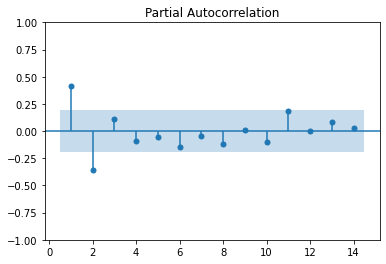

In [ ]:
fig2 = sm.tsa.graphics.plot_pacf(auto_2, lags=range(1,15), alpha=0.05)

For auto_1, order p is clearly 2.

For auto_2, looks like order of q is 1. 

#### 5. Estimate parameters of model with given choice of p and q

In [ ]:
model = ARIMA(endog=auto_1, order=(2, 0, 0), trend='n').fit()
model.arparams

array([0.37346212, 0.48047418])

In [ ]:
model = ARIMA(endog=auto_2, order=(0, 1, 0), trend='n').fit()
model.arparams

array([], dtype=float64)

---

# Summary

In this notebook, we have covered: 
1. Moving Average (MA) models.
2. The Autocorrelation Function (ACF).
3. Choosing order *q*.
4. Autoregressive (AR) models.
5. The Partial Autocorrelation Function (PACF).
6. Choosing order *p*. 

---

### ARIMA and SARIMA Models

### Deep Learning for Forecasting

<img src = "Deep Learning for Forecasting.jpg">
<img src = "Deep Learning for Forecasting1.jpg">
<img src = "Deep Learning for Forecasting2.jpg">
<img src = "Deep Learning for Forecasting3.jpg">
<img src = "Deep Learning for Forecasting4.jpg">
<img src = "Deep Learning for Forecasting5.jpg">
<img src = "Deep Learning for Forecasting6.jpg">
<img src = "Deep Learning for Forecasting7.jpg">
<img src = "Deep Learning for Forecasting8.jpg">
<img src = "Deep Learning for Forecasting9.jpg">
<img src = "Deep Learning for Forecasting10.jpg">
<img src = "Deep Learning for Forecasting11.jpg">
<img src = "Deep Learning for Forecasting12.jpg">
<img src = "Deep Learning for Forecasting13.jpg">
<img src = "Deep Learning for Forecasting14.jpg">
<img src = "Deep Learning for Forecasting15.jpg">
<img src = "Deep Learning for Forecasting16.jpg">
<img src = "Deep Learning for Forecasting17.jpg">
<img src = "Deep Learning for Forecasting18.jpg">
<img src = "Deep Learning for Forecasting19.jpg">
<img src = "Deep Learning for Forecasting20.jpg">
<img src = "Deep Learning for Forecasting21.jpg">

# Machine Learning Foundation

## Course 6, Part g: Time Series Deep Learning DEMO

# Introduction

In previous lessons, we've gone from learning the basic components of time series to employing advanced signal transformation techniques. As the culmination of these lessons, we'll now turn toward deep learning as a method for time series forecasting. We'll see how **recurrent neural networks** can automatically learn how to model series components like seasonality and autocorrelation without special preprocessing. In the process, we'll gain exposure to the python library **Keras**, which provides an excellent interface for constructing neural networks. 

# Learning Outcomes
You should walk away from this Python tutorial with:
1. A practical understanding of how to build and train a simple RNN or LSTM for time series forecasting, using keras.
2. Introductory experience in tuning RNN/LSTM parameters.

# Imports

In [1]:
import seaborn as sns
coloribm = {"Magenta 100":"2A0A16", "Magenta 90":"57002B", "Magenta 80":"760A3A", "Magenta 70":"A11950", "Magenta 60":"D12765", "Magenta 50":"EE538B", "Magenta 40":"FA75A6", "Magenta 30":"FFA0C2", "Magenta 20":"FFCFE1", "Magenta 10":"FFF0F6", "Purple 100":"1E1033", "Purple 90":"38146B", "Purple 80":"4F2196", "Purple 70":"6E32C9", "Purple 60":"8A3FFC", "Purple 50":"A66EFA", "Purple 40":"BB8EFF", "Purple 30":"D0B0FF", "Purple 20":"E6D6FF", "Purple 10":"F7F1FF", "Blue 100":"051243", "Blue 90":"061F80", "Blue 80":"0530AD", "Blue 70":"054ADA", "Blue 60":"0062FF", "Blue 50":"408BFC", "Blue 40":"6EA6FF", "Blue 30":"97C1FF", "Blue 20":"C9DEFF", "Blue 10":"EDF4FF", "Teal 100":"081A1C", "Teal 90":"003137", "Teal 80":"004548", "Teal 70":"006161", "Teal 60":"007D79", "Teal 50":"009C98", "Teal 40":"00BAB6", "Teal 30":"20D5D2", "Teal 20":"92EEEE", "Teal 10":"DBFBFB", "Gray 100":"171717", "Gray 90":"282828", "Gray 80":"3D3D3D", "Gray 70":"565656", "Gray 60":"6F6F6F", "Gray 50":"8C8C8C", "Gray 40":"A4A4A4", "Gray 30":"BEBEBE", "Gray 20":"DCDCDC", "Gray 10":"F3F3F3"} 
colors = []
colornum = 60
for i in [f'Blue {colornum}', f'Teal {colornum}', f'Magenta {colornum}', f'Purple {colornum}', f'Gray {colornum}']:
    colors.append(f'#{coloribm[i]}')
palette = sns.color_palette(colors)

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore')
import seaborn as sns
plt.style.use('fivethirtyeight')
sns.set_palette(palette)
import pandas as pd
from datetime import datetime
import tensorflow as tf
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, LSTM, Activation, Dropout
import math
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

# Section 1: Simple RNN

In this section, we will build a recurrent neural network and train it to forecast a single time series. We'll use a dataset provided by the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/PM2.5+Data+of+Five+Chinese+Cities) that measures hourly air quality in Chinese cities/city districts<sup>1</sup>.

1. Liang, X., S. Li, S. Zhang, H. Huang, and S. X. Chen (2016), PM2.5 data reliability, consistency, and air quality assessment in five Chinese cities, J. Geophys. Res. Atmos., 121, 10220â€“10236

#### Setting Up The Data

We'll start by working with Beijing data, and filter the dataset down to records from 2015. 

In [19]:
df_Beijing = pd.read_csv('Beijing.csv')
df_Beijing = df_Beijing[df_Beijing.year >= 2015]
df_Beijing.head(10)

No  year  month  day  hour  season  PM_Dongsi  PM_Dongsihuan  \
43824  43825  2015      1    1     0       4        5.0           32.0   
43825  43826  2015      1    1     1       4        4.0           12.0   
43826  43827  2015      1    1     2       4        3.0           19.0   
43827  43828  2015      1    1     3       4        4.0            9.0   
43828  43829  2015      1    1     4       4        3.0           11.0   
43829  43830  2015      1    1     5       4        3.0           18.0   
43830  43831  2015      1    1     6       4        3.0           20.0   
43831  43832  2015      1    1     7       4        3.0           22.0   
43832  43833  2015      1    1     8       4        NaN            NaN   
43833  43834  2015      1    1     9       4        5.0           37.0   

       PM_Nongzhanguan  PM_US Post  DEWP  HUMI    PRES  TEMP cbwd    Iws  \
43824              8.0        22.0 -21.0  29.0  1034.0  -6.0   SE   0.89   
43825              7.0         9.0 -22.0  23.0  1034.0  -4.0   NW   4.92   
43826              7.0         9.0 -21.0  27.0  1034.0  -5.0   NW   8.94   
43827             11.0        13.0 -21.0  29.0  1035.0  -6.0   NW  12.96   
43828              5.0        10.0 -21.0  27.0  1034.0  -5.0   NW  16.98   
43829              3.0         6.0 -22.0  23.0  1034.0  -4.0   NW  24.13   
43830              6.0         8.0 -23.0  22.0  1034.0  -5.0   NW  25.92   
43831              7.0        17.0 -22.0  26.0  1035.0  -6.0   SE   1.79   
43832              NaN        11.0 -22.0  29.0  1035.0  -7.0   cv   0.89   
43833             11.0        33.0 -22.0  24.0  1035.0  -5.0   NE   1.79   

       precipitation  Iprec  
43824            0.0    0.0  
43825            0.0    0.0  
43826            0.0    0.0  
43827            0.0    0.0  
43828            0.0    0.0  
43829            0.0    0.0  
43830            0.0    0.0  
43831            0.0    0.0  
43832            0.0    0.0  
43833            0.0    0.0

We are interested in attempting to forecast the 'PM' series, which are measurements of air pollution for several different districts.  Note that there are occasional missing values in these series, which we can fill with simple linear interpolation. To start, we'll focus on the "PM_Dongsi" series and interpolate the missing values. 

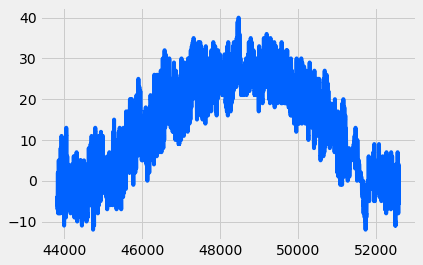

In [20]:
plt.plot(df_Beijing['TEMP'])

In [21]:
df_Beijing['PM_Dongsi'] = df_Beijing['PM_Dongsi'].interpolate()
df_Beijing['TEMP'] = df_Beijing['TEMP'].interpolate()
df_Beijing['PM_Dongsi'].head(10)

43824    5.0
43825    4.0
43826    3.0
43827    4.0
43828    3.0
43829    3.0
43830    3.0
43831    3.0
43832    4.0
43833    5.0
Name: PM_Dongsi, dtype: float64

In [22]:
def make_date(row):
    return datetime(year = row['year'], month = row['month'], day = row['day'], hour = row['hour'])
df_Beijing['date'] = df_Beijing.apply(make_date,axis=1)
df_Beijing.set_index(df_Beijing.date,inplace=True)

<AxesSubplot:xlabel='date'>

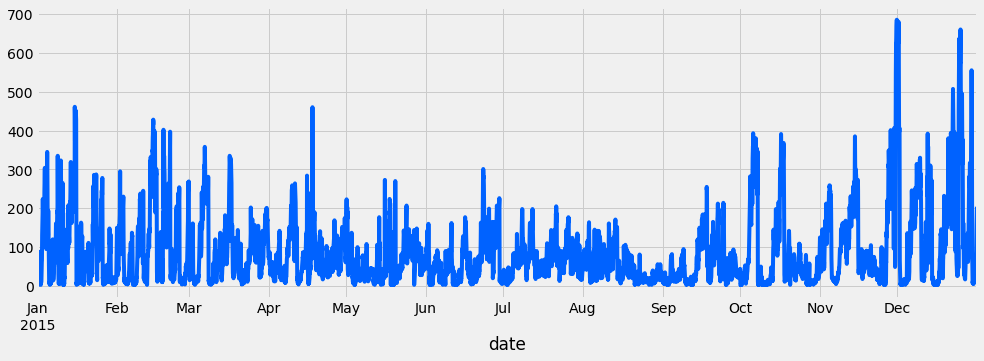

In [23]:
#quick plot of full time series
plt.figure(figsize = (15,5))
df_Beijing['PM_Dongsi'].plot()

In [24]:
df_Beijing['PM_Dongsi']

date
2015-01-01 00:00:00      5.0
2015-01-01 01:00:00      4.0
2015-01-01 02:00:00      3.0
2015-01-01 03:00:00      4.0
2015-01-01 04:00:00      3.0
                       ...  
2015-12-31 19:00:00    140.0
2015-12-31 20:00:00    157.0
2015-12-31 21:00:00    171.0
2015-12-31 22:00:00    204.0
2015-12-31 23:00:00    204.0
Name: PM_Dongsi, Length: 8760, dtype: float64

As usual, it's a good idea for us to generate a run-sequence plot before modeling the data. This way we can get a feel for what we're working with. We'll go ahead and define two utility functions that let us extract and plot the last $n$ days of data (remember that this is an hourly time series, so each day has 24 time steps).   

In [25]:
def get_n_last_days(df, series_name, n_days):
    """
    Extract last n_days of an hourly time series
    """
    
    return df[series_name][-(24*n_days):] 

def plot_n_last_days(df, series_name, n_days):
    """
    Plot last n_days of an hourly time series 
    """
    plt.figure(figsize = (10,5))   
    plt.plot(get_n_last_days(df, series_name, n_days), 'k-')
    plt.title('{0} Air Quality Time Series - {1} days'
              .format(series_name, n_days))
    plt.xlabel('Recorded Hour')
    plt.ylabel('Reading')
    plt.grid(alpha=0.3)

What do the last 6 weeks of data look like?

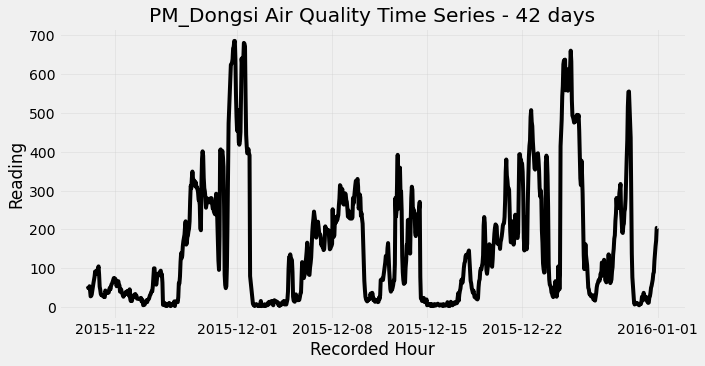

In [26]:
plot_n_last_days(df_Beijing, 'PM_Dongsi', 42)

**Review Question**: what components that you've learned in previous lessons appear to be present in this time series? 

**Answer**: There appears to be a periodic component as well as autocorrelation structure.

#### Example 1: Train a simple RNN to forecast the PM_Dongsi time series

Before we can train a neural network with keras, we need to process the data into a format that the library accepts. In particular, for keras RNNs and LSTMs, training samples should be stored in a 3D numpy array of shape **(n_samples, time_steps, n_features)**. Since we'll be using only the series' history to predict its future, we'll only have 1 feature. Also, for the next-step prediction that we'll do in this notebook, target values can be stored in a simple list.

To this end, we define utility functions that allow us to extract the formatted data. The **get_train_test_data** function gives us the flexibility to define the length of the extracted training and test sequences and the number of time steps to use for prediction -- we'll run simple tests of our models by holding out the end of the extracted sequence and generating predictions to compare against the ground truth.

Since our model will perform better with multiple training samples, we draw many slices from the entire training sequence, starting at different points in time. The gap between starting points of these slices is controlled by the **sample_gap** parameter.

In [27]:
df_Beijing.shape

(8760, 19)

In [28]:
def get_keras_format_series(series):
    """
    Convert a series to a numpy array of shape 
    [n_samples, time_steps, features]
    """
    
    series = np.array(series)
    return series.reshape(series.shape[0], series.shape[1], 1)

def get_train_test_data(df, series_name, series_days, input_hours, 
                        test_hours, sample_gap=3):
    """
    Utility processing function that splits an hourly time series into 
    train and test with keras-friendly format, according to user-specified
    choice of shape.    
    
    arguments
    ---------
    df (dataframe): dataframe with time series columns
    series_name (string): column name in df
    series_days (int): total days to extract
    input_hours (int): length of sequence input to network 
    test_hours (int): length of held-out terminal sequence
    sample_gap (int): step size between start of train sequences; default 5
    
    returns
    ---------
    tuple: train_X, test_X_init, train_y, test_y     
    """
    
    forecast_series = get_n_last_days(df, series_name, series_days).values # reducing our forecast series to last n days

    train = forecast_series[:-test_hours] # training data is remaining days until amount of test_hours
    test = forecast_series[-test_hours:] # test data is the remaining test_hours

    train_X, train_y = [], []

    # range 0 through # of train samples - input_hours by sample_gap. 
    # This is to create many samples with corresponding
    for i in range(0, train.shape[0]-input_hours, sample_gap): 
        train_X.append(train[i:i+input_hours]) # each training sample is of length input hours
        train_y.append(train[i+input_hours]) # each y is just the next step after training sample

    train_X = get_keras_format_series(train_X) # format our new training set to keras format
    train_y = np.array(train_y) # make sure y is an array to work properly with keras
    
    # The set that we had held out for testing (must be same length as original train input)
    test_X_init = test[:input_hours] 
    test_y = test[input_hours:] # test_y is remaining values from test set
    
    return train_X, test_X_init, train_y, test_y

With the **get_train_test_data** utility function in hand, we're all set to extract keras-friendly arrays and start training simple RNN models. We run this function in the cell below. We use the last 56 days of the PM_Dongsi series, and will train a model that takes in 12 time steps in order to predict the next time step. We use the last day of data for visually testing the model.    

In [29]:
series_days = 56
input_hours = 12
test_hours = 24

train_X, test_X_init, train_y, test_y = \
    (get_train_test_data(df_Beijing, 'PM_Dongsi', series_days, 
                         input_hours, test_hours))

In [30]:
train_y.shape

(436,)

Below we see that by taking multiple time slices, we get 436 training samples of 12 time steps each. 

In [31]:
print('Training input shape: {}'.format(train_X.shape))
print('Training output shape: {}'.format(train_y.shape))
print('Test input shape: {}'.format(test_X_init.shape))
print('Test output shape: {}'.format(test_y.shape))

Training input shape: (436, 12, 1)
Training output shape: (436,)
Test input shape: (12,)
Test output shape: (12,)


And now we're ready to train! Since we'd like to repeatedly adjust our model's hyperparameters to see what works best, we'll write a reusable function for training a simple RNN model using keras. Take some time to understand what the keras syntax accomplishes at each step and how it relates to what we've learned about RNNs so far.  

In [36]:
def fit_SimpleRNN(train_X, train_y, cell_units, epochs):
    """
    Fit Simple RNN to data train_X, train_y 
    
    arguments
    ---------
    train_X (array): input sequence samples for training 
    train_y (list): next step in sequence targets
    cell_units (int): number of hidden units for RNN cells  
    epochs (int): number of training epochs   
    """

    # initialize model
    model = Sequential() 
    
    # construct an RNN layer with specified number of hidden units
    # per cell and desired sequence input format 
    model.add(SimpleRNN(cell_units, input_shape=(train_X.shape[1],1)))
    
    # add an output layer to make final predictions 
    model.add(Dense(1))
    
    # define the loss function / optimization strategy, and fit
    # the model with the desired number of passes over the data (epochs) 
    model.compile(loss='mean_squared_error', optimizer='adam')
    model.fit(train_X, train_y, epochs=epochs, batch_size=64, verbose=1)
    
    return model

Great, now let's use this function to fit a very simple baseline model.

In [37]:
model = fit_SimpleRNN(train_X, train_y, cell_units=10, epochs=10)

Epoch 1/10
7/7 [==============================] - 0s 2ms/step - loss: 43071.8984
Epoch 2/10
7/7 [==============================] - 0s 3ms/step - loss: 43042.8516
Epoch 3/10
7/7 [==============================] - 0s 2ms/step - loss: 43011.1680
Epoch 4/10
7/7 [==============================] - 0s 2ms/step - loss: 42968.7422
Epoch 5/10
7/7 [==============================] - 0s 2ms/step - loss: 42890.6055
Epoch 6/10
7/7 [==============================] - 0s 2ms/step - loss: 42658.5898
Epoch 7/10
7/7 [==============================] - 0s 2ms/step - loss: 42502.0586
Epoch 8/10
7/7 [==============================] - 0s 3ms/step - loss: 42479.7812
Epoch 9/10
7/7 [==============================] - 0s 2ms/step - loss: 42458.0742
Epoch 10/10
7/7 [==============================] - 0s 2ms/step - loss: 42434.9805


Not bad so far. But we need to work a bit harder to actually extract multi-step predictions from this model, as it was trained to predict only one future time step. For multi-step forecasting, we'll iteratively generate one prediction, append it to the end of the input sequence (and shift that sequence forward by one step), then feed the new sequence back to the model. We stop once we've generated all the time step predictions we need. 

This prediction method and a utility function for plotting its output against the ground truth are defined below. Take some time time to familiarize yourself with the prediction method.    

In [38]:
def predict(X_init, n_steps, model):
    """
    Given an input series matching the model's expected format,
    generates model's predictions for next n_steps in the series      
    """
    
    X_init = X_init.copy().reshape(1,-1,1)
    preds = []
    
    # iteratively take current input sequence, generate next step pred,
    # and shift input sequence forward by a step (to end with latest pred).
    # collect preds as we go.
    for _ in range(n_steps):
        pred = model.predict(X_init)
        preds.append(pred)
        X_init[:,:-1,:] = X_init[:,1:,:] # replace first 11 values with 2nd through 12th
        X_init[:,-1,:] = pred # replace 12th value with prediction
    
    preds = np.array(preds).reshape(-1,1)
    
    return preds

def predict_and_plot(X_init, y, model, title):
    """
    Given an input series matching the model's expected format,
    generates model's predictions for next n_steps in the series,
    and plots these predictions against the ground truth for those steps 
    
    arguments
    ---------
    X_init (array): initial sequence, must match model's input shape
    y (array): true sequence values to predict, follow X_init
    model (keras.models.Sequential): trained neural network
    title (string): plot title   
    """
    
    y_preds = predict(test_X_init, n_steps=len(y), model=model) # predict through length of y
    # Below ranges are to set x-axes
    start_range = range(1, test_X_init.shape[0]+1) #starting at one through to length of test_X_init to plot X_init
    predict_range = range(test_X_init.shape[0], test_hours)  #predict range is going to be from end of X_init to length of test_hours
    
    #using our ranges we plot X_init
    plt.plot(start_range, test_X_init)
    #and test and actual preds
    plt.plot(predict_range, test_y, color='orange')
    plt.plot(predict_range, y_preds, color='teal', linestyle='--')
    
    plt.title(title)
    plt.legend(['Initial Series','Target Series','Predictions'])

Ok, we've finally arrived at the time to see how our baseline model does. We can simply run the **predict_and_plot** function on the extracted test data as below, and inspect the resulting plot. 

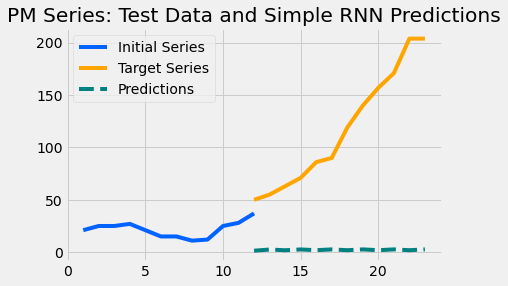

In [39]:
predict_and_plot(test_X_init, test_y, model,
                 'PM Series: Test Data and Simple RNN Predictions')

It looks like our model is badly underfit and essentially just making constant predictions. That's ok, it was a very simple baseline and trained very quickly. 

We can improve by making the model more expressive, **increasing cell_units**. We can also pass over the training data many more times, **increasing epochs**, giving the model more opportunity to learn the patterns in the data. We'll try that below, it takes a longer time now since our training is more extensive.

Note that there is a significant amount of randomness in neural network training - we may need to retrain the model a few times in order to get
results that we're happy with.

Epoch 1/1200
7/7 [==============================] - 0s 3ms/step - loss: 43233.8711
Epoch 2/1200
7/7 [==============================] - 0s 3ms/step - loss: 43165.5039
Epoch 3/1200
7/7 [==============================] - 0s 2ms/step - loss: 43094.1523
Epoch 4/1200
7/7 [==============================] - 0s 2ms/step - loss: 43009.5820
Epoch 5/1200
7/7 [==============================] - 0s 3ms/step - loss: 42862.1016
Epoch 6/1200
7/7 [==============================] - 0s 5ms/step - loss: 42611.2031
Epoch 7/1200
7/7 [==============================] - 0s 2ms/step - loss: 42353.5234
Epoch 8/1200
7/7 [==============================] - 0s 9ms/step - loss: 42231.9727
Epoch 9/1200
7/7 [==============================] - 0s 2ms/step - loss: 42167.7617
Epoch 10/1200
7/7 [==============================] - 0s 2ms/step - loss: 42100.2656
Epoch 11/1200
7/7 [==============================] - 0s 2ms/step - loss: 42028.1328
Epoch 12/1200
7/7 [==============================] - 0s 2ms/step - loss: 41934.0156
E

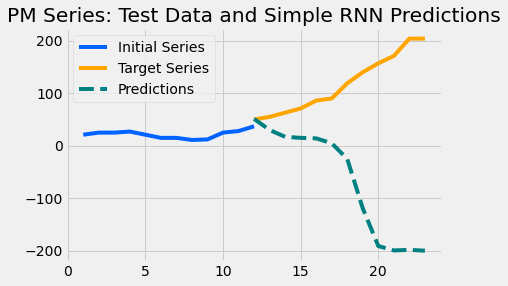

In [40]:
model = fit_SimpleRNN(train_X, train_y, cell_units=30, epochs=1200)
predict_and_plot(test_X_init, test_y, model,
                 'PM Series: Test Data and Simple RNN Predictions')

We can definitely get better results than before. Note that the model has the capacity to forecast an upward trend based on the trough pattern that occured recently (the input sequence). 

Once we've created a model object, we can also get information about its structure and number of parameters by using the **summary** function. This is a useful way to measure the complexity of the model and get a feel for how long it may take to train. 

In [41]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_2 (SimpleRNN)     (None, 30)                960       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 31        
Total params: 991
Trainable params: 991
Non-trainable params: 0
_________________________________________________________________


Note that even for this relatively simple model, we already have almost a thousand parameters to train. A larger number of cell units would increase the number of parameters - this is why the training process can become so time consuming.    

#### Exercise 1: Train a simple RNN to forecast the PM_Nongzhanguan time series

We can reuse all of the functions we've defined so far in order to train models on different time series. In this exercise, you'll train your own model to forecast the "PM_Nongzhanguan" series from the Beijing dataframe.

**Step 1**: Interpolate the missing values in the "PM_Nongzhanguan" series and plot the last 42 days of the series to get a feel for the data. 
* We'll do this step together to get started

In [42]:
df_Beijing['PM_Nongzhanguan'] = df_Beijing['PM_Nongzhanguan'].interpolate()
df_Beijing['PM_Nongzhanguan'].head(10)

date
2015-01-01 00:00:00     8.0
2015-01-01 01:00:00     7.0
2015-01-01 02:00:00     7.0
2015-01-01 03:00:00    11.0
2015-01-01 04:00:00     5.0
2015-01-01 05:00:00     3.0
2015-01-01 06:00:00     6.0
2015-01-01 07:00:00     7.0
2015-01-01 08:00:00     9.0
2015-01-01 09:00:00    11.0
Name: PM_Nongzhanguan, dtype: float64

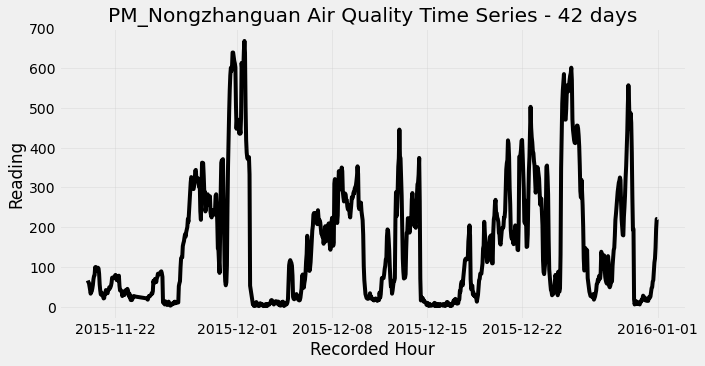

In [43]:
plot_n_last_days(df_Beijing, 'PM_Nongzhanguan', 42)

**Step 2**: Extract the train and test data for the "PM_Nongzhanguan" series using the function **get_train_test_data**. Use the following set of parameters:  

* **series_days** : 56
* **input_hours** : 6
* **test_hours** : 12

For reference, below is how we called the function earlier on. You can also pull up the function's documentation to review the various arguments. 

```
series_days = 56
input_hours = 12
test_hours = 24

train_X, test_X_init, train_y, test_y = \
    (get_train_test_data(df_Beijing, 'PM_Dongsi', series_days, 
                         input_hours, test_hours))
```

In [44]:
series_days = 56
input_hours = 6
test_hours = 12

train_X, test_X_init, train_y, test_y = \
    (get_train_test_data(df_Beijing, 'PM_Nongzhanguan', series_days, 
                         input_hours, test_hours))

**Step 3**: Using the extracted train data to fit a simple RNN, and use the test data to generate and plot predictions.

* Start with a simple baseline -- few cell units and epochs. From here, try to make the model more expressive by increasing units and epochs until you're satisfied with the model's predictions. 

* Be careful not to set units and/or epochs *too* high. The model may become very slow to train and also start to badly overfit the training data with the extra complexity you've added.

For reference, here's example code that you can adapt:
```
model = fit_SimpleRNN(train_X, train_y, cell_units=10, epochs=10)

predict_and_plot(test_X_init, test_y, model,
                 'PM Series: Test Data and Simple RNN Predictions')
```

Epoch 1/1200
7/7 [==============================] - 0s 4ms/step - loss: 40921.4531
Epoch 2/1200
7/7 [==============================] - 0s 2ms/step - loss: 40854.6055
Epoch 3/1200
7/7 [==============================] - 0s 2ms/step - loss: 40783.4805
Epoch 4/1200
7/7 [==============================] - 0s 2ms/step - loss: 40705.4609
Epoch 5/1200
7/7 [==============================] - 0s 2ms/step - loss: 40614.6758
Epoch 6/1200
7/7 [==============================] - 0s 2ms/step - loss: 40457.0391
Epoch 7/1200
7/7 [==============================] - 0s 1ms/step - loss: 40177.4453
Epoch 8/1200
7/7 [==============================] - 0s 7ms/step - loss: 40074.1211
Epoch 9/1200
7/7 [==============================] - 0s 4ms/step - loss: 39995.7812
Epoch 10/1200
7/7 [==============================] - 0s 2ms/step - loss: 39875.8164
Epoch 11/1200
7/7 [==============================] - 0s 2ms/step - loss: 39669.4688
Epoch 12/1200
7/7 [==============================] - 0s 2ms/step - loss: 39496.5156
E

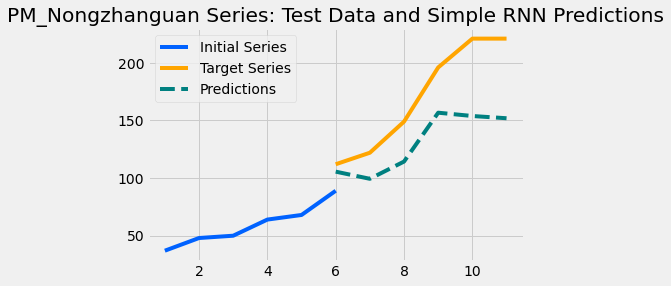

In [45]:
model = fit_SimpleRNN(train_X, train_y, cell_units=30, epochs=1200)

predict_and_plot(test_X_init, test_y, model, 
                 'PM_Nongzhanguan Series: Test Data and Simple RNN Predictions')

Again, we're able to do a decent job forecasting the continuation of an uptrend. We'll likely face more difficulty if we try to predict further into the future, especially with a simple RNN. 

# Section 2: LSTM

In this section, we'll build on our previous work by introducing LSTM models as an enhancement to the RNNs we've trained so far. Our first step will be to write a new function for fitting an LSTM with keras - notice that it's almost the same as our simple RNN function, with **LSTM** substitued for **SimpleRNN** (this is a nice display of how flexible keras is). 

Take some time to review the logic of the function while we go ahead and run the example cell below (it will take a while). 

In [46]:
def fit_LSTM(train_X, train_y, cell_units, epochs):
    """
    Fit LSTM to data train_X, train_y 
    
    arguments
    ---------
    train_X (array): input sequence samples for training 
    train_y (list): next step in sequence targets
    cell_units (int): number of hidden units for LSTM cells  
    epochs (int): number of training epochs   
    """
    
    # initialize model
    model = Sequential() 
    
    # construct a LSTM layer with specified number of hidden units
    # per cell and desired sequence input format 
    model.add(LSTM(cell_units, input_shape=(train_X.shape[1],1))) #,return_sequences= True))
    #model.add(LSTM(cell_units_l2, input_shape=(train_X.shape[1],1)))
    
    # add an output layer to make final predictions 
    model.add(Dense(1))
    
    # define the loss function / optimization strategy, and fit
    # the model with the desired number of passes over the data (epochs) 
    model.compile(loss='mean_squared_error', optimizer='adam')
    model.fit(train_X, train_y, epochs=epochs, batch_size=64, verbose=0)
    
    return model

#### Example 2: Train a LSTM to forecast the PM_Nongzhanguan time series

With our new LSTM training function and all of our previously defined utility functions, adapting our code for LSTM forecasting will be fairly simple. We can extract the data as we did before, call the **fit_LSTM** function to build a model, and run the same *predict_and_plot* code.

Remember that one of the key benefits of LSTMs over simple RNNs is that they are better equipped to handle long input sequences and long-term dependencies. To see this evidence of this, we'll set *input_hours* to 12 and *test_hours* to 96 and see how our model predictions turn out with LSTM.  

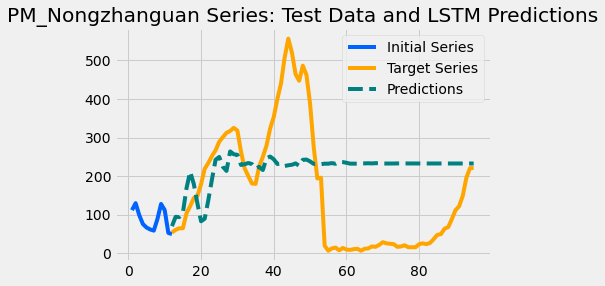

In [47]:
series_days = 50 
input_hours = 12
test_hours = 96

train_X, test_X_init, train_y, test_y = \
    (get_train_test_data(df_Beijing, 'PM_Nongzhanguan', series_days, 
                         input_hours, test_hours))

model = fit_LSTM(train_X, train_y, cell_units=70, epochs=3000) 

predict_and_plot(test_X_init, test_y, model, 
                 'PM_Nongzhanguan Series: Test Data and LSTM Predictions')

In our prediction plot we can start to see how LSTMs can be more expressive than simple RNNs - instead of just extrapolating a simple trend like our previous RNN models did, this LSTM model can effectively anticipate inflection points.

You should also notice that our model starts to struggle toward the end of the predicted sequence, becoming more conservative in its predictions. To improve the quality of forecasts over many time steps, we'd likely need to use more data and more sophisticated LSTM model structures that are beyond the scope of this lesson.

Take a look at the model summary and compare it with the summary for our simple RNN from example 1. You can see that there are many more trainable parameters for the LSTM, which explains why it took a much longer time for us to train this model.

In [48]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 70)                20160     
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 71        
Total params: 20,231
Trainable params: 20,231
Non-trainable params: 0
_________________________________________________________________


#### Further Exploration

The simple models we've worked with are only the tip of the iceberg for deep learning. We've been time-limited for this exercise, and typical deep learning models involve much longer training times than what we're able to do in this notebook. 

Here are several suggestions for how you could explore these ideas further, leveraging the code we've implemented today:

* Try using longer chunks of the series we've looked at in this notebook for modeling (set series_days larger than 56), or modeling other series in the dataset.
* When training with more data, try increasing cell_units and running more training epochs.  
* Try using longer input sequences with LSTM, and predicting a wider range of test hours.

# Summary

In this lesson we have covered:

1. How recurrent neural networks can be applied to sequence forecasting problems
2. How simple RNNs and LSTMs can be built and trained using the python library keras
3. The importance of tuning network parameters, and an introductory strategy for doing so


---

### Survival Analysis and Censoring

<img src = "Survival Analysis and Censoring.jpg">

# Machine Learning Foundation

## Course 6, Part h: Survival Modeling DEMO

## Learning Outcomes

You should walk away from this demonstration with:

1. An understanding of how to approach Survival Analysis.
2. Knowing how to prepare Kaplan-Meier curves for various subgroups.
3. Run a basic Cox survival regression 

__Installation notes:__
This demo uses Python's [lifelines](https://lifelines.readthedocs.io/en/latest/) package. It can be installed using the following command:

```conda install -c conda-forge lifelines```



In [1]:
# Setup
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from lifelines import KaplanMeierFitter, CoxPHFitter 
import warnings
import os
os.chdir('data')
from colorsetup import colors, palette
sns.set_palette(palette)

---

# Section 1: Import and Explore Relevant Data

We will use the Churn Dataset described in the lecture for this demonstration. Let's start by reading in the data:

In [2]:
df = pd.read_pickle('churndata.pkl')
df

id  months    offer phone multiple internet_type  gb_mon  \
0     8779-QRDMV       1     None    No       No           DSL       8   
1     7495-OOKFY       8  Offer E   Yes      Yes   Fiber Optic      17   
2     1658-BYGOY      18  Offer D   Yes      Yes   Fiber Optic      52   
3     4598-XLKNJ      25  Offer C   Yes       No   Fiber Optic      12   
4     4846-WHAFZ      37  Offer C   Yes      Yes   Fiber Optic      14   
...          ...     ...      ...   ...      ...           ...     ...   
7038  2569-WGERO      72     None   Yes       No          None       0   
7039  6840-RESVB      24  Offer C   Yes      Yes         Cable      24   
7040  2234-XADUH      72     None   Yes      Yes   Fiber Optic      59   
7041  4801-JZAZL      11     None    No       No           DSL      17   
7042  3186-AJIEK      66     None   Yes       No   Fiber Optic      11   

     security backup protection  ... unlimited        contract paperless  \
0          No     No        Yes  ...        No  Month-to-Month       Yes   
1          No    Yes         No  ...       Yes  Month-to-Month       Yes   
2          No     No         No  ...       Yes  Month-to-Month       Yes   
3          No    Yes        Yes  ...       Yes  Month-to-Month       Yes   
4          No     No         No  ...       Yes  Month-to-Month       Yes   
...       ...    ...        ...  ...       ...             ...       ...   
7038       No     No         No  ...        No        Two Year       Yes   
7039      Yes     No        Yes  ...       Yes        One Year       Yes   
7040       No    Yes        Yes  ...       Yes        One Year       Yes   
7041      Yes     No         No  ...       Yes  Month-to-Month       Yes   
7042      Yes     No        Yes  ...       Yes        Two Year       Yes   

              payment monthly  total_revenue  satisfaction  churn_value  \
0     Bank Withdrawal   39.65          59.65             3            1   
1         Credit Card   80.65        1024.10             3            1   
2     Bank Withdrawal   95.45        1910.88             2            1   
3     Bank Withdrawal   98.50        2995.07             2            1   
4     Bank Withdrawal   76.50        3102.36             2            1   
...               ...     ...            ...           ...          ...   
7038  Bank Withdrawal   21.15        3039.53             5            0   
7039     Mailed Check   84.80        2807.47             3            0   
7040      Credit Card  103.20        9453.04             4            0   
7041  Bank Withdrawal   29.60         319.21             4            0   
7042  Bank Withdrawal  105.65        8887.86             4            0   

      churn_score  cltv  
0              91  5433  
1              69  5302  
2              81  3179  
3              88  5337  
4              67  2793  
...           ...   ...  
7038           45  5306  
7039           59  2140  
7040           71  5560  
7041           59  2793  
7042           38  5097  

[7043 rows x 21 columns]

Here, we can see various categories of customer variables, as well as `churn_value` (an indicator for whether the customer has left the sample), and `months` (the time variable). Let's start with some simple EDA related to these variables:

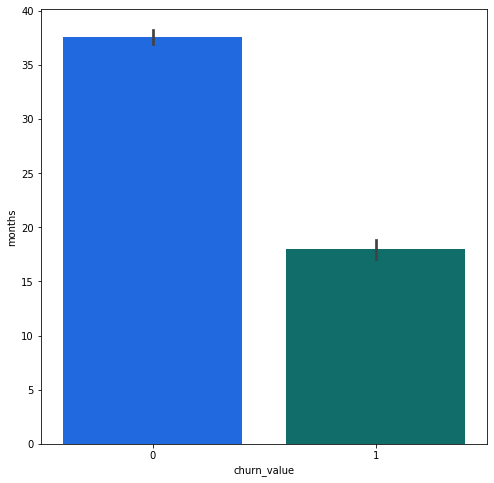

In [3]:
plt.figure(figsize=(8,8))
sns.barplot(data=df, x='churn_value', y='months')


Clearly the average tenure is shorter for those that have churned. As we are interested in understanding the time dimension (how long someone will remain a customer), it is important to understand that our data are censored, i.e. the number of months before churn is biased downwards for customers who have not yet churned.

# Section 2: Plotting the Kaplan-Meier Curve

The Kaplan-Meier Curve represents a simple non-parametric visualization of survival likelihood function in our data. In that sense, it can be thought of as part of the EDA process for survival analysis. Let's start by fitting a simple Kaplan-Meier Curve on our data.

Text(0, 0.5, 'Survival probability')

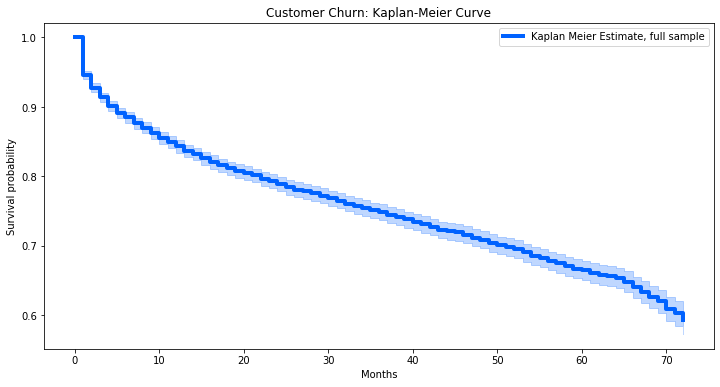

In [4]:
kmf = KaplanMeierFitter()

kmf.fit(df.months, df.churn_value, label = 'Kaplan Meier Estimate, full sample')

kmf.plot(linewidth=4, figsize=(12, 6))
plt.title('Customer Churn: Kaplan-Meier Curve')
plt.xlabel('Months')
plt.ylabel('Survival probability')

# Section 3: Examining Variables

As we continue to examine the survival function, we may want to relate survival risk with features, or characteristics of our customers. In this example, we will look at diffences in survival risk for customers who have only a single service, vs. customers with multiple services. We can start by plotting a simple histogram for each category, looking at differences between churned and not-churned subsamples.

churn_value
0    AxesSubplot(0.547727,0.125;0.352273x0.755)
1    AxesSubplot(0.547727,0.125;0.352273x0.755)
Name: months, dtype: object

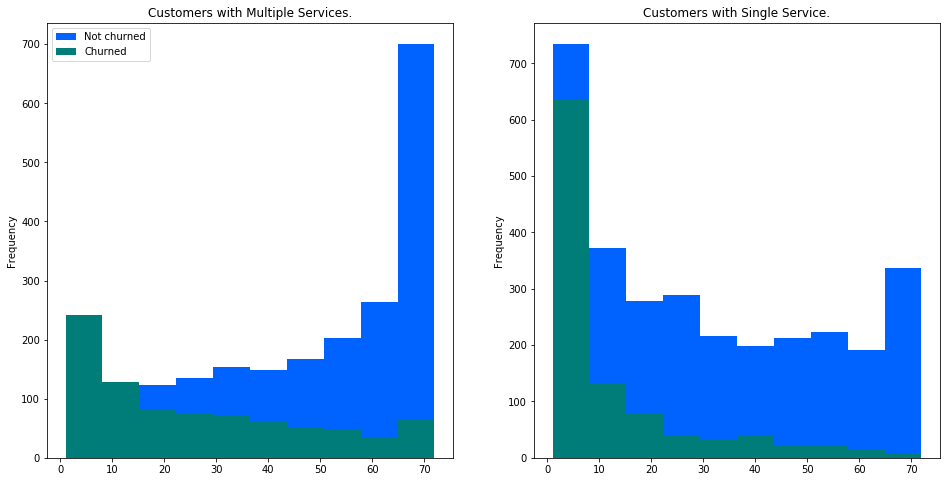

In [5]:
# Let's look at the 'multiple services variable'
df1 = df[df.multiple=='Yes']
df2 = df[df.multiple=='No']
fig, ax = plt.subplots(1,2, figsize=(16,8))
df1.groupby('churn_value')['months'].plot(kind='hist', ax=ax[0], title='Customers with Multiple Services.')
ax[0].legend(labels=['Not churned', 'Churned'])
df2.groupby('churn_value')['months'].plot(kind='hist', ax=ax[1], title='Customers with Single Service.')


We can see differences across these groups, let's examing Kaplan-Meier curves for various subsamples. This involves fitting the Kaplan Meier estimator separately for each subsample. 

Text(0, 0.5, 'Survival probability')

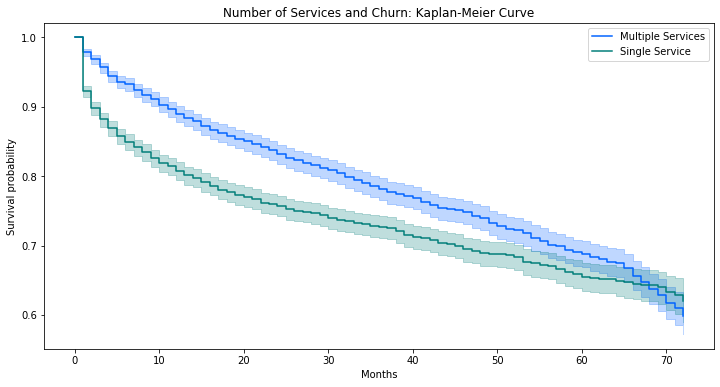

In [6]:
kmf.fit(df1.months, df1.churn_value)
kmf.plot(label='Multiple Services', figsize=(12, 6))
kmf.fit(df2.months, df2.churn_value)
kmf.plot(label='Single Service')
plt.title('Number of Services and Churn: Kaplan-Meier Curve')
plt.xlabel('Months')
plt.ylabel('Survival probability')


# Section 4: Cox Proportional Hazards Model

Having looked at our data and related Kaplan-Meier curves, we can formalize the analysis by running survival regression. There are several available models here, documented in the Python [lifelines](https://lifelines.readthedocs.io/en/latest/) module. As we discussed in the course, the Cox model estimates a baseline hazard rate, and assumes features impact this hazard rate proportionally. While this is a strong assumption (and may not be true in general), the model still provides insight into the role of features and their importance impacting survival risk. Let's begin by setting data up for the Cox survival regression.

In [7]:
# Setting up the data
dfu = df[['multiple', 'churn_value']]
dfd = pd.get_dummies(dfu, drop_first=True)
dfd['months'] = df.months
dfd.rename(columns={'multiple_Yes':'Multiple Services'}, inplace=True)

Now, let's fit a Cox proportional hazard model using the Multiple Services variable.

In [8]:
cph = CoxPHFitter()
cph.fit(dfd, duration_col='months', event_col='churn_value')
cph.print_summary(style='ascii')

<lifelines.CoxPHFitter: fitted with 7043 total observations, 5174 right-censored observations>
             duration col = 'months'
                event col = 'churn_value'
      baseline estimation = breslow
   number of observations = 7043
number of events observed = 1869
   partial log-likelihood = -15641.90
         time fit was run = 2020-06-24 00:22:44 UTC

---
                    coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
Multiple Services  -0.24       0.79       0.05            -0.33            -0.15                 0.72                 0.86

                      z      p   -log2(p)
Multiple Services -5.06 <0.005      21.18
---
Concordance = 0.55
Partial AIC = 31285.81
log-likelihood ratio test = 25.72 on 1 df
-log2(p) of ll-ratio test = 21.27



Here, we see regression output for the estimated cox model. The Cox model objet also allows us to plot coefficient estimates to assess their significance, using the `plot` method.

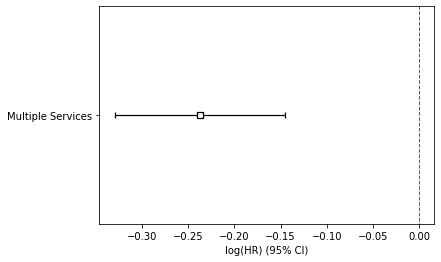

In [9]:
cph.plot()

Here, we see the coefficient estimate, along with error bars used to assess statistical significance. The result is significantly different from zero, indicating a negative effect of the Multiple Services variable in our analysis.

The Cox model object also allows us to assess results visually, by plotting resulting estimates of survival risk by covariate groups, using the `plot_covariate_groups` method. This can be useful to see estimated changes in survival risk across groups.

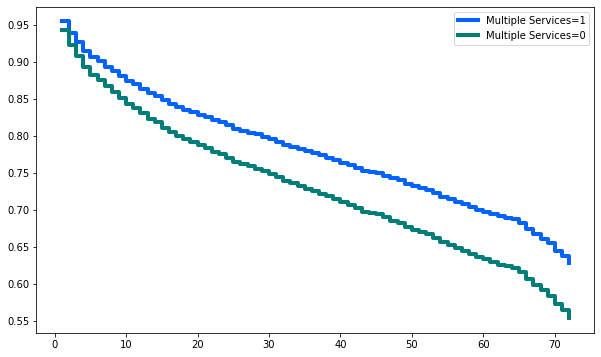

In [10]:
cph.plot_covariate_groups('Multiple Services', [1, 0], plot_baseline=False, figsize=(10, 6), lw=4)

To compare the impact across variables, let's include a few more variables: Satisfaction, Security Service, Backup Service, and Support, and re-run our analysis. We begin by setting up the data, as before.

In [11]:
# Including additional variables, data setup
dfu = df[['churn_value', 'satisfaction', 'security', 'backup', 'support']]
dfd = pd.get_dummies(dfu, drop_first=True)
dfd['months'] = df.months
#dfd.rename(columns={'multiple_Yes':'Multiple Services'}, inplace=True)
dfd.rename(columns={'backup_Yes':'Backup Service'}, inplace=True)
dfd.rename(columns={'security_Yes':'Security Service'}, inplace=True)
dfd.rename(columns={'support_Yes':'Support Service'}, inplace=True)

In [12]:
# Fitting Cox Proportional Model
cph = CoxPHFitter()
cph.fit(dfd, duration_col='months', event_col='churn_value')
cph.print_summary(style='ascii')

<lifelines.CoxPHFitter: fitted with 7043 total observations, 5174 right-censored observations>
             duration col = 'months'
                event col = 'churn_value'
      baseline estimation = breslow
   number of observations = 7043
number of events observed = 1869
   partial log-likelihood = -13308.14
         time fit was run = 2020-06-24 00:22:45 UTC

---
                   coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
satisfaction      -1.30       0.27       0.02            -1.34            -1.25                 0.26                 0.29
Security Service  -1.09       0.34       0.07            -1.22            -0.96                 0.29                 0.38
Backup Service    -0.63       0.53       0.05            -0.73            -0.52                 0.48                 0.59
Support Service   -0.49       0.61       0.06            -0.61            -0.36                 0.54                 0.70

                  

Again, we see results of regression output, denoting significance levels for each variable, as well as information about our dataset and model fit. 
As above, let's plot coefficients for different variables. This allows us to compare magnitudes and assess which variables have a larger influence on survival risk. 

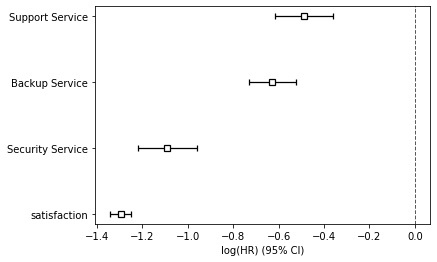

In [13]:
cph.plot()

Here, we see coefficient estimates for several variables, which helps us understand both their significance, as well as their relative magnitudes. The Satisfaction variable seems to have the largest impact on survival risk.

Let's look at results for the Satisfaction variable by covariate group. This allows us to plot estiamted survival rates for different values of the Satisfaction and Security variables.

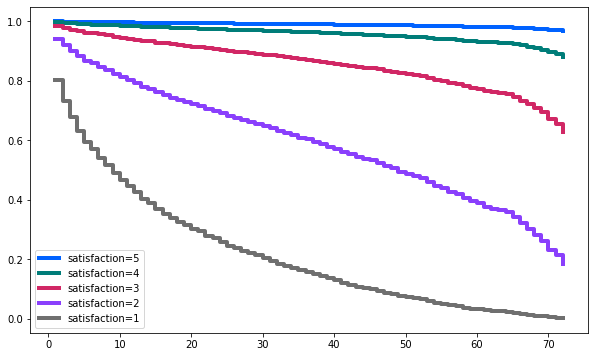

In [14]:
cph.plot_covariate_groups('satisfaction', [5, 4, 3, 2, 1], plot_baseline=False, figsize=(10, 6), lw=4) 

Our estimated survival functions differ substantially based on this variable (we knew from the previous chart that this was likely the case).

# Summary
In this notebook, we have covered: 

1. How to approach Survival Analysis.
2. Preparing Kaplan-Meier curves for various subgroups.
3. Runing a basic Cox survival regression. 

---
### Machine Learning Foundation (C) 2020 IBM Corporation